# INTRO

## Notebook for applying Data Assimilation on seasonal data (PWP reconstructions)

### Characteristics:
* Assemble data in the proxy domain using offline (block update) assimilation instead of point-by-point
* Assemble data in SST (D47), SAT (D47), SSS (d18Oc) and precipitation domain
* Clean notebook for exporting focused on aggregated outcomes

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assistant Professor Vrije Universiteit Amsterdam

**References used in coding**

*Data assimiliation*
- Steiger, N.J., Hakim, G.J., Steig, E.J., Battisti, D.S., Roe, G.H., 2014. Assimilation of Time-Averaged Pseudoproxies for Climate Reconstruction. Journal of Climate 27, 426–441. https://doi.org/10.1175/JCLI-D-12-00693.1
- Hakim, G.J., Emile-Geay, J., Steig, E.J., Noone, D., Anderson, D.M., Tardif, R., Steiger, N., Perkins, W.A., 2016. The last millennium climate reanalysis project: Framework and first results. Journal of Geophysical Research: Atmospheres 121, 6745–6764. https://doi.org/10.1002/2016JD024751
- King, J., Tierney, J., Osman, M., Judd, E.J., Anchukaitis, K.J., 2023. DASH: a MATLAB toolbox for paleoclimate data assimilation. Geoscientific Model Development 16, 5653–5683. https://doi.org/10.5194/gmd-16-5653-2023
- Judd, E.J., Tierney, J.E., Lunt, D.J., Montañez, I.P., Huber, B.T., Wing, S.L., Valdes, P.J., 2024. A 485-million-year history of Earth’s surface temperature. Science 385, eadk3705. https://doi.org/10.1126/science.adk3705

*Data sources*
- de Winter, N.J., Tindall, J., Johnson, A.L.A., Goudsmit-Harzevoort, B., Wichern, N., Kaskes, P., Claeys, P., Huygen, F., van Leeuwen, S., Metcalfe, B., Bakker, P., Goolaerts, S., Wesselingh, F., Ziegler, M., 2024. Amplified seasonality in western Europe in a warmer world. Science Advances 10, eadl6717. https://doi.org/10.1126/sciadv.adl6717
- Haywood, A.M., Tindall, J.C., Dowsett, H.J., Dolan, A.M., Foley, K.M., Hunter, S.J., Hill, D.J., Chan, W.-L., Abe-Ouchi, A., Stepanek, C., Lohmann, G., Chandan, D., Peltier, W.R., Tan, N., Contoux, C., Ramstein, G., Li, X., Zhang, Z., Guo, C., Nisancioglu, K.H., Zhang, Q., Li, Q., Kamae, Y., Chandler, M.A., Sohl, L.E., Otto-Bliesner, B.L., Feng, R., Brady, E.C., von der Heydt, A.S., Baatsen, M.L.J., Lunt, D.J., 2020. The Pliocene Model Intercomparison Project Phase 2: large-scale climate features and climate sensitivity. Climate of the Past 16, 2095–2123. https://doi.org/10.5194/cp-16-2095-2020

*Calibration equations*
- Harwood, A. J. P., Dennis, P. F., Marca, A. D., Pilling, G. M., and Millner, R. S.: The oxygen isotope composition of water masses within the North Sea, Estuarine, Coastal and Shelf Science, 78, 353–359, https://doi.org/10.1016/j.ecss.2007.12.010, 2008.
- Daëron, M. and Vermeesch, P.: Omnivariant generalized least squares regression: Theory, geochronological applications, and making the case for reconciled Δ47 calibrations, Chemical Geology, 121881, https://doi.org/10.1016/j.chemgeo.2023.121881, 2023.
- Grossman, E. L. and Ku, T.-L.: Oxygen and carbon isotope fractionation in biogenic aragonite: temperature effects, Chemical Geology: Isotope Geoscience section, 59, 59–74, 1986.
- Gonfiantini, R., Stichler, W., and Rozanski, K.: Standards and intercomparison materials distributed by the International Atomic Energy Agency for stable isotope measurements, 1995.
- Dettman, D. L., Reische, A. K., and Lohmann, K. C.: Controls on the stable isotope composition of seasonal growth bands in aragonitic fresh-water bivalves (Unionidae), Geochimica et Cosmochimica Acta, 63, 1049–1057, 1999.

## Load packages

In [1]:
# Load packages
import numpy as np # The 'numpy' package is needed for matrix operations and calculations
import pandas as pd # The 'pandas' package helps us to import and manage data
import math as math # Math package for data cleaning
from scipy import stats # Import scipy.package for confidence intervals
from sklearn.preprocessing import StandardScaler # Import the package for standardizing data
import D47calib as D47c # Import the package for treating clumped isotope data by Daëron and Vermeesch (2023; https://github.com/mdaeron/D47calib)
import matplotlib.pyplot as plt # The 'matplotlib' package contains tools needed to plot our data and results
import seaborn as sns # The 'seaborn' package is used to make our plots look nicer (e.g. enable heatmaps)
import warnings # The 'warnings' package is used to suppress warnings that might occur during the calculations
%matplotlib inline

# PRIOR - MONTHLY
## Load monthly SST model data

In [2]:
# Load model SST data as prior and show data structure
PlioMIP_SST = pd.read_csv('PWP case/PlioMIP_SST.csv') # Load the data for this assignment into Python and in the Jupyter environment.
PlioMIP_SST.head()

modelname    ja    fb    mr     ar     my     jn     jl     ag     sp  \
0    CCSM4-UoT  8.33  7.14  7.45   9.67  13.33  18.40  22.50  24.35  22.60   
1    CCSM4-Utr  9.96  8.75  8.95  11.03  14.62  19.37  23.50  25.29  23.95   
2       COSMOS  7.91  6.68  6.38   7.34   9.53  12.23  14.95  15.94  14.94   
3  EC-Earth3.3  9.18  7.62  7.41   9.32  13.58  19.22  24.06  25.27  23.56   
4     GISS2.1G  4.87  3.58  3.88   6.75  11.21  15.56  18.68  19.39  17.68   

      ot     nv     dc  
0  18.74  14.83  10.86  
1  20.76  16.37  12.48  
2  13.34  11.49   9.58  
3  20.26  16.05  12.13  
4  14.47  10.53   7.18

## Load monthly SAT model data

In [3]:
# Load model SAT data as prior and show data structure
PlioMIP_SAT = pd.read_csv('PWP case/PlioMIP_SAT.csv') # Load the data for this assignment into Python and in the Jupyter environment.
PlioMIP_SAT.head()

modelname     ja     fb     mr     ar     my     jn     jl     ag     sp  \
0      CCSM4   8.39   8.81   9.63  12.05  15.15  19.61  22.81  22.96  19.02   
1  CCSM4-UoT   6.97   7.58   9.96  12.54  16.46  21.92  25.43  24.72  19.69   
2  CCSM4-Utr   9.43   9.50  10.88  13.14  16.81  21.09  25.02  24.99  21.79   
3    CESM1.2   9.32   9.84  10.56  13.06  16.71  20.91  23.83  23.44  20.11   
4      CESM2  10.70  10.44  11.75  13.85  17.69  22.31  25.02  25.18  21.79   

      ot     nv     dc  
0  14.70  11.03   9.13  
1  14.32   9.94   7.02  
2  17.26  12.84  10.15  
3  15.96  12.77  10.38  
4  17.65  13.99  12.05

## Load monthly SSS model data

In [4]:
# Load model SSS data as prior and show data structure
PlioMIP_SSS = pd.read_csv('PWP case/PlioMIP_SSS.csv')  # Load the data for this assignment into Python and in the Jupyter environment.
PlioMIP_SSS = PlioMIP_SSS.pivot(index='modelname', columns='month', values='SSS').reset_index() # Pivot the data to have months as columns and models as rows
# Rename months to two-letter codes
month_mapping = {
    'Jan': 'ja', 'Feb': 'fb', 'Mar': 'mr', 'Apr': 'ar', 'May': 'my', 
    'Jun': 'jn', 'Jul': 'jl', 'Aug': 'ag', 'Sep': 'sp', 'Oct': 'ot', 
    'Nov': 'nv', 'Dec': 'dc'
}
PlioMIP_SSS.rename(columns=month_mapping, inplace=True) # Rename the columns to two-letter codes for months
PlioMIP_SSS.head()

month     modelname         ar         ag         dc         fb         ja  \
0         CCSM4-UoT  18.641620  17.664583  19.175005  19.155079  19.240961   
1            COSMOS  19.671519  19.139396  19.822553  19.930394  19.886921   
2            HadCM3  35.505535  34.605678  35.505248  35.616506  35.583428   
3           HadGEM3  32.947459  32.489019  32.896642  33.094949  33.066085   
4      IPSL-CM6A-LR  34.079274  33.265265  34.244052  34.275511  34.315632   

month         jl         jn         mr         my         nv         ot  \
0      17.706797  17.993721  18.922827  18.357751  18.862000  18.452913   
1      19.228002  19.358863  19.860139  19.468221  19.729077  19.523501   
2      34.878770  35.134441  35.604174  35.330172  35.355503  35.068206   
3      32.465359  32.599833  33.040556  32.797878  32.658298  32.534356   
4      33.524891  33.752462  34.183905  33.928167  34.027614  33.766878   

month         sp  
0      17.934462  
1      19.264149  
2      34.696112  
3      32.513514  
4      33.409809

## Load monthly precipitation data

In [5]:
# Load model precipitation data as prior and show data structure
PlioMIP_precip = pd.read_csv('PWP case/PlioMIP_precip.csv')  # Load the data for this assignment into Python and in the Jupyter environment.
PlioMIP_precip = PlioMIP_precip.pivot(index='modelname', columns='month', values='Mean_Precipitation').reset_index()  # Pivot the data to have months as columns and models as rows
PlioMIP_precip.rename(columns=month_mapping, inplace=True)  # Rename the columns to two-letter codes for months
PlioMIP_precip.head()

month modelname        ar        ag        dc        fb        ja        jl  \
0         CCSM4  1.481677  1.825992  4.034268  2.957591  3.776682  0.731645   
1      CCSM4UOT  1.494104  1.732526  3.068386  2.104363  2.758223  0.965024   
2      CCSM4Utr  1.525553  1.702673  3.965647  2.613341  3.236507  1.256546   
3       CESM1.2  1.461625  2.224233  3.428275  2.466815  3.199764  0.845094   
4         CESM2  1.549717  2.337191  4.229531  2.705796  3.424249  1.708422   

month        jn        mr        my        nv        ot        sp  
0      0.996839  1.921807  1.343585  3.962916  3.387227  2.900726  
1      1.286421  1.389566  1.473732  3.428390  2.597931  2.323011  
2      1.676994  1.656356  1.695042  3.999845  2.977811  2.365357  
3      0.787780  2.065939  1.132148  3.458813  3.049558  2.940248  
4      1.124801  1.911965  1.448587  4.192045  3.278223  2.665053

## Combine SST, SAT, SSS and precipitation data by modelname

In [6]:
# Normalize model names to lowercase and remove "-" signs
def normalize_modelname(df):
    df['modelname'] = df['modelname'].str.lower().str.replace('-', '', regex=False)
    # Merge all model names starting with "ipslcm6" into one modelname
    df['modelname'] = df['modelname'].str.replace(r'^ipslcm6.*', 'ipslcm6', regex=True)
    return df

# Apply normalization to all datasets
PlioMIP_SST = normalize_modelname(PlioMIP_SST)
PlioMIP_SAT = normalize_modelname(PlioMIP_SAT)
PlioMIP_SSS = normalize_modelname(PlioMIP_SSS)
PlioMIP_precip = normalize_modelname(PlioMIP_precip)

# Merge the datasets of SST, SAT, SSS, and precipitation, force suffixes to be added to the column names
PlioMIP = pd.merge(
    PlioMIP_SST.rename(columns={c: c + '_SST' for c in PlioMIP_SST.columns if c != 'modelname'}),
    PlioMIP_SAT.rename(columns={c: c + '_SAT' for c in PlioMIP_SAT.columns if c != 'modelname'}),
    on='modelname',
    how='outer'
)

PlioMIP = pd.merge(
    PlioMIP,
    PlioMIP_SSS.rename(columns={c: c + '_SSS' for c in PlioMIP_SSS.columns if c != 'modelname'}),
    on='modelname',
    how='outer'
)

PlioMIP = pd.merge(
    PlioMIP,
    PlioMIP_precip.rename(columns={c: c + '_precip' for c in PlioMIP_precip.columns if c != 'modelname'}),
    on='modelname',
    how='outer'
)

# Display the combined dataset
PlioMIP.head()

modelname  ja_SST  fb_SST  mr_SST  ar_SST  my_SST  jn_SST  jl_SST  ag_SST  \
0     ccsm4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  ccsm4uot    8.33    7.14    7.45    9.67   13.33   18.40    22.5   24.35   
2  ccsm4utr    9.96    8.75    8.95   11.03   14.62   19.37    23.5   25.29   
3   cesm1.2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     cesm2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   sp_SST  ...  dc_precip  fb_precip  ja_precip  jl_precip  jn_precip  \
0     NaN  ...   4.034268   2.957591   3.776682   0.731645   0.996839   
1   22.60  ...   3.068386   2.104363   2.758223   0.965024   1.286421   
2   23.95  ...   3.965647   2.613341   3.236507   1.256546   1.676994   
3     NaN  ...   3.428275   2.466815   3.199764   0.845094   0.787780   
4     NaN  ...   4.229531   2.705796   3.424249   1.708422   1.124801   

   mr_precip  my_precip  nv_precip  ot_precip  sp_precip  
0   1.921807   1.343585   3.962916   3.387227   2.900726  
1   1.389566   1.473732   3.428390   2.597931   2.323011  
2   1.656356   1.695042   3.999845   2.977811   2.365357  
3   2.065939   1.132148   3.458813   3.049558   2.940248  
4   1.911965   1.448587   4.192045   3.278223   2.665053  

[5 rows x 49 columns]

## Calculate the monthly prior for model SST, SAT, SSS and precipitation values

In [7]:
# Create list of month names
months = ['ja', 'fb', 'mr', 'ar', 'my', 'jn', 'jl', 'ag', 'sp', 'ot', 'nv', 'dc']

# Prior SST, SAT, SSS & precipitation estimates from climate models (mean)
mu_prior_SAT_monthly = np.array(PlioMIP[[f"{month}_SAT" for month in months]].mean(axis=0, skipna=True))
mu_prior_SST_monthly = np.array(PlioMIP[[f"{month}_SST" for month in months]].mean(axis=0, skipna=True))
mu_prior_SSS_monthly = np.array(PlioMIP[[f"{month}_SSS" for month in months]].mean(axis=0, skipna=True))
mu_prior_precip_monthly = np.array(PlioMIP[[f"{month}_precip" for month in months]].mean(axis=0, skipna=True))

# Covariance between months in prior SST, SAT, SSS, and precip estimates from climate models (covariance matrix)
cov_prior_SAT_monthly = np.cov(PlioMIP[[f"{month}_SAT" for month in months]].dropna(), rowvar=False)
cov_prior_SST_monthly = np.cov(PlioMIP[[f"{month}_SST" for month in months]].dropna(), rowvar=False)
cov_prior_SSS_monthly = np.cov(PlioMIP[[f"{month}_SSS" for month in months]].dropna(), rowvar=False)
cov_prior_precip_monthly = np.cov(PlioMIP[[f"{month}_precip" for month in months]].dropna(), rowvar=False)

# Store copy of original prior means to keep when later updating the prior
mu_prior_SAT_monthly_original, cov_prior_SAT_monthly_original = mu_prior_SAT_monthly.copy(), cov_prior_SAT_monthly.copy()
mu_prior_SST_monthly_original, cov_prior_SST_monthly_original = mu_prior_SST_monthly.copy(), cov_prior_SST_monthly.copy()
mu_prior_SSS_monthly_original, cov_prior_SSS_monthly_original = mu_prior_SSS_monthly.copy(), cov_prior_SSS_monthly.copy()
mu_prior_precip_monthly_original, cov_prior_precip_monthly_original = mu_prior_precip_monthly.copy(), cov_prior_precip_monthly.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_SAT_monthly = np.sqrt(np.diag(cov_prior_SAT_monthly))
std_prior_SST_monthly = np.sqrt(np.diag(cov_prior_SST_monthly))
std_prior_SSS_monthly = np.sqrt(np.diag(cov_prior_SSS_monthly))
std_prior_precip_monthly = np.sqrt(np.diag(cov_prior_precip_monthly))

print("SAT Monthly Means:", mu_prior_SAT_monthly)
print("SAT Monthly Std Devs:", std_prior_SAT_monthly)
print("SST Monthly Means:", mu_prior_SST_monthly)
print("SST Monthly Std Devs:", std_prior_SST_monthly)
print("SSS Monthly Means:", mu_prior_SSS_monthly)
print("SSS Monthly Std Devs:", std_prior_SSS_monthly)
print("Precip Monthly Means:", mu_prior_precip_monthly)
print("Precip Monthly Std Devs:", std_prior_precip_monthly)

SAT Monthly Means: [ 6.71411765  6.69294118  8.04647059 10.80058824 14.58529412 19.27941176
 22.28411765 21.87705882 18.43058824 14.13235294 10.31941176  7.91294118]
SAT Monthly Std Devs: [2.19619574 2.33777342 2.13652153 1.88298457 1.96586214 2.24523793
 2.7378734  2.89253514 2.75413206 2.61063098 2.36348384 2.20706469]
SST Monthly Means: [ 8.89909091  7.84181818  7.89181818  9.60909091 12.97272727 17.37909091
 21.1        22.14727273 20.38636364 17.25272727 13.83181818 10.91818182]
SST Monthly Std Devs: [1.66519341 1.70563078 1.62979028 1.41943971 1.74026487 2.5002778
 3.07210677 3.32125606 3.31004916 2.94745684 2.34808781 1.8649387 ]
SSS Monthly Means: [29.29601903 29.27455803 29.08572385 28.76846642 28.43459126 28.18546307
 28.01587662 27.98742991 28.17716438 28.56415277 28.93190974 29.18675145]
SSS Monthly Std Devs: [5.92900181 5.93098095 5.9695257  6.03338574 6.09152224 6.17221843
 6.2365113  6.23680216 6.19993142 6.09896377 6.00078604 5.9423462 ]
Precip Monthly Means: [3.3589960

## Plot the monthly priors for all model values

[Text(1, 0, 'January'),
 Text(2, 0, 'February'),
 Text(3, 0, 'March'),
 Text(4, 0, 'April'),
 Text(5, 0, 'May'),
 Text(6, 0, 'June'),
 Text(7, 0, 'July'),
 Text(8, 0, 'August'),
 Text(9, 0, 'September'),
 Text(10, 0, 'October'),
 Text(11, 0, 'November'),
 Text(12, 0, 'December')]

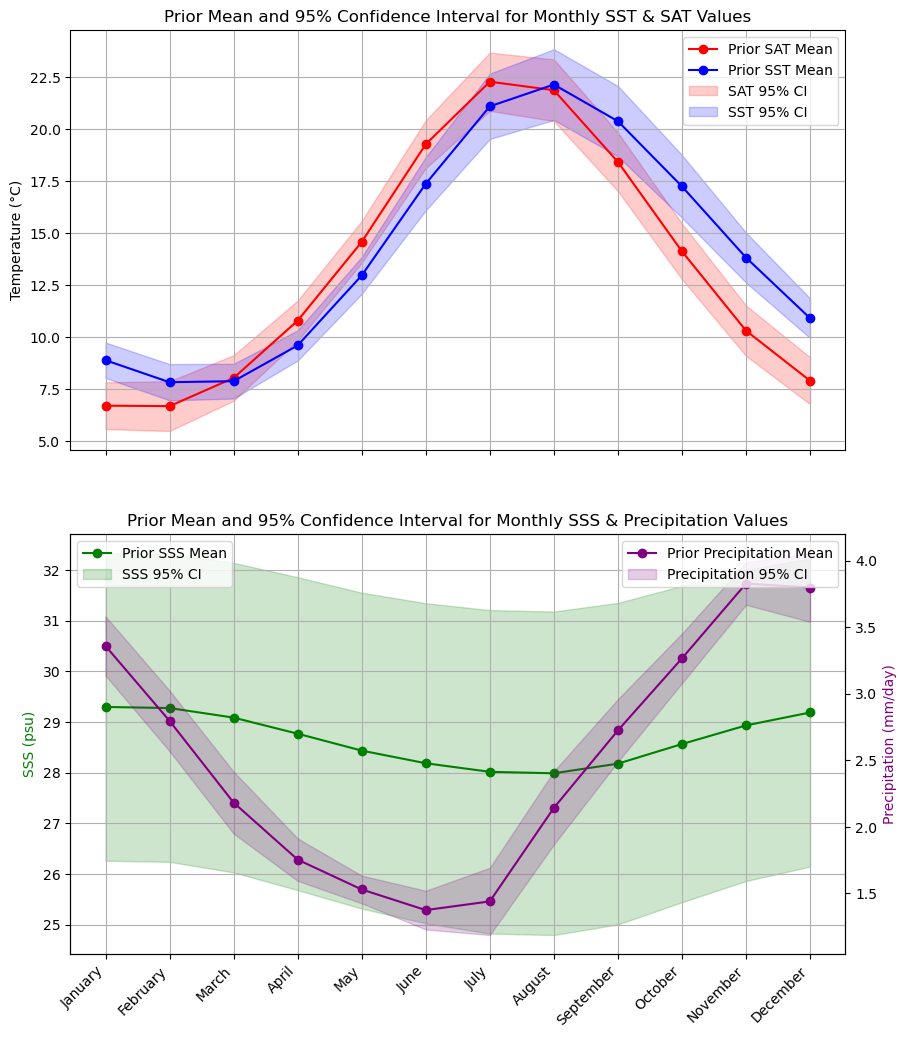

In [8]:
# Set dimensions of data
n_models_monthly = len(PlioMIP["modelname"])  # Find the total number of models

# Create a monthly scale for the x-axis
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']  # List full month names
months_scale = np.arange(len(months)) + 1  # Create monthly scale

# Create the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Panel 1: Plot the prior distribution for SST and SAT
axes[0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o', color='r')
axes[0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o', color='b')

# Add 95% confidence intervals for SAT
axes[0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    mu_prior_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='r', label='SAT 95% CI'
)

# Add 95% confidence intervals for SST
axes[0].fill_between(
    months_scale,
    mu_prior_SST_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    mu_prior_SST_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='b', label='SST 95% CI'
)

axes[0].set_title('Prior Mean and 95% Confidence Interval for Monthly SST & SAT Values')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()
axes[0].grid(True)

# Panel 2: Plot the prior distribution for SSS and precipitation
axes[1].plot(months_scale, mu_prior_SSS_monthly, label='Prior SSS Mean', marker='o', color='g')
ax2 = axes[1].twinx()  # Create a secondary y-axis for precipitation
ax2.plot(months_scale, mu_prior_precip_monthly, label='Prior Precipitation Mean', marker='o', color='purple')

# Add 95% confidence intervals for SSS
axes[1].fill_between(
    months_scale,
    mu_prior_SSS_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_monthly / np.sqrt(n_models_monthly),
    mu_prior_SSS_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='g', label='SSS 95% CI'
)

# Add 95% confidence intervals for precipitation
ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    mu_prior_precip_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='purple', label='Precipitation 95% CI'
)

axes[1].set_ylabel('SSS (psu)', color='g')
ax2.set_ylabel('Precipitation (mm/day)', color='purple')
axes[1].set_title('Prior Mean and 95% Confidence Interval for Monthly SSS & Precipitation Values')
axes[1].legend(loc='upper left')
ax2.legend(loc='upper right')
axes[1].grid(True)

# Update the x-axis with month names
axes[1].set_xticks(months_scale)
axes[1].set_xticklabels(month_names, rotation=45, ha="right")

### Convert SST and SAT model data to D47 domain using the regression by Daëron and Vermeesch (2023) and propagate uncertainty in the calibration

In [9]:
# Apply T47()-function from the D47calib package to all SST columns
# Identify the SST and SAT columns separately
SST_columns = [col for col in PlioMIP.columns if col.endswith('_SST')]
SAT_columns = [col for col in PlioMIP.columns if col.endswith('_SAT')]

# Apply the conversion function to the SST and SAT columns and add new columns for D47 and D47_SE
for col in SST_columns:
    base_col_name = col.replace('_SST', '') # Remove the '_SST' suffix from the column name
    PlioMIP[f'{base_col_name}_SST_D47'], PlioMIP[f'{base_col_name}_SST_D47_SE'] = zip(*PlioMIP[col].apply(
        lambda x: D47c.OGLS23.T47(T = x) if not pd.isna(x) else (np.nan, np.nan)
    )) # Use zip() to unpack the tuple returned by the apply() method and apply the T47()-function to each value in the column
for col in SAT_columns:
    base_col_name = col.replace('_SAT', '') # Remove the '_SST' suffix from the column name
    PlioMIP[f'{base_col_name}_SAT_D47'], PlioMIP[f'{base_col_name}_SAT_D47_SE'] = zip(*PlioMIP[col].apply(
        lambda x: D47c.OGLS23.T47(T = x) if not pd.isna(x) else (np.nan, np.nan)
    )) # Use zip() to unpack the tuple returned by the apply() method and apply the T47()-function to each value in the column

# Display the combined data with D47 and D47_SE columns
D47_columns = [col for col in PlioMIP.columns if col.endswith('_D47')]
D47_se_columns = [col for col in PlioMIP.columns if '_D47_SE' in col]
print("D47 values for all model outcomes:\n", PlioMIP[D47_columns].head())
print("Calibration standard errors for all model outcomes:\n", PlioMIP[D47_se_columns].head())

D47 values for all model outcomes:
    ja_SST_D47  fb_SST_D47  mr_SST_D47  ar_SST_D47  my_SST_D47  jn_SST_D47  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1    0.648316    0.652623    0.651496    0.643531    0.630811    0.613992   
2    0.642505    0.646808    0.646093    0.638746    0.626446    0.610876   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   jl_SST_D47  ag_SST_D47  sp_SST_D47  ot_SST_D47  ...  mr_SAT_D47  \
0         NaN         NaN         NaN         NaN  ...    0.643673   
1    0.601033    0.595364    0.600724    0.612897  ...    0.642505   
2    0.597955    0.592525    0.596581    0.606465  ...    0.639270   
3         NaN         NaN         NaN         NaN  ...    0.640392   
4         NaN         NaN         NaN         NaN  ...    0.636241   

   ar_SAT_D47  my_SAT_D47  jn_SAT_D47  jl_SAT_D47  ag_SAT_D47  sp_SAT_D47  \
0  

### Estimate seawater oxygen isotope value from salinity based on modern North Sea d18Ow-salinity relationship by Harwood et al. (2008)

In [10]:
# Apply the d18Ow-SSS function from Harwood et al. (2007) to all SSS columns
# Identify the SSS columns
SSS_columns = [col for col in PlioMIP.columns if col.endswith('_SSS')]

# Apply the conversion function to the SSS columns and add new columns for d18Ow and d18Ow_SE
for col in SSS_columns:
    base_col_name = col.replace('_SSS', '')  # Remove the '_SSS' suffix from the column name
    PlioMIP[f'{base_col_name}_SSS_d18Ow'] = PlioMIP[col].apply(
        lambda x: -9.300 + 0.274 * x if not pd.isna(x) else np.nan  # Calculate d18Ow
    )

# Display the combined data with d18Ow and d18Ow_SE columns
d18Ow_columns = [col for col in PlioMIP.columns if col.endswith('_d18Ow')]
print("d18Ow values for all model outcomes:\n", PlioMIP[d18Ow_columns].head())

d18Ow values for all model outcomes:
    ar_SSS_d18Ow  ag_SSS_d18Ow  dc_SSS_d18Ow  fb_SSS_d18Ow  ja_SSS_d18Ow  \
0           NaN           NaN           NaN           NaN           NaN   
1     -4.192196     -4.459904     -4.046049     -4.051508     -4.027977   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   jl_SSS_d18Ow  jn_SSS_d18Ow  mr_SSS_d18Ow  my_SSS_d18Ow  nv_SSS_d18Ow  \
0           NaN           NaN           NaN           NaN           NaN   
1     -4.448338      -4.36972     -4.115145     -4.269976     -4.131812   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   ot_SSS_d18Ow  sp_SSS_d18Ow  
0           NaN           Na

### Calculate carbonate oxygen isotope value from SST and seawater oxygen isotope data using Grossman and Ku (1986) with the VPDB-VSMOW scale correction by Gonfiantini et al. (1995) and Dettman et al. (1999)

In [11]:
# Iterate over each model and calculate d18Oc values
for index, row in PlioMIP.iterrows():
    # Iterate over each month
    for month in months:
        SST = row[f"{month}_SST"]
        d18Ow = row[f"{month}_SSS_d18Ow"]
        if not pd.isna(SST) and not pd.isna(d18Ow):
            d18Oc = (20.6 - SST) / 4.34 + (d18Ow - 0.27)
        else:
            d18Oc = np.nan
        # Add the calculated d18Oc value to the DataFrame
        PlioMIP.loc[index, f"{month}_d18Oc"] = d18Oc

# Display the updated DataFrame
PlioMIP.head()


modelname  ja_SST  fb_SST  mr_SST  ar_SST  my_SST  jn_SST  jl_SST  ag_SST  \
0     ccsm4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  ccsm4uot    8.33    7.14    7.45    9.67   13.33   18.40    22.5   24.35   
2  ccsm4utr    9.96    8.75    8.95   11.03   14.62   19.37    23.5   25.29   
3   cesm1.2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     cesm2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   sp_SST  ...  mr_d18Oc  ar_d18Oc  my_d18Oc  jn_d18Oc  jl_d18Oc  ag_d18Oc  \
0     NaN  ...       NaN       NaN       NaN       NaN       NaN       NaN   
1   22.60  ... -1.355191 -1.943763 -2.864861 -4.132808 -5.156126 -5.593959   
2   23.95  ...       NaN       NaN       NaN       NaN       NaN       NaN   
3     NaN  ...       NaN       NaN       NaN       NaN       NaN       NaN   
4     NaN  ...       NaN       NaN       NaN       NaN       NaN       NaN   

   sp_d18Oc  ot_d18Oc  nv_d18Oc  dc_d18Oc  
0       NaN       NaN       NaN       NaN  
1 -5.116787  -4.08533 -3.072319 -2.071809  
2       NaN       NaN       NaN       NaN  
3       NaN       NaN       NaN       NaN  
4       NaN       NaN       NaN       NaN  

[5 rows x 121 columns]

### Calculate the monthly prior for model SST- and SAT-derived D47 values and SSS-derived seawater oxygen isotope values with propagated uncertainty

In [12]:
# Set the weights of the data based on the standard errors
weights_monthly_SST_D47 = 1 / PlioMIP[[f"{month}_SST_D47_SE" for month in months]] ** 2
weights_monthly_SAT_D47 = 1 / PlioMIP[[f"{month}_SAT_D47_SE" for month in months]] ** 2

# Change the column suffixes from "_D47_SE" to "_D47" in weights_monthly_SST_D47 to match the headers of the D47 matrix later for multiplication
weights_monthly_SST_D47.columns = [col.replace('_SST_D47_SE', '_SST_D47') for col in weights_monthly_SST_D47.columns]
weights_monthly_SAT_D47.columns = [col.replace('_SAT_D47_SE', '_SAT_D47') for col in weights_monthly_SAT_D47.columns]

# Prior D47 estimates from climate models (weighted mean)
mu_prior_SST_D47_monthly = np.array((PlioMIP[[f"{month}_SST_D47" for month in months]] * weights_monthly_SST_D47).sum(axis = 0, skipna = True) / weights_monthly_SST_D47.sum(axis = 0, skipna = True)) # Calculate weighted monthly mean D47 values and convert to numpy array
mu_prior_SAT_D47_monthly = np.array((PlioMIP[[f"{month}_SAT_D47" for month in months]] * weights_monthly_SAT_D47).sum(axis = 0, skipna = True) / weights_monthly_SAT_D47.sum(axis = 0, skipna = True)) # Calculate weighted monthly mean D47 values and convert to numpy array

# Calculate simple (unweighted) mean for monthly d18Ow values
mu_prior_SSS_d18Ow_monthly = np.array(PlioMIP[[f"{month}_SSS_d18Ow" for month in months]].mean(axis=0, skipna=True))
mu_prior_d18Oc_monthly = np.array(PlioMIP[[f"{month}_d18Oc" for month in months]].mean(axis=0, skipna=True))

# Decompose variance within and between model outcomes
model_variances_SST = PlioMIP[[f"{month}_SST_D47" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
model_variances_SAT = PlioMIP[[f"{month}_SAT_D47" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
model_variances_d18Ow = PlioMIP[[f"{month}_SSS_d18Ow" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
model_variances_d18Oc = PlioMIP[[f"{month}_d18Oc" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
measurement_variances_SST = (PlioMIP[[f"{month}_SST_D47_SE" for month in months]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements
measurement_variances_SAT = (PlioMIP[[f"{month}_SAT_D47_SE" for month in months]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements

# Covariance between months in prior D47 estimates from climate models (weighted covariance matrix)
cov_raw_monthly_SST = np.cov(PlioMIP[[f"{month}_SST_D47" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_monthly_SAT = np.cov(PlioMIP[[f"{month}_SAT_D47" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_monthly_d18Ow = np.cov(PlioMIP[[f"{month}_SSS_d18Ow" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_monthly_d18Oc = np.cov(PlioMIP[[f"{month}_d18Oc" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_prior_SST_D47_monthly = cov_raw_monthly_SST.copy() # Copy covariance matrix to add uncertainty coming from the measurements
cov_prior_SAT_D47_monthly = cov_raw_monthly_SAT.copy() # Copy covariance matrix to add uncertainty coming from the measurements
np.fill_diagonal(cov_prior_SST_D47_monthly, np.diagonal(cov_raw_monthly_SST) + measurement_variances_SST)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)
np.fill_diagonal(cov_prior_SAT_D47_monthly, np.diagonal(cov_raw_monthly_SAT) + measurement_variances_SAT)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)

# Store copy of original prior means to keep when later updating the prior
mu_prior_SST_D47_monthly_original, cov_prior_SST_D47_monthly_original = mu_prior_SST_D47_monthly.copy(), cov_prior_SST_D47_monthly.copy()
mu_prior_SAT_D47_monthly_original, cov_prior_SAT_D47_monthly_original = mu_prior_SAT_D47_monthly.copy(), cov_prior_SAT_D47_monthly.copy()
mu_prior_SSS_d18Ow_monthly_original, cov_prior_SSS_d18Ow_monthly_original = mu_prior_SSS_d18Ow_monthly.copy(), cov_raw_monthly_d18Ow.copy()
mu_prior_d18Oc_monthly_original, cov_prior_d18Oc_monthly_original = mu_prior_d18Oc_monthly.copy(), cov_raw_monthly_d18Oc.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_SST_D47_monthly = np.sqrt(np.diag(cov_prior_SST_D47_monthly))
std_prior_SAT_D47_monthly = np.sqrt(np.diag(cov_prior_SAT_D47_monthly))
std_prior_SSS_d18Ow_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Ow))
std_prior_d18Oc_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Oc))

# Print the results
print("Prior D47 estimates from SST in climate models (weighted mean):")
print(mu_prior_SST_D47_monthly)
print("Prior D47 estimates from SST in climate models (weighted covariance matrix):")
print(std_prior_SST_D47_monthly)
print("Prior D47 estimates from SAT in climate models (weighted mean):")
print(mu_prior_SAT_D47_monthly)
print("Prior D47 estimates from SAT in climate models (weighted covariance matrix):")
print(std_prior_SAT_D47_monthly)
print("Prior d18Ow estimates from SSS in climate models (weighted mean):")
print(mu_prior_SSS_d18Ow_monthly)
print("Prior d18Ow estimates from SSS in climate models (weighted covariance matrix):")
print(std_prior_SSS_d18Ow_monthly)
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted mean):")
print(mu_prior_d18Oc_monthly)
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted covariance matrix):")
print(std_prior_d18Oc_monthly)

Prior D47 estimates from SST in climate models (weighted mean):
[0.64595815 0.64972969 0.64957918 0.64352257 0.63174847 0.61687649
 0.60495042 0.60168179 0.60710259 0.61713861 0.62862875 0.63877671]
Prior D47 estimates from SST in climate models (weighted covariance matrix):
[0.00614572 0.00638619 0.00611021 0.00523351 0.00611762 0.0083541
 0.00986818 0.01053415 0.01065771 0.00977107 0.00805759 0.00665147]
Prior D47 estimates from SAT in climate models (weighted mean):
[0.6535531  0.65354873 0.64877444 0.63916405 0.62623172 0.61087967
 0.6014159  0.6026324  0.61343328 0.62749031 0.64061857 0.64921573]
Prior D47 estimates from SAT in climate models (weighted covariance matrix):
[0.0081692  0.00869841 0.00782808 0.00672115 0.00673335 0.00732744
 0.0086457  0.0091529  0.00900611 0.00891738 0.00842026 0.00808888]
Prior d18Ow estimates from SSS in climate models (weighted mean):
[-1.27289079 -1.2787711  -1.33051166 -1.4174402  -1.50892199 -1.57718312
 -1.62364981 -1.6314442  -1.57945696 -1.

### Plot the monthly prior for model SST- and SAT-derived D47 values, model SSS-derived carbonate d18O values and precipitation with propagated uncertainty

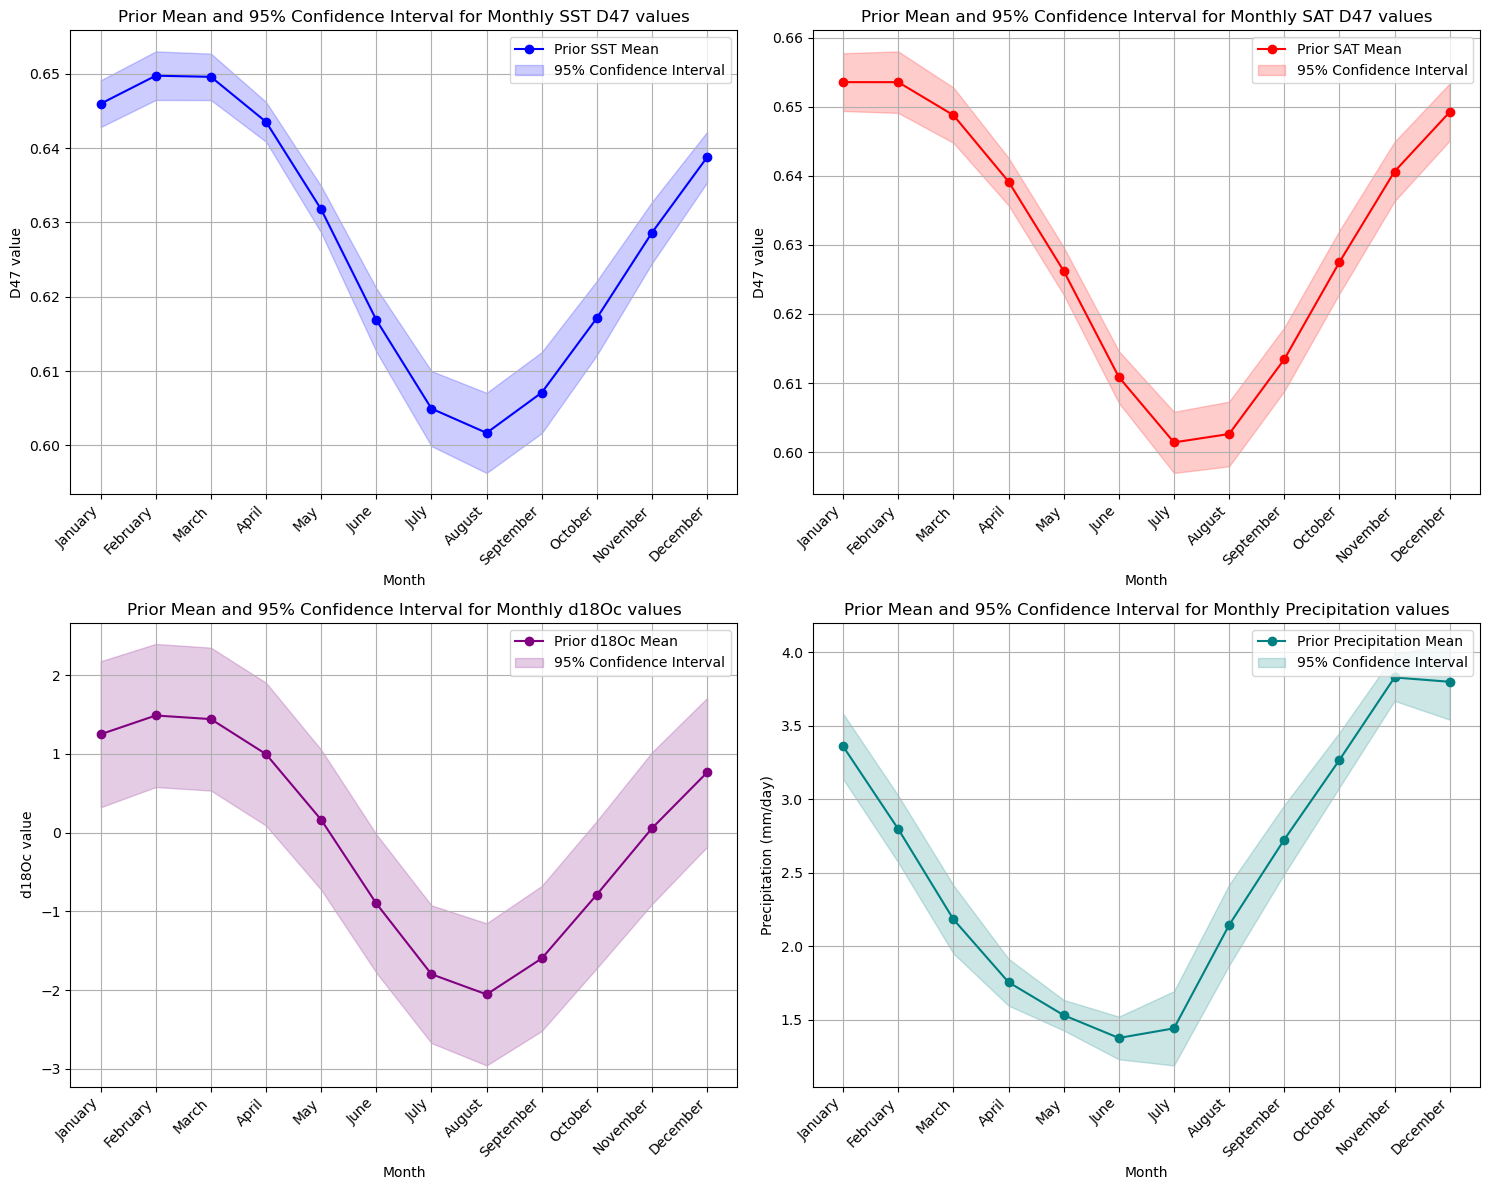

In [13]:
# Plot monthly prior distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjust the figure to have 2x2 grid

# Plot the prior distribution for SST
axes[0, 0].plot(months_scale, mu_prior_SST_D47_monthly, label='Prior SST Mean', color='b', marker='o')
axes[0, 0].fill_between(months_scale,
                        mu_prior_SST_D47_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly / np.sqrt(n_models_monthly),
                        mu_prior_SST_D47_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly / np.sqrt(n_models_monthly),
                        color='b', alpha=0.2, label='95% Confidence Interval')
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and 95% Confidence Interval for Monthly SST D47 values')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('D47 value')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot the prior distribution for SAT
axes[0, 1].plot(months_scale, mu_prior_SAT_D47_monthly, label='Prior SAT Mean', color='r', marker='o')
axes[0, 1].fill_between(months_scale,
                        mu_prior_SAT_D47_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_D47_monthly / np.sqrt(n_models_monthly),
                        mu_prior_SAT_D47_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_D47_monthly / np.sqrt(n_models_monthly),
                        color='r', alpha=0.2, label='95% Confidence Interval')
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Prior Mean and 95% Confidence Interval for Monthly SAT D47 values')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('D47 value')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot the prior distribution for d18Oc
axes[1, 0].plot(months_scale, mu_prior_d18Oc_monthly, label='Prior d18Oc Mean', color='purple', marker='o')
axes[1, 0].fill_between(months_scale,
                        mu_prior_d18Oc_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_monthly / np.sqrt(n_models_monthly),
                        mu_prior_d18Oc_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_monthly / np.sqrt(n_models_monthly),
                        color='purple', alpha=0.2, label='95% Confidence Interval')
axes[1, 0].set_xticks(months_scale)
axes[1, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 0].set_title('Prior Mean and 95% Confidence Interval for Monthly d18Oc values')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('d18Oc value')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot the prior distribution for precipitation
axes[1, 1].plot(months_scale, mu_prior_precip_monthly, label='Prior Precipitation Mean', color='teal', marker='o')
axes[1, 1].fill_between(months_scale,
                        mu_prior_precip_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
                        mu_prior_precip_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
                        color='teal', alpha=0.2, label='95% Confidence Interval')
axes[1, 1].set_xticks(months_scale)
axes[1, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 1].set_title('Prior Mean and 95% Confidence Interval for Monthly Precipitation values')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Precipitation (mm/day)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Update the layout and show the plot
plt.tight_layout()
plt.show()

## Calculate the monthly covariance matrix for D47 values of SST and SAT, d18Oc and precipitation

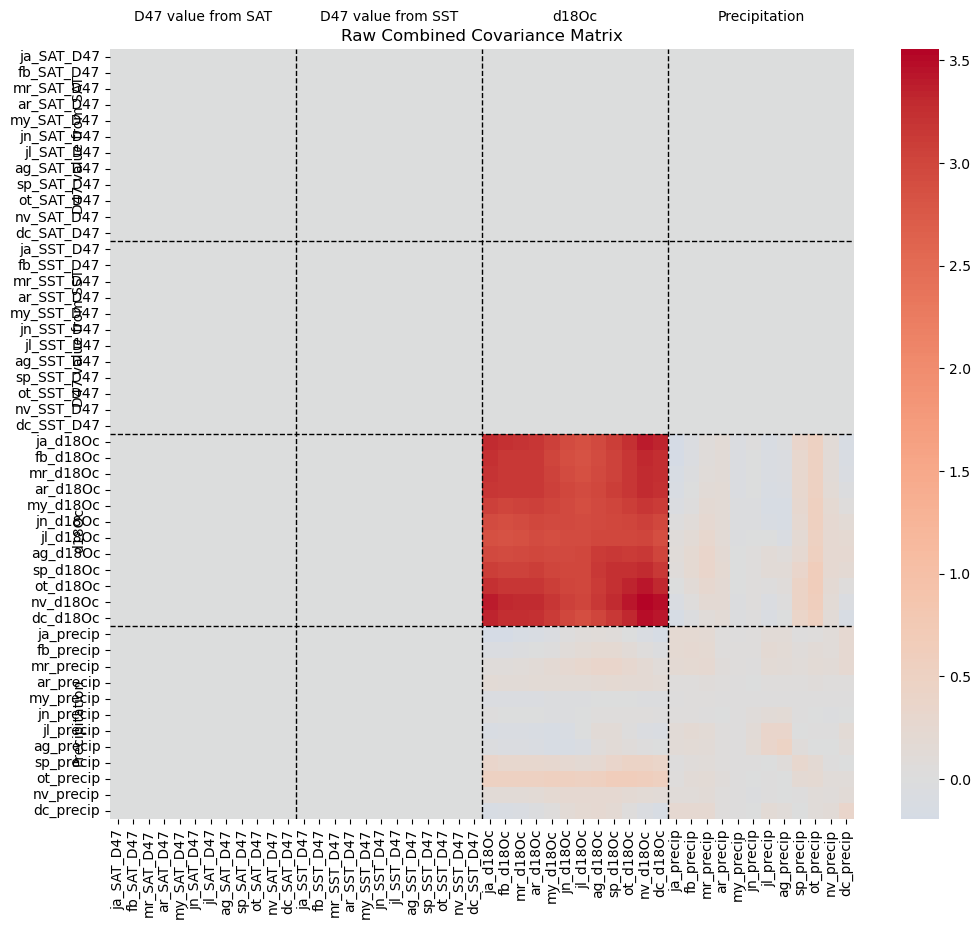

In [14]:
# Define column names for SAT, SST, d18Oc, and precipitation
SAT_D47_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_columns_monthly = [f"{month}_precip" for month in months]

# Extract the relevant columns for SAT, SST D47, d18Oc, and precipitation
SAT_D47_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_columns_monthly = [f"{month}_precip" for month in months]

# Combine the relevant columns into a single dataframe
combined_data_monthly = PlioMIP[SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly]

# Calculate the covariance matrix for the combined data
cov_combined_monthly = np.cov(combined_data_monthly.dropna(), rowvar=False)

# Plot the heatmap of the raw combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    cov_combined_monthly,  # Use the raw covariance matrix
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly,
    yticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_columns_monthly) / 2, -2, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, -2, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) / 2, -2, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) + len(precip_columns_monthly) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-2, len(SAT_D47_columns_monthly) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) / 2, 'd18Oc', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) + len(precip_columns_monthly) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Raw Combined Covariance Matrix")
plt.show()

## Plot normalized monthly covariance matrix between D47 values of SST and SAT, d18Oc and precipitation

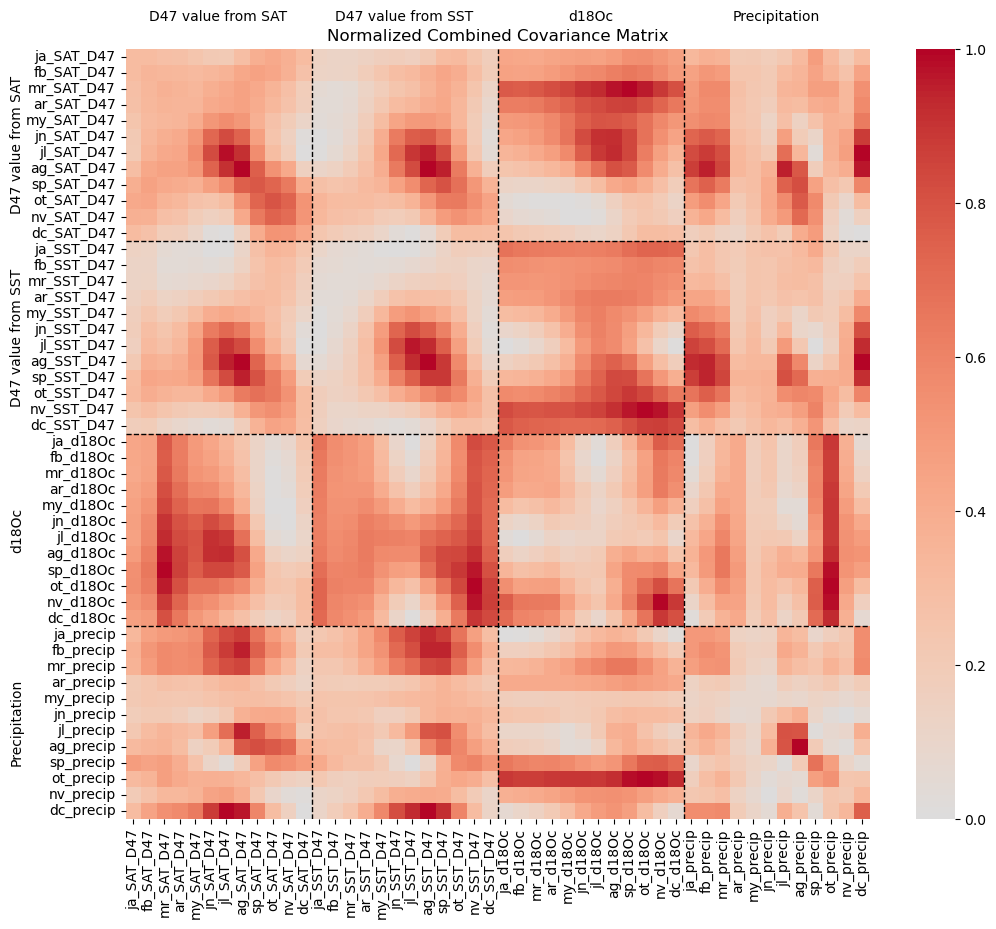

In [15]:
# Normalize each submatrix independently for better visualization
def normalize_matrix(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    return (matrix - min_val) / (max_val - min_val)

# Extract the relevant columns for SAT, SST D47, d18Oc, and precipitation
SAT_D47_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_columns_monthly = [f"{month}_precip" for month in months]

# Combine the relevant columns into a single dataframe
combined_data_monthly = PlioMIP[SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly]

# Calculate the covariance matrix for the combined data
cov_combined_monthly = np.cov(combined_data_monthly.dropna(), rowvar=False)

# Extract the covariance matrices for SAT D47, SST D47, d18Oc, and precipitation
cov_SAT_D47_monthly = cov_combined_monthly[:len(months), :len(months)]
cov_SST_D47_monthly = cov_combined_monthly[len(months):2*len(months), len(months):2*len(months)]
cov_d18Oc_monthly = cov_combined_monthly[2*len(months):3*len(months), 2*len(months):3*len(months)]
cov_precip_monthly = cov_combined_monthly[3*len(months):, 3*len(months):]

# Extract the cross-covariance matrices
cross_cov_SAT_SST_D47_monthly = cov_combined_monthly[:len(months), len(months):2*len(months)]
cross_cov_SAT_d18Oc_monthly = cov_combined_monthly[:len(months), 2*len(months):3*len(months)]
cross_cov_SAT_precip_monthly = cov_combined_monthly[:len(months), 3*len(months):]
cross_cov_SST_d18Oc_monthly = cov_combined_monthly[len(months):2*len(months), 2*len(months):3*len(months)]
cross_cov_SST_precip_monthly = cov_combined_monthly[len(months):2*len(months), 3*len(months):]
cross_cov_d18Oc_precip_monthly = cov_combined_monthly[2*len(months):3*len(months), 3*len(months):]

# Normalize each submatrix
normalized_cov_SAT_D47_monthly = normalize_matrix(cov_SAT_D47_monthly)
normalized_cov_SST_D47_monthly = normalize_matrix(cov_SST_D47_monthly)
normalized_cov_d18Oc_monthly = normalize_matrix(cov_d18Oc_monthly)
normalized_cov_precip_monthly = normalize_matrix(cov_precip_monthly)

# Normalize each cross-covariance matrix
normalized_cross_cov_SAT_SST_D47_monthly = normalize_matrix(cross_cov_SAT_SST_D47_monthly)
normalized_cross_cov_SAT_d18Oc_monthly = normalize_matrix(cross_cov_SAT_d18Oc_monthly)
normalized_cross_cov_SAT_precip_monthly = normalize_matrix(cross_cov_SAT_precip_monthly)
normalized_cross_cov_SST_d18Oc_monthly = normalize_matrix(cross_cov_SST_d18Oc_monthly)
normalized_cross_cov_SST_precip_monthly = normalize_matrix(cross_cov_SST_precip_monthly)
normalized_cross_cov_d18Oc_precip_monthly = normalize_matrix(cross_cov_d18Oc_precip_monthly)

# Combine the normalized submatrices into a single normalized covariance matrix
normalized_cov_combined_monthly = np.block([
    [normalized_cov_SAT_D47_monthly, normalized_cross_cov_SAT_SST_D47_monthly, normalized_cross_cov_SAT_d18Oc_monthly, normalized_cross_cov_SAT_precip_monthly],
    [normalized_cross_cov_SAT_SST_D47_monthly.T, normalized_cov_SST_D47_monthly, normalized_cross_cov_SST_d18Oc_monthly, normalized_cross_cov_SST_precip_monthly],
    [normalized_cross_cov_SAT_d18Oc_monthly.T, normalized_cross_cov_SST_d18Oc_monthly.T, normalized_cov_d18Oc_monthly, normalized_cross_cov_d18Oc_precip_monthly],
    [normalized_cross_cov_SAT_precip_monthly.T, normalized_cross_cov_SST_precip_monthly.T, normalized_cross_cov_d18Oc_precip_monthly.T, normalized_cov_precip_monthly]
])

# Plot the heatmap of the normalized combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    normalized_cov_combined_monthly,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly,
    yticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_columns_monthly) / 2, -2, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, -2, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) / 2, -2, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) + len(precip_columns_monthly) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-7, len(SAT_D47_columns_monthly) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) / 2, 'd18Oc', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) + len(precip_columns_monthly) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Normalized Combined Covariance Matrix")
plt.show()

## Create combined monthly state vector in D47 and d18Oc domain

In [16]:
# Combine the prior means of D47 and SAT into a single state vector
mu_prior_monthly_combined = np.concatenate((mu_prior_SST_D47_monthly, mu_prior_SAT_D47_monthly, mu_prior_d18Oc_monthly, mu_prior_precip_monthly))

# Combine the covariance matrices of D47 values of SST and SAT, including the cross-covariance
cov_prior_monthly_combined = cov_combined_monthly.copy()

# PRIOR - SEASONAL

## Seasonal model data (convert the PlioMIP data to seasonal means)

In [17]:
# Define the seasons
seasons = {
    "winter": ["dc", "ja", "fb"],
    "spring": ["mr", "ar", "my"],
    "summer": ["jn", "jl", "ag"],
    "autumn": ["sp", "ot", "nv"],
}

# Stack monthly columns to create seasonal dataframes
# Initialize dictionaries to store seasonal data
PlioMIP_seasonal_dict = {}

# Identify the columns to process (all except the modelname column)
columns_to_process = [col for col in PlioMIP.columns if any(suffix in col for suffix in [
    '_SST', '_SAT', '_SST_D47', '_SST_D47_SE', '_SAT_D47', '_SAT_D47_SE',
    '_SSS', '_d18Oc', '_precip'
])]

# Process each season
for season, months in seasons.items():  # Iterate over the seasons and corresponding months
    for col in columns_to_process:  # Iterate over the columns to process
        base_col_name = col.split('_')[0]  # Extract the base column name
        suffix = '_'.join(col.split('_')[1:])  # Extract the suffix
        if base_col_name in months:  # Check if the column corresponds to the current season
            season_col_name = f"{season}_{suffix}"  # Create the new column name
            if season_col_name not in PlioMIP_seasonal_dict:  # Check if the new column name already exists in the seasonal data
                PlioMIP_seasonal_dict[season_col_name] = []  # If not, initialize a new column in the seasonal data means
            PlioMIP_seasonal_dict[season_col_name].append(PlioMIP[col])

# Combine the seasonal data into a single dataframe
PlioMIP_seasonal = pd.DataFrame()
for season_col_name, data in PlioMIP_seasonal_dict.items():
    # Concatenate the data for each season and reshape it properly
    concatenated_data = pd.concat(data, axis=0).reset_index(drop=True)
    PlioMIP_seasonal[season_col_name] = concatenated_data

# Add model names
PlioMIP_seasonal["modelname"] = np.tile(PlioMIP["modelname"].values, 3)  # Repeat the model names for each season

# Display the new seasonal DataFrame
D47_columns_seasonal = [col for col in PlioMIP_seasonal.columns if col.endswith('_D47')]
D47_se_columns_seasonal = [col for col in PlioMIP_seasonal.columns if '_D47_SE' in col]
SSS_columns_seasonal = [col for col in PlioMIP_seasonal.columns if col.endswith('_SSS')]
d18Oc_columns_seasonal = [col for col in PlioMIP_seasonal.columns if col.endswith('_d18Oc')]
precip_columns_seasonal = [col for col in PlioMIP_seasonal.columns if col.endswith('_precip')]

print("Seasonal D47 values for all SST model outcomes:\n", PlioMIP_seasonal[D47_columns_seasonal].head())
print("Calibration standard errors for all SST model outcomes:\n", PlioMIP_seasonal[D47_se_columns_seasonal].head())
print("Seasonal SSS values for all model outcomes:\n", PlioMIP_seasonal[SSS_columns_seasonal].head())
print("Seasonal d18Oc values for all model outcomes:\n", PlioMIP_seasonal[d18Oc_columns_seasonal].head())
print("Seasonal precipitation values for all model outcomes:\n", PlioMIP_seasonal[precip_columns_seasonal].head())

Seasonal D47 values for all SST model outcomes:
    winter_SST_D47  winter_SAT_D47  spring_SST_D47  spring_SAT_D47  \
0             NaN        0.648100             NaN        0.643673   
1        0.648316        0.653243        0.651496        0.642505   
2        0.642505        0.644383        0.646093        0.639270   
3             NaN        0.644774             NaN        0.640392   
4             NaN        0.639901             NaN        0.636241   

   summer_SST_D47  summer_SAT_D47  autumn_SST_D47  autumn_SAT_D47  
0             NaN        0.610110             NaN        0.611997  
1        0.613992        0.602833        0.600724        0.609855  
2        0.610876        0.605427        0.596581        0.603238  
3             NaN        0.605993             NaN        0.608520  
4             NaN        0.601621             NaN        0.603238  
Calibration standard errors for all SST model outcomes:
    winter_SST_D47_SE  winter_SAT_D47_SE  spring_SST_D47_SE  spring_SAT_

## Calculate the seasonal prior for model SST, SAT, SSS and precipitation with propagated uncertainty

In [18]:
# Prior estimates from climate models (mean)
mu_prior_SAT_seasonal = np.array(PlioMIP_seasonal[[f"{season}_SAT" for season in seasons]].mean(axis=0, skipna=True))
mu_prior_SST_seasonal = np.array(PlioMIP_seasonal[[f"{season}_SST" for season in seasons]].mean(axis=0, skipna=True))
mu_prior_SSS_seasonal = np.array(PlioMIP_seasonal[[f"{season}_SSS" for season in seasons]].mean(axis=0, skipna=True))
mu_prior_precip_seasonal = np.array(PlioMIP_seasonal[[f"{season}_precip" for season in seasons]].mean(axis=0, skipna=True))

# Covariance between seasons in prior estimates from climate models (covariance matrix)
cov_prior_SAT_seasonal = np.cov(PlioMIP_seasonal[[f"{season}_SAT" for season in seasons]].dropna(), rowvar=False)
cov_prior_SST_seasonal = np.cov(PlioMIP_seasonal[[f"{season}_SST" for season in seasons]].dropna(), rowvar=False)
cov_prior_SSS_seasonal = np.cov(PlioMIP_seasonal[[f"{season}_SSS" for season in seasons]].dropna(), rowvar=False)
cov_prior_precip_seasonal = np.cov(PlioMIP_seasonal[[f"{season}_precip" for season in seasons]].dropna(), rowvar=False)

# Store copy of original prior means to keep when later updating the prior
mu_prior_SAT_seasonal_original, cov_prior_SAT_seasonal_original = mu_prior_SAT_seasonal.copy(), cov_prior_SAT_seasonal.copy()
mu_prior_SST_seasonal_original, cov_prior_SST_seasonal_original = mu_prior_SST_seasonal.copy(), cov_prior_SST_seasonal.copy()
mu_prior_SSS_seasonal_original, cov_prior_SSS_seasonal_original = mu_prior_SSS_seasonal.copy(), cov_prior_SSS_seasonal.copy()
mu_prior_precip_seasonal_original, cov_prior_precip_seasonal_original = mu_prior_precip_seasonal.copy(), cov_prior_precip_seasonal.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_SAT_seasonal = np.sqrt(np.diag(cov_prior_SAT_seasonal))
std_prior_SST_seasonal = np.sqrt(np.diag(cov_prior_SST_seasonal))
std_prior_SSS_seasonal = np.sqrt(np.diag(cov_prior_SSS_seasonal))
std_prior_precip_seasonal = np.sqrt(np.diag(cov_prior_precip_seasonal))

# Print the results
print("SAT Seasonal Means:", mu_prior_SAT_seasonal)
print("SAT Seasonal Std Devs:", std_prior_SAT_seasonal)
print("SST Seasonal Means:", mu_prior_SST_seasonal)
print("SST Seasonal Std Devs:", std_prior_SST_seasonal)
print("SSS Seasonal Means:", mu_prior_SSS_seasonal)
print("SSS Seasonal Std Devs:", std_prior_SSS_seasonal)
print("Precipitation Seasonal Means:", mu_prior_precip_seasonal)
print("Precipitation Seasonal Std Devs:", std_prior_precip_seasonal)

SAT Seasonal Means: [ 7.10666667 11.14411765 21.14686275 14.29411765]
SAT Seasonal Std Devs: [2.27655149 3.34076828 2.9147806  4.19447121]
SST Seasonal Means: [ 9.21969697 10.15787879 20.20878788 17.1569697 ]
SST Seasonal Std Devs: [2.13122982 2.64546045 3.55910168 3.90519324]
SSS Seasonal Means: [29.25244284 28.76292718 28.0629232  28.5577423 ]
SSS Seasonal Std Devs: [5.72603466 5.82625728 5.99776332 5.89465654]
Precipitation Seasonal Means: [3.317808   1.82214404 1.65266013 3.27264247]
Precipitation Seasonal Std Devs: [0.61349977 0.43033978 0.56515855 0.5898544 ]


## Plot the seasonal prior for model SST, SAT, SSS and precipitation

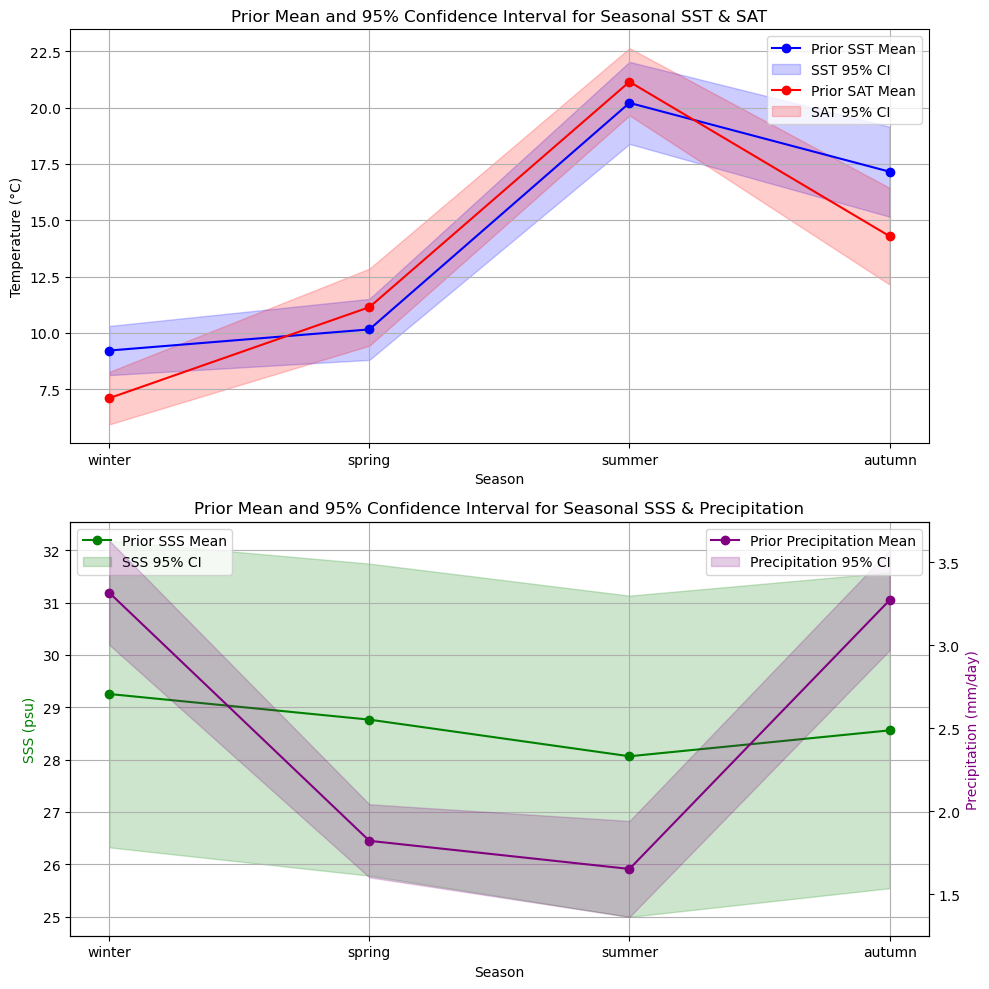

In [19]:
# Define the seasons, number of models, and scale for the x-axis
seasons = ["winter", "spring", "summer", "autumn"]
n_models_seasonal = len(PlioMIP["modelname"])  # Find the total number of models
seasons_scale = np.arange(len(seasons)) + 1  # Create seasonal scale

# Create a 1x2 plotting grid
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Panel 1: Plot the prior distribution for SST and SAT
axes[0].plot(seasons_scale, mu_prior_SST_seasonal, label='Prior SST Mean', marker='o', color='b')
axes[0].fill_between(
    seasons_scale,
    mu_prior_SST_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SST_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='b', label='SST 95% CI'
)
axes[0].plot(seasons_scale, mu_prior_SAT_seasonal, label='Prior SAT Mean', marker='o', color='r')
axes[0].fill_between(
    seasons_scale,
    mu_prior_SAT_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SAT_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='r', label='SAT 95% CI'
)
axes[0].set_title('Prior Mean and 95% Confidence Interval for Seasonal SST & SAT')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_xticks(seasons_scale)
axes[0].set_xticklabels(seasons)
axes[0].legend()
axes[0].grid(True)

# Panel 2: Plot the prior distribution for SSS and precipitation
axes[1].plot(seasons_scale, mu_prior_SSS_seasonal, label='Prior SSS Mean', marker='o', color='g')
ax2 = axes[1].twinx()  # Create a secondary y-axis for precipitation
ax2.plot(seasons_scale, mu_prior_precip_seasonal, label='Prior Precipitation Mean', marker='o', color='purple')

# Add 95% confidence intervals for SSS
axes[1].fill_between(
    seasons_scale,
    mu_prior_SSS_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SSS_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='g', label='SSS 95% CI'
)

# Add 95% confidence intervals for precipitation
ax2.fill_between(
    seasons_scale,
    mu_prior_precip_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_precip_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='purple', label='Precipitation 95% CI'
)

axes[1].set_title('Prior Mean and 95% Confidence Interval for Seasonal SSS & Precipitation')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('SSS (psu)', color='g')
ax2.set_ylabel('Precipitation (mm/day)', color='purple')
axes[1].set_xticks(seasons_scale)
axes[1].set_xticklabels(seasons)
axes[1].legend(loc='upper left')
ax2.legend(loc='upper right')
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Calculate the seasonal prior for model SST and SAT-derived D47 values with propagated uncertainty

In [20]:
# Set the weights of the data based on the standard errors
weights_seasonal_SST_D47 = 1 / PlioMIP_seasonal[[f"{season}_SST_D47_SE" for season in seasons]] ** 2
weights_seasonal_SAT_D47 = 1 / PlioMIP_seasonal[[f"{season}_SAT_D47_SE" for season in seasons]] ** 2

# Change the column suffixes from "_D47_SE" to "_D47" in weights_seasonal to match the headers of the D47 matrix later for multiplication
weights_seasonal_SST_D47.columns = [col.replace('_SST_D47_SE', '_SST_D47') for col in weights_seasonal_SST_D47.columns]
weights_seasonal_SAT_D47.columns = [col.replace('_SAT_D47_SE', '_SAT_D47') for col in weights_seasonal_SAT_D47.columns]

# Prior D47 estimates from climate models (weighted mean)
mu_prior_SST_D47_seasonal = np.array((PlioMIP_seasonal[[f"{season}_SST_D47" for season in seasons]] * weights_seasonal_SST_D47).sum(axis = 0, skipna = True) / weights_seasonal_SST_D47.sum(axis = 0, skipna = True)) # Calculate weighted seasonal mean D47 values and convert to numpy array
mu_prior_SAT_D47_seasonal = np.array((PlioMIP_seasonal[[f"{season}_SAT_D47" for season in seasons]] * weights_seasonal_SAT_D47).sum(axis = 0, skipna = True) / weights_seasonal_SAT_D47.sum(axis = 0, skipna = True)) # Calculate weighted seasonal mean D47 values and convert to numpy array

# Calculate simple (unweighted) mean for monthly d18Oc values
mu_prior_d18Oc_seasonal = np.array(PlioMIP_seasonal[[f"{season}_d18Oc" for season in seasons]].mean(axis=0, skipna=True))
mu_prior_precip_seasonal = np.array(PlioMIP_seasonal[[f"{season}_precip" for season in seasons]].mean(axis=0, skipna=True))

# Decompose variance within and between model outcomes
model_variances_SST_D47 = PlioMIP_seasonal[[f"{season}_SST_D47" for season in seasons]].var(axis = 0, ddof = 1)  # Compute variance across models
model_variances_SAT_D47 = PlioMIP_seasonal[[f"{season}_SAT_D47" for season in seasons]].var(axis = 0, ddof = 1)  # Compute variance across models
measurement_variances_SST_D47 = (PlioMIP_seasonal[[f"{season}_SST_D47_SE" for season in seasons]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements
measurement_variances_SAT_D47 = (PlioMIP_seasonal[[f"{season}_SAT_D47_SE" for season in seasons]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements

# Covariance between seasons in prior D47 estimates from climate models (weighted covariance matrix)
cov_raw_seasonal_SST_D47 = np.cov(PlioMIP_seasonal[[f"{season}_SST_D47" for season in seasons]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_seasonal_SAT_D47 = np.cov(PlioMIP_seasonal[[f"{season}_SAT_D47" for season in seasons]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_seasonal_d18Oc = np.cov(PlioMIP_seasonal[[f"{season}_d18Oc" for season in seasons]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_seasonal_precip = np.cov(PlioMIP_seasonal[[f"{season}_precip" for season in seasons]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_prior_SST_D47_seasonal = cov_raw_seasonal_SST_D47.copy()  # Copy covariance matrix to add uncertainty coming from the measurements
cov_prior_SAT_D47_seasonal = cov_raw_seasonal_SAT_D47.copy()  # Copy covariance matrix to add uncertainty coming from the measurements
cov_prior_d18Oc_seasonal = cov_raw_seasonal_d18Oc.copy()  # Copy covariance matrix to add uncertainty coming from the measurements
cov_prior_precip_seasonal = cov_raw_seasonal_precip.copy()  # Copy covariance matrix to add uncertainty coming from the measurements
np.fill_diagonal(cov_prior_SST_D47_seasonal, np.diagonal(cov_raw_seasonal_SST_D47) + measurement_variances_SST_D47)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)
np.fill_diagonal(cov_prior_SAT_D47_seasonal, np.diagonal(cov_raw_seasonal_SAT_D47) + measurement_variances_SAT_D47)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)

# Store copy of original prior means to keep when later updating the prior
mu_prior_SST_D47_seasonal_original, cov_prior_SST_D47_seasonal_original = mu_prior_SST_D47_seasonal.copy(), cov_prior_SST_D47_seasonal.copy()
mu_prior_SAT_D47_seasonal_original, cov_prior_SAT_D47_seasonal_original = mu_prior_SAT_D47_seasonal.copy(), cov_prior_SAT_D47_seasonal.copy()
mu_prior_d18Oc_seasonal_original, cov_prior_d18Oc_seasonal_original = mu_prior_d18Oc_seasonal.copy(), cov_raw_seasonal_d18Oc.copy()
mu_prior_precip_seasonal_original, cov_prior_precip_seasonal_original = mu_prior_precip_seasonal.copy(), cov_raw_seasonal_precip.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_SST_D47_seasonal = np.sqrt(np.diag(cov_prior_SST_D47_seasonal))
std_prior_SAT_D47_seasonal = np.sqrt(np.diag(cov_prior_SAT_D47_seasonal))
std_prior_d18Oc_seasonal = np.sqrt(np.diag(cov_prior_d18Oc_seasonal))
std_prior_precip_seasonal = np.sqrt(np.diag(cov_prior_precip_seasonal))

print("mu_prior_SST_D47_seasonal:", mu_prior_SST_D47_seasonal)
print("std_prior_SST_D47_seasonal:", std_prior_SST_D47_seasonal)
print("mu_prior_SAT_D47_seasonal:", mu_prior_SAT_D47_seasonal)
print("std_prior_SAT_D47_seasonal:", std_prior_SAT_D47_seasonal)
print("mu_prior_d18Oc_seasonal:", mu_prior_d18Oc_seasonal)
print("std_prior_d18Oc_seasonal:", std_prior_d18Oc_seasonal)
print("mu_prior_precip_seasonal:", mu_prior_precip_seasonal)
print("std_prior_precip_seasonal:", std_prior_precip_seasonal)

mu_prior_SST_D47_seasonal: [0.64458794 0.64100872 0.60755872 0.61700536]
std_prior_SST_D47_seasonal: [0.00772363 0.00941372 0.01142462 0.01282204]
mu_prior_SAT_D47_seasonal: [0.65205615 0.63713651 0.60487177 0.62601898]
std_prior_SAT_D47_seasonal: [0.00842496 0.01172742 0.00926006 0.0141815 ]
mu_prior_d18Oc_seasonal: [ 1.1678383   0.86777546 -1.58440029 -0.77581287]
std_prior_d18Oc_seasonal: [1.74740318 1.75823404 1.71921174 1.87641915]
mu_prior_precip_seasonal: [3.317808   1.82214404 1.65266013 3.27264247]
std_prior_precip_seasonal: [0.61349977 0.43033978 0.56515855 0.5898544 ]


## Plot the seasonal prior for model SST- and SAT-derived D47 values, d18Oc values and precipitation with propagated uncertainty

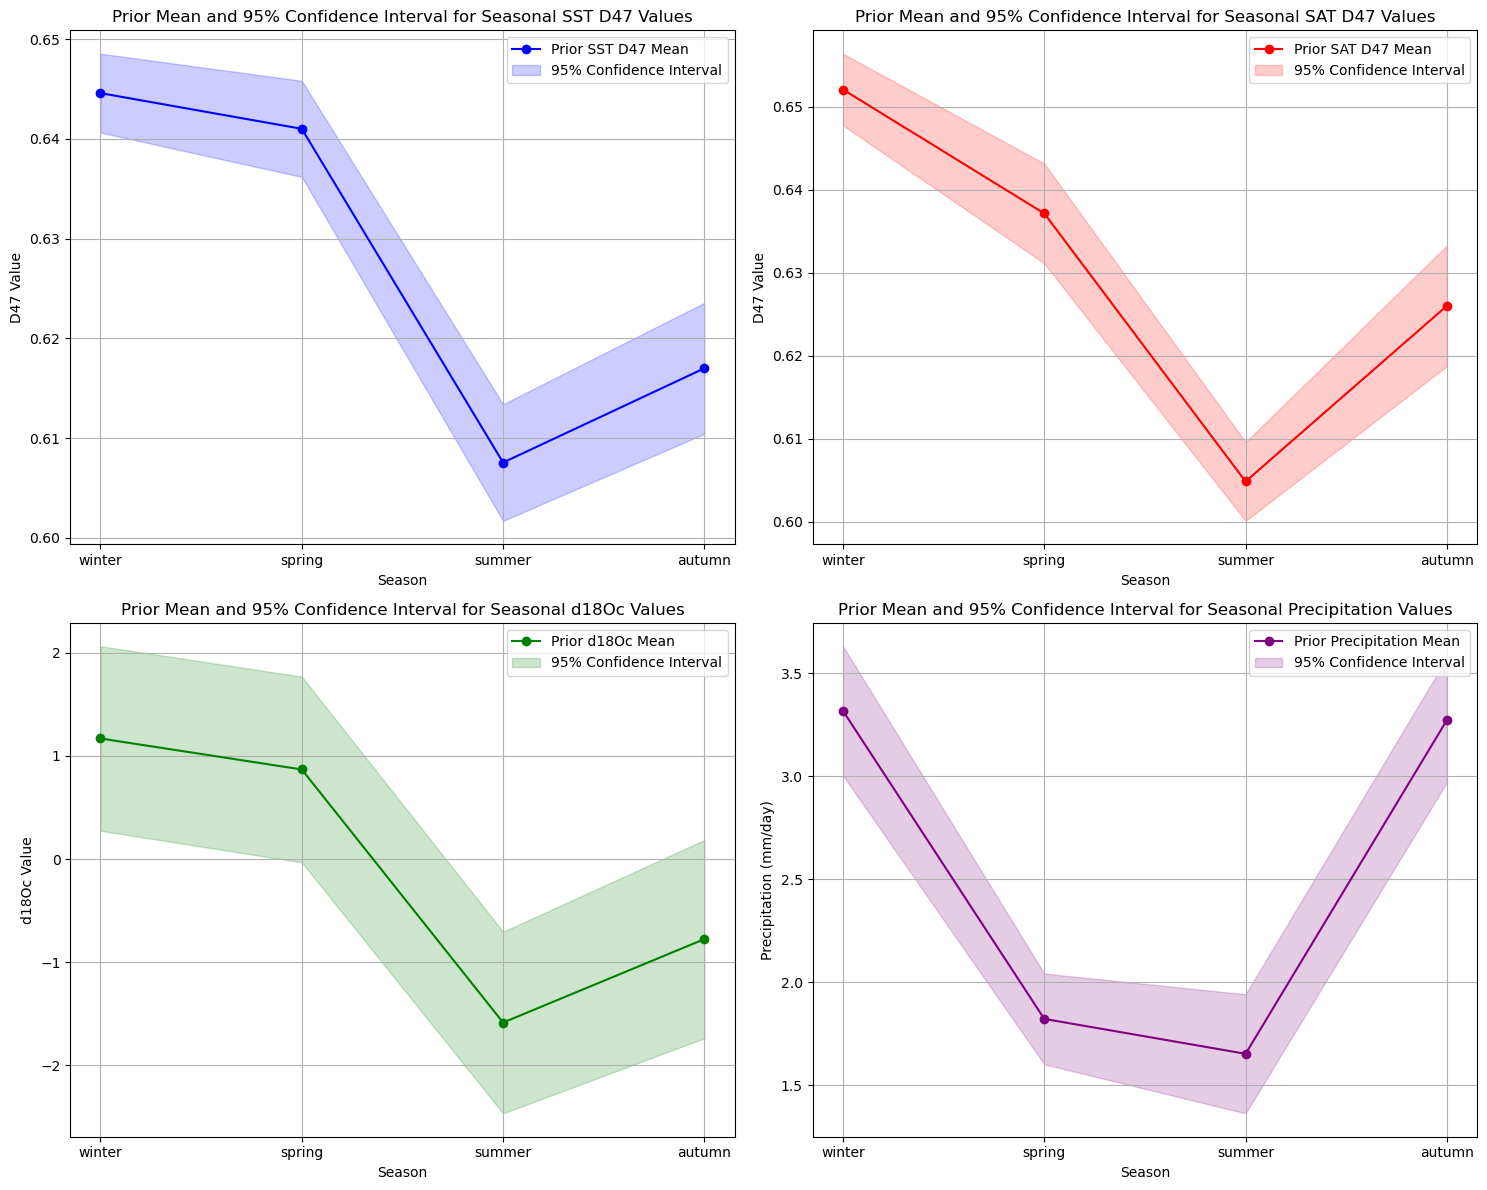

In [21]:
# Define the seasons, number of models, and scale for the x-axis
seasons = ["winter", "spring", "summer", "autumn"]
n_models_seasonal = len(PlioMIP["modelname"])  # Find the total number of models (use monthly data because seasonal data has this column duplicated 3 times)
seasons_scale = np.arange(len(seasons)) + 1  # Create seasonal scale

# Create a 2x2 plotting grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Panel 1: Plot the prior distribution for SST D47 values
axes[0, 0].plot(seasons_scale, mu_prior_SST_D47_seasonal[:len(seasons)], label='Prior SST D47 Mean', marker='o', color='b')
axes[0, 0].fill_between(
    seasons_scale,
    mu_prior_SST_D47_seasonal[:len(seasons)] - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SST_D47_seasonal[:len(seasons)] + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='b', label='95% Confidence Interval'
)
axes[0, 0].set_title('Prior Mean and 95% Confidence Interval for Seasonal SST D47 Values')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('D47 Value')
axes[0, 0].set_xticks(seasons_scale)
axes[0, 0].set_xticklabels(seasons)
axes[0, 0].legend()
axes[0, 0].grid(True)

# Panel 2: Plot the prior distribution for SAT D47 values
axes[0, 1].plot(seasons_scale, mu_prior_SAT_D47_seasonal[:len(seasons)], label='Prior SAT D47 Mean', marker='o', color='r')
axes[0, 1].fill_between(
    seasons_scale,
    mu_prior_SAT_D47_seasonal[:len(seasons)] - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_D47_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SAT_D47_seasonal[:len(seasons)] + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_D47_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='r', label='95% Confidence Interval'
)
axes[0, 1].set_title('Prior Mean and 95% Confidence Interval for Seasonal SAT D47 Values')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('D47 Value')
axes[0, 1].set_xticks(seasons_scale)
axes[0, 1].set_xticklabels(seasons)
axes[0, 1].legend()
axes[0, 1].grid(True)

# Panel 3: Plot the prior distribution for d18Oc
axes[1, 0].plot(seasons_scale, mu_prior_d18Oc_seasonal, label='Prior d18Oc Mean', marker='o', color='g')
axes[1, 0].fill_between(
    seasons_scale,
    mu_prior_d18Oc_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_d18Oc_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_d18Oc_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_d18Oc_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='g', label='95% Confidence Interval'
)
axes[1, 0].set_title('Prior Mean and 95% Confidence Interval for Seasonal d18Oc Values')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('d18Oc Value')
axes[1, 0].set_xticks(seasons_scale)
axes[1, 0].set_xticklabels(seasons)
axes[1, 0].legend()
axes[1, 0].grid(True)

# Panel 4: Plot the prior distribution for precipitation
axes[1, 1].plot(seasons_scale, mu_prior_precip_seasonal, label='Prior Precipitation Mean', marker='o', color='purple')
axes[1, 1].fill_between(
    seasons_scale,
    mu_prior_precip_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_precip_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='purple', label='95% Confidence Interval'
)
axes[1, 1].set_title('Prior Mean and 95% Confidence Interval for Seasonal Precipitation Values')
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('Precipitation (mm/day)')
axes[1, 1].set_xticks(seasons_scale)
axes[1, 1].set_xticklabels(seasons)
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Calculate the seasonal covariance matrix for D47 values derived from SST and SAT values, d18Oc and precipitation

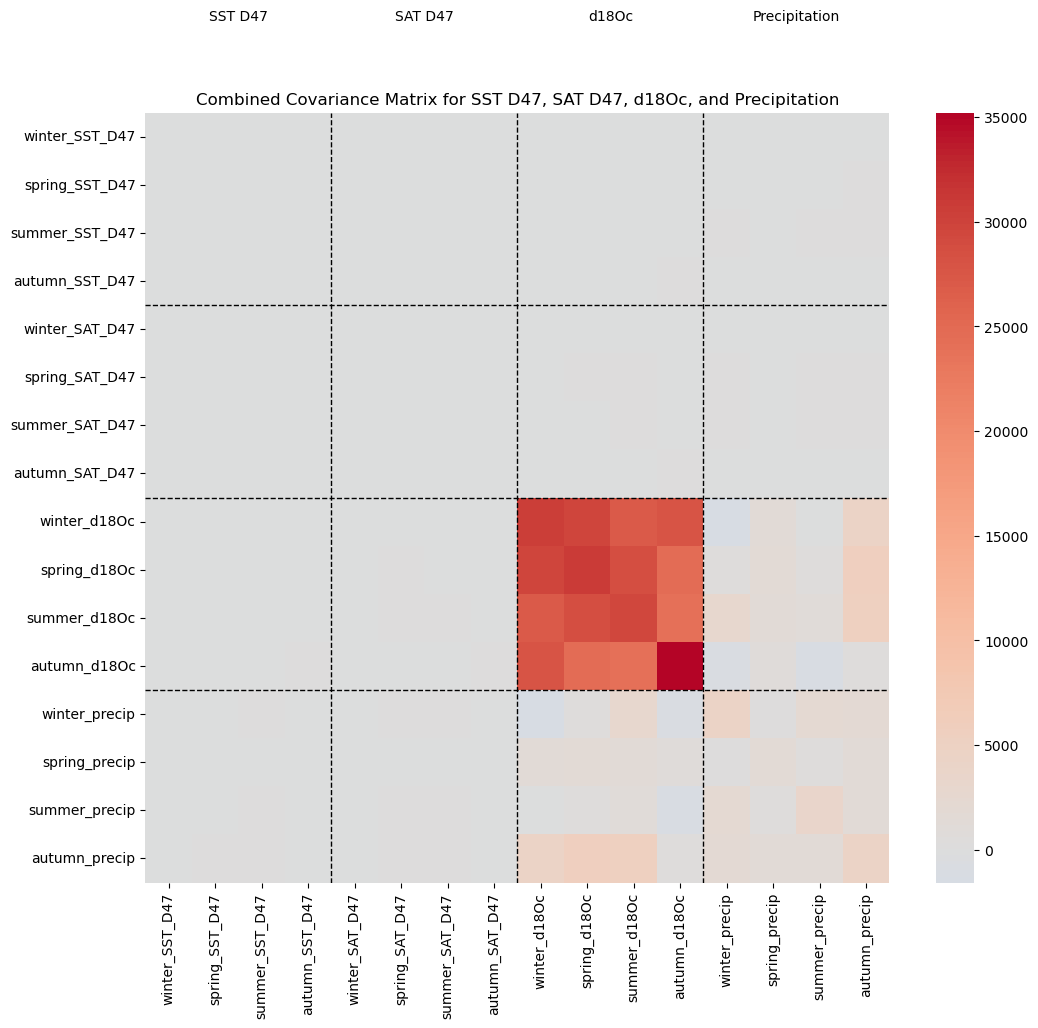

In [22]:
# Extract the relevant columns for SST, SAT D47, d18Oc, and precipitation
SST_D47_columns_seasonal = [f"{season}_SST_D47" for season in seasons]
SAT_D47_columns_seasonal = [f"{season}_SAT_D47" for season in seasons]
d18Oc_columns_seasonal = [f"{season}_d18Oc" for season in seasons]
precip_columns_seasonal = [f"{season}_precip" for season in seasons]

# Combine the relevant columns into a single dataframe
combined_data_seasonal = PlioMIP_seasonal[
    SST_D47_columns_seasonal + SAT_D47_columns_seasonal + d18Oc_columns_seasonal + precip_columns_seasonal
]

# Calculate the covariance matrix for the combined data
cov_combined_seasonal = np.cov(combined_data_seasonal.dropna(), rowvar=False)

# Extract the covariance matrices for each variable
cov_SST_D47_seasonal = cov_combined_seasonal[:len(seasons), :len(seasons)]
cov_SAT_D47_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), len(seasons):2*len(seasons)]
cov_d18Oc_seasonal = cov_combined_seasonal[2*len(seasons):3*len(seasons), 2*len(seasons):3*len(seasons)]
cov_precip_seasonal = cov_combined_seasonal[3*len(seasons):, 3*len(seasons):]

# Extract the cross-covariance matrices
cross_cov_SST_SAT_D47_seasonal = cov_combined_seasonal[:len(seasons), len(seasons):2*len(seasons)]
cross_cov_SST_d18Oc_seasonal = cov_combined_seasonal[:len(seasons), 2*len(seasons):3*len(seasons)]
cross_cov_SST_precip_seasonal = cov_combined_seasonal[:len(seasons), 3*len(seasons):]
cross_cov_SAT_d18Oc_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), 2*len(seasons):3*len(seasons)]
cross_cov_SAT_precip_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), 3*len(seasons):]
cross_cov_d18Oc_precip_seasonal = cov_combined_seasonal[2*len(seasons):3*len(seasons), 3*len(seasons):]

# Plot a heatmap of the combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    np.round(cov_combined_seasonal * 10**4, 1),  # Scale by 10^4 for better visualization and round values
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SST_D47_columns_seasonal + SAT_D47_columns_seasonal + d18Oc_columns_seasonal + precip_columns_seasonal,
    yticklabels=SST_D47_columns_seasonal + SAT_D47_columns_seasonal + d18Oc_columns_seasonal + precip_columns_seasonal
)

# Add titles to the axes per parameter
plt.axvline(x=len(SST_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal) + len(d18Oc_columns_seasonal), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SST_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal) + len(d18Oc_columns_seasonal), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SST_D47_columns_seasonal) / 2, -2, 'SST D47', ha='center', va='center', fontsize=10)
plt.text(len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal) / 2, -2, 'SAT D47', ha='center', va='center', fontsize=10)
plt.text(len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal) + len(d18Oc_columns_seasonal) / 2, -2, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal) + len(d18Oc_columns_seasonal) + len(precip_columns_seasonal) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.title("Combined Covariance Matrix for SST D47, SAT D47, d18Oc, and Precipitation")
plt.show()

## Plot normalized seasonal covariance matrix between D47 values of SST and SAT, d18Oc and precipitation

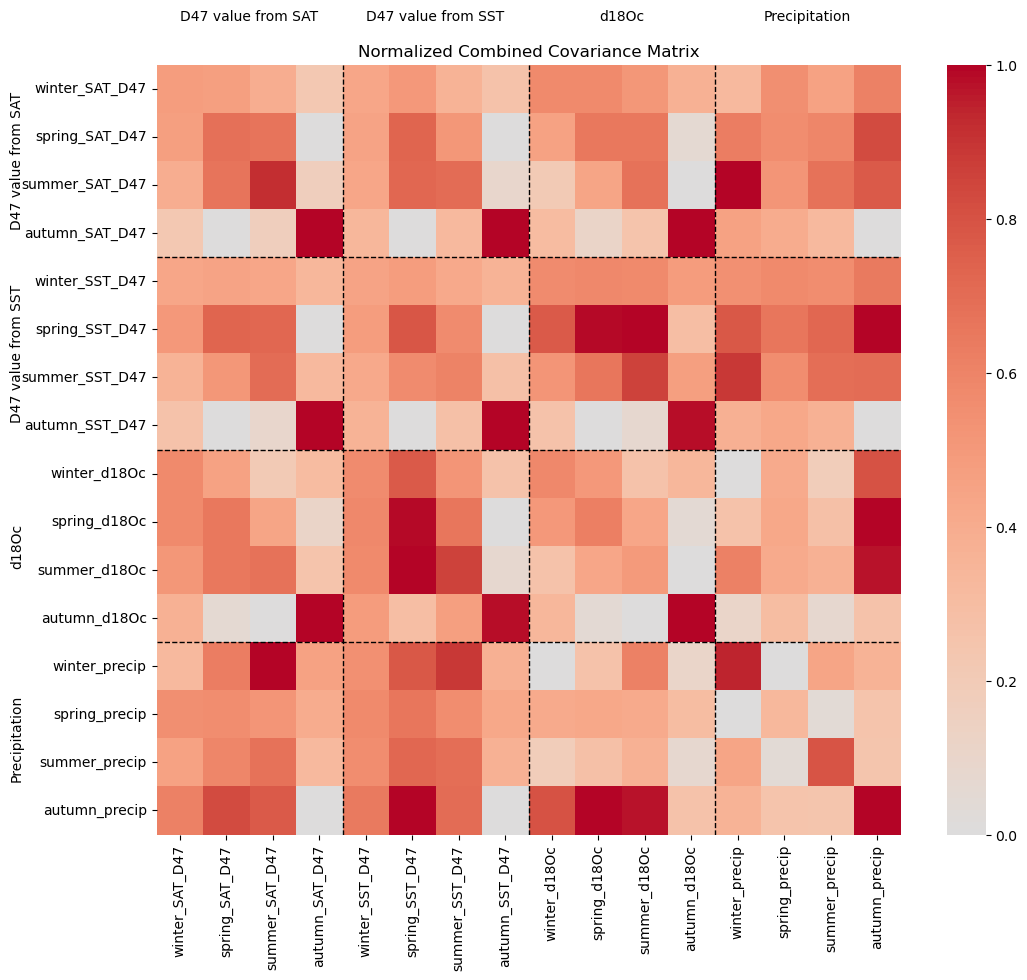

In [23]:
# Normalize each submatrix independently for better visualization
def normalize_matrix(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    return (matrix - min_val) / (max_val - min_val)

# Extract the covariance matrices for SAT D47, SST D47, d18Oc, and precipitation
cov_SAT_D47_seasonal = cov_combined_seasonal[:len(seasons), :len(seasons)]
cov_SST_D47_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), len(seasons):2*len(seasons)]
cov_d18Oc_seasonal = cov_combined_seasonal[2*len(seasons):3*len(seasons), 2*len(seasons):3*len(seasons)]
cov_precip_seasonal = cov_combined_seasonal[3*len(seasons):, 3*len(seasons):]

# Extract the cross-covariance matrices
cross_cov_SAT_SST_D47_seasonal = cov_combined_seasonal[:len(seasons), len(seasons):2*len(seasons)]
cross_cov_SAT_d18Oc_seasonal = cov_combined_seasonal[:len(seasons), 2*len(seasons):3*len(seasons)]
cross_cov_SAT_precip_seasonal = cov_combined_seasonal[:len(seasons), 3*len(seasons):]
cross_cov_SST_d18Oc_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), 2*len(seasons):3*len(seasons)]
cross_cov_SST_precip_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), 3*len(seasons):]
cross_cov_d18Oc_precip_seasonal = cov_combined_seasonal[2*len(seasons):3*len(seasons), 3*len(seasons):]

# Normalize each submatrix
normalized_cov_SAT_D47_seasonal = normalize_matrix(cov_SAT_D47_seasonal)
normalized_cov_SST_D47_seasonal = normalize_matrix(cov_SST_D47_seasonal)
normalized_cov_d18Oc_seasonal = normalize_matrix(cov_d18Oc_seasonal)
normalized_cov_precip_seasonal = normalize_matrix(cov_precip_seasonal)

# Normalize each cross-covariance matrix
normalized_cross_cov_SAT_SST_D47_seasonal = normalize_matrix(cross_cov_SAT_SST_D47_seasonal)
normalized_cross_cov_SAT_d18Oc_seasonal = normalize_matrix(cross_cov_SAT_d18Oc_seasonal)
normalized_cross_cov_SAT_precip_seasonal = normalize_matrix(cross_cov_SAT_precip_seasonal)
normalized_cross_cov_SST_d18Oc_seasonal = normalize_matrix(cross_cov_SST_d18Oc_seasonal)
normalized_cross_cov_SST_precip_seasonal = normalize_matrix(cross_cov_SST_precip_seasonal)
normalized_cross_cov_d18Oc_precip_seasonal = normalize_matrix(cross_cov_d18Oc_precip_seasonal)

# Combine the normalized submatrices into a single normalized covariance matrix
normalized_cov_combined_seasonal = np.block([
    [normalized_cov_SAT_D47_seasonal, normalized_cross_cov_SAT_SST_D47_seasonal, normalized_cross_cov_SAT_d18Oc_seasonal, normalized_cross_cov_SAT_precip_seasonal],
    [normalized_cross_cov_SAT_SST_D47_seasonal.T, normalized_cov_SST_D47_seasonal, normalized_cross_cov_SST_d18Oc_seasonal, normalized_cross_cov_SST_precip_seasonal],
    [normalized_cross_cov_SAT_d18Oc_seasonal.T, normalized_cross_cov_SST_d18Oc_seasonal.T, normalized_cov_d18Oc_seasonal, normalized_cross_cov_d18Oc_precip_seasonal],
    [normalized_cross_cov_SAT_precip_seasonal.T, normalized_cross_cov_SST_precip_seasonal.T, normalized_cross_cov_d18Oc_precip_seasonal.T, normalized_cov_precip_seasonal]
])

# Plot the heatmap of the normalized combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    normalized_cov_combined_seasonal,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_columns_seasonal + SST_D47_columns_seasonal + d18Oc_columns_seasonal + precip_columns_seasonal,
    yticklabels=SAT_D47_columns_seasonal + SST_D47_columns_seasonal + d18Oc_columns_seasonal + precip_columns_seasonal
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_columns_seasonal) / 2, -1, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) / 2, -1, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal) / 2, -1, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal) + len(precip_columns_seasonal) / 2, -1, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-3, len(SAT_D47_columns_seasonal) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-3, len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-3, len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal) / 2, 'd18Oc', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-3, len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal) + len(precip_columns_seasonal) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Normalized Combined Covariance Matrix")
plt.show()

## Create combined seasonal state vector

In [24]:
# Combine the prior means of D47 and SAT into a single state vector
mu_prior_seasonal_combined = np.concatenate((mu_prior_SST_D47_seasonal, mu_prior_SAT_D47_seasonal, mu_prior_d18Oc_seasonal, mu_prior_precip_seasonal))

# Combine the covariance matrices of D47 values of SST and SAT, d18Oc and precipitation including the cross-covariance
cov_prior_seasonal_combined = cov_combined_seasonal.copy()

# OBSERVATIONS
## Load clumped data for updating
### Seasonal data from PWP paper

In [25]:
# Load seasonal measurements and format them into a dictionary
# This is precompiled seasonal data per specimen and therefore does not come with a time uncertainty
PWP_data_seasonal = pd.read_csv('PWP case/PWP_proxy_data_seasonal.csv') # Load the data for this assignment into Python and in the Jupyter environment.
PWP_data_seasonal_dict = PWP_data_seasonal.to_dict('records') # Convert to dictionary with column headers as keys

# Add an entry for the time uncertainty (which is always zero in this case, because data is already aggregated seasonally)
for record in PWP_data_seasonal_dict:
    record["Season_err"] = 0

### Monthly and seasonal data calculated from ShellChron outcomes

In [26]:
# Load measurements and format them into a dictionary
# These are the actual individual D47 measurements and ShellChron outcomes and thus come with a time uncertainty which can be propagated.
PWP_data = pd.read_csv('PWP case/PWP_proxy_data_months.csv') # Load the data for this assignment into Python and in the Jupyter environment.
PWP_data_dict = PWP_data.to_dict('records') # Convert to dictionary with column headers as keys

# Process the ShellChron_DOY_err field and create a new entry for months
for record in PWP_data_dict:
    # Handle missing values and convert from days to months and seasons
    shell_chron_doy_err = record.get("ShellChron_DOY_err", np.nan)  # Get value, default to NaN if missing
    if pd.isna(shell_chron_doy_err):  # Check if the value is NaN
        record["ShellChron_Month_err"] = 0  # Set the new entry to 0 if missing
        record["ShellChron_Season_err"] = 0  # Set the new entry to 0 if missing
        record["ShellChron_no_err"] = 0  # Add a new entry for no error
    else:
        record["ShellChron_Month_err"] = shell_chron_doy_err / 365 * 12  # Convert days to months
        record["ShellChron_Season_err"] = shell_chron_doy_err / 365 * 4  # Convert days to seasons
        record["ShellChron_no_err"] = 0  # Add a new entry for no error
    
    # Add the month_score2 and season_score field based on the ShellChron_DOY field
    ShellChron_DOY = record.get("ShellChron_DOY_rotated", np.nan)  # Get the ShellChron day of the year value
    if not pd.isna(ShellChron_DOY):  # Check if the ShellChron value is not NaN
        record["month_score2"] = ShellChron_DOY / 365 * 12  # Convert DOY value to month_score
        record["season_score"] = ShellChron_DOY / 365 * 4  # Convert DOY value to season_score

## Prepare measurement and observation matrices

### Define a wrapped normal distribution to allow uncertainty in the time domain to flow around the year

In [27]:
# Function to calculate wrapped normal distribution weights
def wrapped_normal_pdf(x, mean, sd, num_bins):
    # Calculate the normal PDF for each bin
    pdf = stats.norm.pdf(x, loc = mean, scale = sd)
    # Wrap around the bins
    for i in range(1, num_bins):
        pdf += stats.norm.pdf(x + i * num_bins, loc = mean, scale = sd)
        pdf += stats.norm.pdf(x - i * num_bins, loc = mean, scale = sd)
    # Normalize the weights to ensure the sum equals 1
    pdf /= pdf.sum()
    return pdf

## Observations on seasonal scale

### Measurement matrix for seasonally aggregated D47 values ignoring time uncertainty

In [28]:
# Initialize dictionaries to store aggregated measurements and uncertainties per season
D47_measurements_seasonal = {season: [] for season in seasons}
d18Oc_measurements_seasonal = {season: [] for season in seasons}
D47_measurement_uncertainties_seasonal = {season: [] for season in seasons}
d18Oc_measurement_uncertainties_seasonal = {season: [] for season in seasons}

# Aggregate measurements and uncertainties per season
for measurement in PWP_data_dict:
    if not pd.isna(measurement["D47_corrETF_strict"]):
        season_index = int(measurement["season_score"])
        D47_measurements_seasonal[seasons[season_index]].append(measurement["D47_corrETF_strict"])
        D47_measurement_uncertainties_seasonal[seasons[season_index]].append(measurement["D47_sd_ext"] ** 2)
    if not pd.isna(measurement["Final_d18O"]):
        season_index = int(measurement["season_score"])
        d18Oc_measurements_seasonal[seasons[season_index]].append(measurement["Final_d18O"])
        d18Oc_measurement_uncertainties_seasonal[seasons[season_index]].append(measurement["d18O_sd_ext"] ** 2)

# Calculate weighted mean and propagated uncertainty for each season
D47_aggregated_measurements_seasonal = []
d18Oc_aggregated_measurements_seasonal = []
D47_aggregated_uncertainties_seasonal = []
d18Oc_aggregated_uncertainties_seasonal = []

for season in seasons:
    if D47_measurements_seasonal[season]:
        weights = 1 / np.array(D47_measurement_uncertainties_seasonal[season])
        weighted_mean = np.sum(np.array(D47_measurements_seasonal[season]) * weights) / np.sum(weights)
        measurement_variance = np.var(D47_measurements_seasonal[season], ddof=1)
        propagated_uncertainty = np.sqrt(1 / np.sum(weights) + measurement_variance)
        D47_aggregated_measurements_seasonal.append(weighted_mean)
        D47_aggregated_uncertainties_seasonal.append(propagated_uncertainty ** 2)
    if d18Oc_measurements_seasonal[season]:
        weights = 1 / np.array(d18Oc_measurement_uncertainties_seasonal[season])
        weighted_mean = np.sum(np.array(d18Oc_measurements_seasonal[season]) * weights) / np.sum(weights)
        measurement_variance = np.var(d18Oc_measurements_seasonal[season], ddof=1)
        propagated_uncertainty = np.sqrt(1 / np.sum(weights) + measurement_variance)
        d18Oc_aggregated_measurements_seasonal.append(weighted_mean)
        d18Oc_aggregated_uncertainties_seasonal.append(propagated_uncertainty ** 2)

# OPTIONAL: Lower boundary d18Oc varaince at 0.01 (equivalent to 0.1 per mil measurement uncertainty)
d18Oc_aggregated_uncertainties_seasonal = [max(uncertainty, 0.01) for uncertainty in d18Oc_aggregated_uncertainties_seasonal]

# Create the measurement matrix Z
Z_seasonal_aggregated = np.array(D47_aggregated_measurements_seasonal + d18Oc_aggregated_measurements_seasonal).reshape(-1, 1)

# Create the measurement uncertainty matrix R (diagonal matrix)
R_seasonal_aggregated = np.diag(D47_aggregated_uncertainties_seasonal + d18Oc_aggregated_uncertainties_seasonal)  # Diagonal matrix of measurement uncertainties

print("Z_seasonal_aggregated:", Z_seasonal_aggregated)
print("R_seasonal_aggregated:", R_seasonal_aggregated)

Z_seasonal_aggregated: [[0.64310556]
 [0.63669529]
 [0.63254458]
 [0.63980932]
 [1.67395562]
 [1.39279544]
 [1.50143429]
 [1.72473579]]
R_seasonal_aggregated: [[0.00244056 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.00230931 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.0023447  0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.00291862 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.79193537 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.64889626
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.65554586 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.71774326]]


### Observation matrix for seasonally aggregated D47 data

In [29]:
# Create the observation matrix H for seasonally aggregated data

# Define the number of seasons or months
num_seasons = 4

# Number of seasonally aggregated measurements
N_measurements_seasonal_aggregated = len(Z_seasonal_aggregated)
H_seasonal_aggregated = np.zeros((N_measurements_seasonal_aggregated, len(mu_prior_seasonal_combined)))

# Fill the observation matrix H with ones at the positions corresponding to the measurements
for i, measurement in enumerate(Z_seasonal_aggregated):
    if i < N_measurements_seasonal_aggregated // 2:
        time_index = i % num_seasons  # Ensure the index is within the range of seasons
        H_seasonal_aggregated[i, time_index] = 1
    else:
        time_index = i % num_seasons
        H_seasonal_aggregated[i, time_index + 8] = 1

print(H_seasonal_aggregated)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Observations on monthly scale

### Measurement matrix for monthly aggregated D47 values

In [30]:
# Initialize dictionaries to store aggregated measurements and uncertainties per month
D47_measurements_monthly = {month: [] for month in month_names}
d18Oc_measurements_monthly = {month: [] for month in month_names}
D47_measurement_uncertainties_monthly = {month: [] for month in month_names}
d18Oc_measurement_uncertainties_monthly = {month: [] for month in month_names}

# Aggregate measurements and uncertainties per month
for measurement in PWP_data_dict:
    if not pd.isna(measurement["D47_corrETF_strict"]):
        month_index = int(measurement["month_score2"])
        D47_measurements_monthly[month_names[month_index]].append(measurement["D47_corrETF_strict"])
        D47_measurement_uncertainties_monthly[month_names[month_index]].append(measurement["D47_sd_ext"] ** 2)
    if not pd.isna(measurement["Final_d18O"]):
        month_index = int(measurement["month_score2"])
        d18Oc_measurements_monthly[month_names[month_index]].append(measurement["Final_d18O"])
        d18Oc_measurement_uncertainties_monthly[month_names[month_index]].append(measurement["d18O_sd_ext"] ** 2)

# Calculate weighted mean and propagated uncertainty for each month
D47_aggregated_measurements_monthly = []
d18Oc_aggregated_measurements_monthly = []
D47_aggregated_uncertainties_monthly = []
d18Oc_aggregated_uncertainties_monthly = []

for month in month_names:
    if D47_measurements_monthly[month]:
        weights = 1 / np.array(D47_measurement_uncertainties_monthly[month])
        weighted_mean = np.sum(np.array(D47_measurements_monthly[month]) * weights) / np.sum(weights)
        measurement_variance = np.var(D47_measurements_monthly[month], ddof=1)
        propagated_uncertainty = np.sqrt(1 / np.sum(weights) + measurement_variance)
        D47_aggregated_measurements_monthly.append(weighted_mean)
        D47_aggregated_uncertainties_monthly.append(propagated_uncertainty ** 2)
    if d18Oc_measurements_monthly[month]:
        weights = 1 / np.array(d18Oc_measurement_uncertainties_monthly[month])
        weighted_mean = np.sum(np.array(d18Oc_measurements_monthly[month]) * weights) / np.sum(weights)
        measurement_variance = np.var(d18Oc_measurements_monthly[month], ddof=1)
        propagated_uncertainty = np.sqrt(1 / np.sum(weights) + measurement_variance)
        d18Oc_aggregated_measurements_monthly.append(weighted_mean)
        d18Oc_aggregated_uncertainties_monthly.append(propagated_uncertainty ** 2)

# OPTIONAL: Lower boundary d18Oc variance at 0.01 (equivalent to 0.1 per mil measurement uncertainty)
d18Oc_aggregated_uncertainties_monthly = [max(uncertainty, 0.01) for uncertainty in d18Oc_aggregated_uncertainties_monthly]

# Create the measurement matrix Z
Z_monthly_aggregated = np.array(D47_aggregated_measurements_monthly + d18Oc_aggregated_measurements_monthly).reshape(-1, 1)

# Create the measurement uncertainty matrix R (diagonal matrix)
R_monthly_aggregated = np.diag(D47_aggregated_uncertainties_monthly + d18Oc_aggregated_uncertainties_monthly)  # Diagonal matrix of measurement uncertainties

print("Z_monthly_aggregated:", Z_monthly_aggregated)
print("R_monthly_aggregated:", R_monthly_aggregated)

Z_monthly_aggregated: [[0.6286965 ]
 [0.66196597]
 [0.63593138]
 [0.63587406]
 [0.6385765 ]
 [0.63610532]
 [0.64055775]
 [0.58409635]
 [0.64753068]
 [0.65564679]
 [0.62024339]
 [0.63756647]
 [1.92069861]
 [1.77654022]
 [1.38742522]
 [1.20859978]
 [1.52259534]
 [1.52992939]
 [1.52807461]
 [1.50322068]
 [1.44285092]
 [1.47484531]
 [1.83296327]
 [1.88853586]]
R_monthly_aggregated: [[0.00161332 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.00296031 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.00213726 0.         0.         0.
  0.         0.         0.         0.         0.         0.
 

### Observation matrix for monthly aggregated D47 data

In [31]:
# Create the observation matrix H for monthly aggregated data

# Define the number of seasons or months
num_months = 12

# Number of monthly aggregated measurements
N_measurements_monthly_aggregated = len(Z_monthly_aggregated)
H_monthly_aggregated = np.zeros((N_measurements_monthly_aggregated, len(mu_prior_monthly_combined)))

# Fill the observation matrix H with ones at the positions corresponding to the measurements
for i, measurement in enumerate(Z_monthly_aggregated):
    if i < N_measurements_monthly_aggregated // 2:
        time_index = i % num_months  # Ensure the index is within the range of months
        H_monthly_aggregated[i, time_index] = 1
    else:
        time_index = i % num_months
        H_monthly_aggregated[i, time_index + 24] = 1

print(H_monthly_aggregated)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# DEFINE UPDATING FUNCTIONS

## Create updating function (Kalman filter)
- Include updating of additional variables (SAT and precipitation) through cross-covariance with measured variables (D47_SST and d18Oc)
- Use block updating

Input:
- Prior means (mu_prior)
- Prior covariance matrix (P)
- Observation matrix (H)
- Measurement matrix (Z)
- Uncertainty matrix (R)

Output:
- Posterior means (mu_post)
- Posterior covariance matrix (P_post)

In [32]:
def kalman_update_block(
    mu_prior: np.ndarray,
    cov_prior: np.ndarray,
    Z: np.ndarray,
    R: np.ndarray,
    H: np.ndarray,
    debug_print: bool = False
):
    """
    Perform a Kalman update step for a block of observations.

    Parameters:
    mu_prior (np.ndarray): The prior mean vector.
    cov_prior (np.ndarray): The prior covariance matrix.
    Z (np.ndarray): The measurement matrix.
    R (np.ndarray): The measurement noise covariance matrix.
    H (np.ndarray): The observation matrix.
    debug_print (bool): If True, print debug statements.

    Returns:
    mu_posterior (np.ndarray): The posterior mean vector.
    cov_posterior (np.ndarray): The posterior covariance matrix.
    """
    if debug_print:
        # Print shapes of key variables for debugging
        print("Shape of cov_prior:", cov_prior.shape)
        print("Shape of H:", H.shape)
        print("Shape of R:", R.shape)
        print("Shape of mu_prior:", mu_prior.shape)
        print("Shape of Z:", Z.shape)

    # Compute the Kalman gain
    K = cov_prior @ H.T @ np.linalg.inv(H @ cov_prior @ H.T + R)
    if debug_print:
        print("Shape of K:", K.shape)

    # In-between steps for debugging
    Y_hat = H @ mu_prior  # Compute the predicted observation
    if debug_print:
        print("Shape of Y_hat:", Y_hat.shape)
    innovation = Z - Y_hat.reshape(-1, 1)  # Compute the innovation
    if debug_print:
        print("Shape of innovation:", innovation.shape)
    kalman_gain = K @ innovation  # Compute the Kalman gain
    if debug_print:
        print("Shape of kalman_gain:", kalman_gain.shape)

    # Update the posterior mean estimate
    mu_posterior = mu_prior + kalman_gain.flatten()

    # Update the posterior covariance estimate
    cov_posterior = cov_prior - K @ H @ cov_prior

    return mu_posterior, cov_posterior


## Create function to track the statistics of the likelihood (combining just the reconstruction data)

In [33]:
# UPDATED UPDATING SCRIPT TO ACCOMMODATE MULTIPLE VARIABLES

# Create function to keep track of the likelihood statistics and data

# Suppress FutureWarning
# warnings.simplefilter(action = 'ignore', category = FutureWarning)

def likelihood_statistics_multi(
    weighted_sum,
    effective_weights_total,
    n_update,
    data_library,
    measurement,
    timestamp,
    timestamp_sd,
    Variable_names = ["Variable_name1", "Variable_name2"],
    Variable_names_SDs = ["Variable_name_SD1", "Variable_name_SD2"]
):
    """
    Incrementally updates the likelihood statistics for seasonal data.

    Parameters:
    - weighted_sum: list
        List tracking the mean times the effective weight for each time bin and variable.
    - effective_weights_total: list
        List tracking the sum of effective weights for each time bin and variable.
    - n_update: list
        List tracking the number of datapoints for each time bin and variable.
    - data_library: dict
        Dictionary tracking individual data points and their uncertainties.
    - measurement: dict
        A single measurement containing data on multiple variables.
    - timestamp: str
        Key in the measurement dictionary for the timestamp (0-based index).
    - timestamp_sd: float
        Standard deviation of uncertainty in the timestamp.
    - Variable_name: list of str
        Key in the measurement dictionary for the variables (e.g. d18Oc, D47).
    - Variable_name_SD: list of str
        Key in the measurement dictionary for the standard deviation on the variables (e.g. d18Oc, D47).
    """
    # Check if at least one combination of variable name and its SD is present in the measurement
    found = False
    for var_name, var_sd_name in zip(Variable_names, Variable_names_SDs):
        if var_name in measurement and var_sd_name in measurement:
            found = True
            break

    if timestamp in measurement and found:
        # Extract the time and data values from the measurement
        time = measurement[timestamp]
        time_sd = measurement[timestamp_sd]
        # Loop through all variable/SD pairs
        for var_name, var_sd_name in zip(Variable_names, Variable_names_SDs):
            if var_name in measurement and var_sd_name in measurement:
                data_val = measurement[var_name]
                data_sd = measurement[var_sd_name]
                
                # Check if the data is valid
                if not np.isnan(data_val) and not np.isnan(data_sd):
                    # Calculate the weight (inverse of variance)
                    weight = 1 / (data_sd ** 2)

                    # Determine the number of bins
                    num_bins_seasonal = int(len(weighted_sum) / len(Variable_names))
                    # Ensure num_bins_seasonal is an integer
                    bin_indices = np.arange(num_bins_seasonal, dtype=np.float64)

                    # Calculate the probability density for each bin
                    if time_sd == 0:  # Catch cases where the time uncertainty is zero (or unknown)
                        probabilities = np.zeros(num_bins_seasonal, dtype=np.float64)
                        bin_index = int(time) % num_bins_seasonal  # Ensure the bin index is within range
                        probabilities[bin_index] = 1  # Set the probability to 1 for the correct bin
                    else:
                        probabilities = stats.norm.pdf(bin_indices, loc=time, scale=time_sd)  # For non-zero time uncertainty, use a normal distribution
                        probabilities /= probabilities.sum()  # Normalize to ensure the sum of probabilities is 1

                    for i, prob in enumerate(probabilities):  # Loop over all possible bin numbers in the probability vector
                        bin_index = i % num_bins_seasonal  # Wrap around to the first bin if it overflows

                        # Update the weighted sums and sample count
                        effective_weight = weight * prob
                        var_idx = Variable_names.index(var_name)  # Find the index of the variable
                        idx = int(var_idx * num_bins_seasonal + bin_index)  # Unique index for (variable, bin)
                        if weighted_sum[idx] is None:
                            weighted_sum[idx] = 0
                            effective_weights_total[idx] = 0
                        weighted_sum[idx] = weighted_sum[idx] + data_val * effective_weight
                        effective_weights_total[idx] = effective_weights_total[idx] + effective_weight

                    # Update n_update for the correct variable and bin
                    var_idx = Variable_names.index(var_name) # Find the index of the variable
                    n_update[var_idx * num_bins_seasonal + (int(time) % num_bins_seasonal)] += 1  # update sample number per bin and variable

                    # Track individual data points and their uncertainties
                    key = (var_name, int(time)) # Store individual data points in a dictionary with (variable, time) as key
                    if key not in data_library:
                        data_library[key] = []  # Initialize the list for a new (time, var_name) pair
                    data_library[key].append((time_sd, data_val, data_sd))
    return weighted_sum, effective_weights_total, n_update, data_library # Return the updated values

# EXECUTE UPDATING FUNCTIONS - SEASONAL

## Update seasonal prior with data based on ShellChron (preaggregated data per season)
* Assemble data and model outcomes in 4 seasonal bins
* Ignore sclero-dating uncertainty
* Use pre-aggregated D47 data on seasonal scale

In [34]:
# Update the seasonal prior with all measurements assigned to the seasons according to the ShellChron_DOY_rotated field
seasonal_aggregated_data = {} # Keep track of datapoints per season
n_update_seasonal_aggregated = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_seasonal_aggregated = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_seasonal_aggregated = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood_seasonal_aggregated = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood_seasonal_aggregated = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47_corrETF_strict", "Final_d18O"] # List of variable names which are updated
var_SD_names = ["D47_sd_ext", "d18O_sd_ext"] # List of names of variable uncertainties which are updated

# Update the prior with seasonal data using the Kalman filter in block updating form
mu_post_seasonal_aggregated, cov_post_seasonal_aggregated = kalman_update_block(
    mu_prior_seasonal_combined,
    cov_prior_seasonal_combined,
    Z_seasonal_aggregated,
    R_seasonal_aggregated,
    H_seasonal_aggregated
)

# Extract the updated mean values from the combined state vector
mu_post_SST_D47_seasonal_aggregated = mu_post_seasonal_aggregated[:len(mu_prior_SST_D47_seasonal)]
mu_post_SAT_D47_seasonal_aggregated = mu_post_seasonal_aggregated[len(mu_prior_SST_D47_seasonal):2*len(mu_prior_SST_D47_seasonal)]
mu_post_d18Oc_seasonal_aggregated = mu_post_seasonal_aggregated[2*len(mu_prior_SST_D47_seasonal):3*len(mu_prior_SST_D47_seasonal)]
mu_post_precip_seasonal_aggregated = mu_post_seasonal_aggregated[3*len(mu_prior_d18Oc_seasonal):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_SST_D47_seasonal_aggregated = cov_post_seasonal_aggregated[:len(mu_prior_SST_D47_seasonal), :len(mu_prior_SST_D47_seasonal)]
cov_post_SAT_D47_seasonal_aggregated = cov_post_seasonal_aggregated[len(mu_prior_SST_D47_seasonal):2*len(mu_prior_SST_D47_seasonal), len(mu_prior_SST_D47_seasonal):2*len(mu_prior_SST_D47_seasonal)]
cov_post_d18Oc_seasonal_aggregated = cov_post_seasonal_aggregated[2*len(mu_prior_SST_D47_seasonal):3*len(mu_prior_SST_D47_seasonal), 2*len(mu_prior_SST_D47_seasonal):3*len(mu_prior_SST_D47_seasonal)]
cov_post_precip_seasonal_aggregated = cov_post_seasonal_aggregated[3*len(mu_prior_d18Oc_seasonal):, 3*len(mu_prior_d18Oc_seasonal):]

for measurement in PWP_data_dict: # Loop over measurements
    # Track and update likelihood statistics
    weighted_sum_seasonal_aggregated, effective_weights_total_seasonal_aggregated, n_update_seasonal_aggregated, seasonal_aggregated_data = likelihood_statistics_multi(
        weighted_sum_seasonal_aggregated,
        effective_weights_total_seasonal_aggregated,
        n_update_seasonal_aggregated,
        seasonal_aggregated_data,
        measurement,
        timestamp = "season_score",
        timestamp_sd = "ShellChron_no_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_seasonal_aggregated to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_seasonal_aggregated to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins_seasonal = int(len(weighted_sum_seasonal_aggregated) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins_seasonal):
        idx = var_idx * num_bins_seasonal + bin_idx
        if effective_weights_total_seasonal_aggregated[idx] is not None and effective_weights_total_seasonal_aggregated[idx] != 0:
            mu_likelihood_seasonal_aggregated[idx] = weighted_sum_seasonal_aggregated[idx] / effective_weights_total_seasonal_aggregated[idx]
            std_likelihood_seasonal_aggregated[idx] = np.sqrt(1 / effective_weights_total_seasonal_aggregated[idx])
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood_seasonal_aggregated[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood_seasonal_aggregated[idx]}")
        print(f"    Number of Data Points: {n_update_seasonal_aggregated[idx]}")
    print()

print("Original Prior Mean SST-D47 Seasonal:\n", mu_prior_SST_D47_seasonal_original)
print("Original Prior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SST_D47_seasonal_original)))
print("Updated Posterior Mean SST-D47 Seasonal:\n", mu_post_SST_D47_seasonal_aggregated)
print("Updated Posterior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SST_D47_seasonal_aggregated)))
print("Original Prior Mean SAT-D47 Seasonal:\n", mu_prior_SAT_D47_seasonal_original)
print("Original Prior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SAT_D47_seasonal_original)))
print("Updated Posterior Mean SAT-D47 Seasonal:\n", mu_post_SAT_D47_seasonal_aggregated)
print("Updated Posterior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SAT_D47_seasonal_aggregated)))
print("Original Prior Mean d18Oc Seasonal:\n", mu_prior_d18Oc_seasonal_original)
print("Original Prior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_prior_d18Oc_seasonal_original)))
print("Updated Posterior Mean d18Oc Seasonal:\n", mu_post_d18Oc_seasonal_aggregated)
print("Updated Posterior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_post_d18Oc_seasonal_aggregated)))
print("Original Prior Mean precipitation Seasonal:\n", mu_prior_precip_seasonal_original)
print("Original Prior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_prior_precip_seasonal_original)))
print("Updated Posterior Mean precipitation Seasonal:\n", mu_post_precip_seasonal_aggregated)
print("Updated Posterior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)))

Likelihood statistics:
Results for variable: D47_corrETF_strict
  Bin 1:
    Weighted Average: 0.6431055625988262
    Aggregated Uncertainty: 0.0034272398735723094
    Number of Data Points: 138.0
  Bin 2:
    Weighted Average: 0.6366952930943864
    Aggregated Uncertainty: 0.0031873068469998713
    Number of Data Points: 163.0
  Bin 3:
    Weighted Average: 0.632544577069042
    Aggregated Uncertainty: 0.004248672755485735
    Number of Data Points: 92.0
  Bin 4:
    Weighted Average: 0.639809324473966
    Aggregated Uncertainty: 0.0032553725427988934
    Number of Data Points: 156.0

Results for variable: Final_d18O
  Bin 1:
    Weighted Average: 1.6739556222924257
    Aggregated Uncertainty: 0.008293802625996584
    Number of Data Points: 169.0
  Bin 2:
    Weighted Average: 1.392795444440842
    Aggregated Uncertainty: 0.008385680934184363
    Number of Data Points: 191.0
  Bin 3:
    Weighted Average: 1.5014342905753633
    Aggregated Uncertainty: 0.010894349491526675
    Number o

### Plot seasonal posterior in D47 domain based on aggregated data and ShellChron dating

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


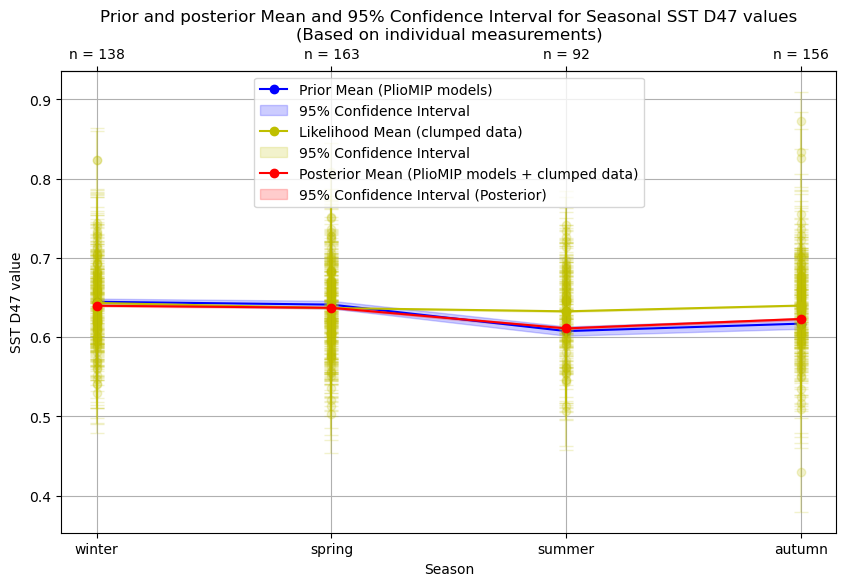

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


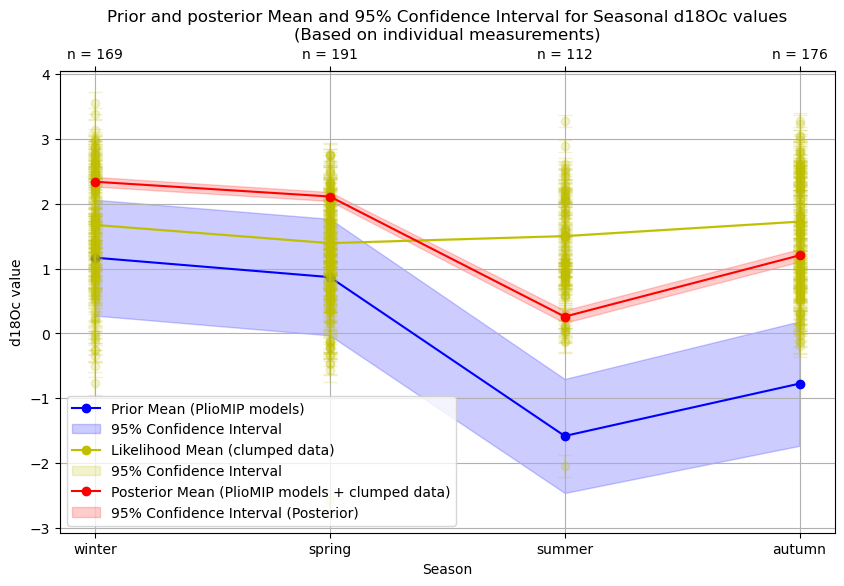

In [35]:
# --- D47 ---

# Plot the updated seasonal posterior for SST_D47
std_post_SST_D47_seasonal_aggregated = np.sqrt(np.diag(cov_post_SST_D47_seasonal_aggregated))
std_prior_SST_D47_seasonal_original = np.sqrt(np.diag(cov_prior_SST_D47_seasonal_original))
var_start_D47_seasonal = var_names.index("D47_corrETF_strict") * num_bins_seasonal # Determine the start index for the D47 variable
var_end_D47_seasonal = var_start_D47_seasonal + num_bins_seasonal # Determine the end index for the D47 variable
n_update_seasonal_aggregated_D47 = n_update_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal]  # Extract the number of updates for D47

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(seasons_scale, mu_prior_SST_D47_seasonal_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    seasons_scale,
    mu_prior_SST_D47_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_original / np.sqrt(n_models_seasonal),
    mu_prior_SST_D47_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_original / np.sqrt(n_models_seasonal),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
plt.plot(seasons_scale, mu_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    seasons_scale,
    mu_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal] - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47) * std_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal] / np.sqrt(n_update_seasonal_aggregated_D47),
    mu_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal] + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47) * std_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal] / np.sqrt(n_update_seasonal_aggregated_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["season_score"]) + 1, measurement["D47_corrETF_strict"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["season_score"]) + 1, measurement["D47_corrETF_strict"], yerr=measurement["D47_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(seasons_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_seasonal_aggregated_D47])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(seasons_scale, mu_post_SST_D47_seasonal_aggregated, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    seasons_scale,
    mu_post_SST_D47_seasonal_aggregated - stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal_aggregated / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SST_D47_seasonal_aggregated + stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal_aggregated / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(seasons_scale, seasons)
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal SST D47 values\n(Based on individual measurements)')
plt.xlabel('Season')
plt.ylabel('SST D47 value')
plt.legend()
plt.grid(True)
plt.show()

# ---d18Oc---

# Plot the updated seasonal posterior for d18Oc
std_post_d18Oc_seasonal_aggregated = np.sqrt(np.diag(cov_post_d18Oc_seasonal_aggregated))
std_prior_d18Oc_seasonal_original = np.sqrt(np.diag(cov_prior_d18Oc_seasonal_original))
var_start_d18Oc_seasonal = var_names.index("Final_d18O") * num_bins_seasonal # Determine the start index for the d18Oc variable
var_end_d18Oc_seasonal = var_start_d18Oc_seasonal + num_bins_seasonal # Determine the end index for the d18Oc variable
n_update_seasonal_aggregated_d18Oc = n_update_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal]  # Extract the number of updates for d18Oc

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(seasons_scale, mu_prior_d18Oc_seasonal_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    seasons_scale,
    mu_prior_d18Oc_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_d18Oc_seasonal_original / np.sqrt(n_models_seasonal),
    mu_prior_d18Oc_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_d18Oc_seasonal_original / np.sqrt(n_models_seasonal),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable
plt.plot(seasons_scale, mu_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    seasons_scale,
    mu_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_d18Oc) * std_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] / np.sqrt(n_update_seasonal_aggregated_d18Oc),
    mu_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_d18Oc) * std_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] / np.sqrt(n_update_seasonal_aggregated_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["season_score"]) + 1, measurement["Final_d18O"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["season_score"]) + 1, measurement["Final_d18O"], yerr=measurement["d18O_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(seasons_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_seasonal_aggregated_d18Oc])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(seasons_scale, mu_post_d18Oc_seasonal_aggregated, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    seasons_scale,
    mu_post_d18Oc_seasonal_aggregated - stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_d18Oc + n_models_seasonal)) * std_post_d18Oc_seasonal_aggregated / np.sqrt(n_update_seasonal_aggregated_d18Oc + n_models_seasonal),
    mu_post_d18Oc_seasonal_aggregated + stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_d18Oc + n_models_seasonal)) * std_post_d18Oc_seasonal_aggregated / np.sqrt(n_update_seasonal_aggregated_d18Oc + n_models_seasonal),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(seasons_scale, seasons)
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal d18Oc values\n(Based on individual measurements)')
plt.xlabel('Season')
plt.ylabel('d18Oc value')
plt.legend()
plt.grid(True)
plt.show()

# EXECUTE UPDATING FUNCTIONS - MONTHLY

## Update monthly prior with data (preaggregated data per month)
* Data and model outcomes assembled per month
* Ignore sclero-dating uncertainty
* D47 data aggregated in monthly bins prior to assembly

In [36]:
# Update the seasonal prior with all measurements assigned to the seasons according to the ShellChron_DOY_rotated field
monthly_aggregated_data = {} # Keep track of datapoints per season
n_update_monthly_aggregated = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_monthly_aggregated = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_monthly_aggregated = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood_monthly_aggregated = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood_monthly_aggregated = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47_corrETF_strict", "Final_d18O"] # List of variable names which are updated
var_SD_names = ["D47_sd_ext", "d18O_sd_ext"] # List of names of variable uncertainties which are updated

# Update the prior with seasonal data using the Kalman filter in block updating form
mu_post_monthly_aggregated, cov_post_monthly_aggregated = kalman_update_block(
    mu_prior_monthly_combined,
    cov_prior_monthly_combined,
    Z_monthly_aggregated,
    R_monthly_aggregated,
    H_monthly_aggregated
)

# Extract the updated mean values from the combined state vector
mu_post_SST_D47_monthly_aggregated = mu_post_monthly_aggregated[:len(mu_prior_SST_D47_monthly)]
mu_post_SAT_D47_monthly_aggregated = mu_post_monthly_aggregated[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
mu_post_d18Oc_monthly_aggregated = mu_post_monthly_aggregated[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
mu_post_precip_monthly_aggregated = mu_post_monthly_aggregated[3*len(mu_prior_d18Oc_monthly):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_SST_D47_monthly_aggregated = cov_post_monthly_aggregated[:len(mu_prior_SST_D47_monthly), :len(mu_prior_SST_D47_monthly)]
cov_post_SAT_D47_monthly_aggregated = cov_post_monthly_aggregated[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly), len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
cov_post_d18Oc_monthly_aggregated = cov_post_monthly_aggregated[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly), 2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
cov_post_precip_monthly_aggregated = cov_post_monthly_aggregated[3*len(mu_prior_d18Oc_monthly):, 3*len(mu_prior_d18Oc_monthly):]

for measurement in PWP_data_dict: # Loop over measurements
    # Track and update likelihood statistics
    weighted_sum_monthly_aggregated, effective_weights_total_monthly_aggregated, n_update_monthly_aggregated, monthly_aggregated_data = likelihood_statistics_multi(
        weighted_sum_monthly_aggregated,
        effective_weights_total_monthly_aggregated,
        n_update_monthly_aggregated,
        monthly_aggregated_data,
        measurement,
        timestamp = "month_score2",
        timestamp_sd = "ShellChron_no_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_monthly_aggregated to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_monthly_aggregated to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins_monthly = int(len(weighted_sum_monthly_aggregated) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins_monthly):
        idx = var_idx * num_bins_monthly + bin_idx
        if effective_weights_total_monthly_aggregated[idx] is not None and effective_weights_total_monthly_aggregated[idx] != 0:
            mu_likelihood_monthly_aggregated[idx] = weighted_sum_monthly_aggregated[idx] / effective_weights_total_monthly_aggregated[idx]
            std_likelihood_monthly_aggregated[idx] = np.sqrt(1 / effective_weights_total_monthly_aggregated[idx])
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood_monthly_aggregated[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood_monthly_aggregated[idx]}")
        print(f"    Number of Data Points: {n_update_monthly_aggregated[idx]}")
    print()

print("Original Prior Mean SST-D47 Seasonal:\n", mu_prior_SST_D47_monthly_original)
print("Original Prior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SST_D47_monthly_original)))
print("Updated Posterior Mean SST-D47 Seasonal:\n", mu_post_SST_D47_monthly_aggregated)
print("Updated Posterior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated)))
print("Original Prior Mean SAT-D47 Seasonal:\n", mu_prior_SAT_D47_monthly_original)
print("Original Prior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SAT_D47_monthly_original)))
print("Updated Posterior Mean SAT-D47 Seasonal:\n", mu_post_SAT_D47_monthly_aggregated)
print("Updated Posterior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated)))
print("Original Prior Mean d18Oc Seasonal:\n", mu_prior_d18Oc_monthly_original)
print("Original Prior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_prior_d18Oc_monthly_original)))
print("Updated Posterior Mean d18Oc Seasonal:\n", mu_post_d18Oc_monthly_aggregated)
print("Updated Posterior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_post_d18Oc_monthly_aggregated)))
print("Original Prior Mean precipitation Seasonal:\n", mu_prior_precip_monthly_original)
print("Original Prior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_prior_precip_monthly_original)))
print("Updated Posterior Mean precipitation Seasonal:\n", mu_post_precip_monthly_aggregated)
print("Updated Posterior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_post_precip_monthly_aggregated)))

Likelihood statistics:
Results for variable: D47_corrETF_strict
  Bin 1:
    Weighted Average: 0.6286965046662804
    Aggregated Uncertainty: 0.006172172468534013
    Number of Data Points: 41.0
  Bin 2:
    Weighted Average: 0.6619659675289109
    Aggregated Uncertainty: 0.005702205186276009
    Number of Data Points: 50.0
  Bin 3:
    Weighted Average: 0.6359313809752828
    Aggregated Uncertainty: 0.005962213370555013
    Number of Data Points: 47.0
  Bin 4:
    Weighted Average: 0.635874055245299
    Aggregated Uncertainty: 0.004533472087358248
    Number of Data Points: 77.0
  Bin 5:
    Weighted Average: 0.6385765019088617
    Aggregated Uncertainty: 0.005970373422008295
    Number of Data Points: 46.0
  Bin 6:
    Weighted Average: 0.6361053169591214
    Aggregated Uncertainty: 0.006784491839417968
    Number of Data Points: 40.0
  Bin 7:
    Weighted Average: 0.6405577455241105
    Aggregated Uncertainty: 0.005527388083791424
    Number of Data Points: 51.0
  Bin 8:
    Weighte

### Plot monthly posterior without sclero-dating uncertainty in D47 domain

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


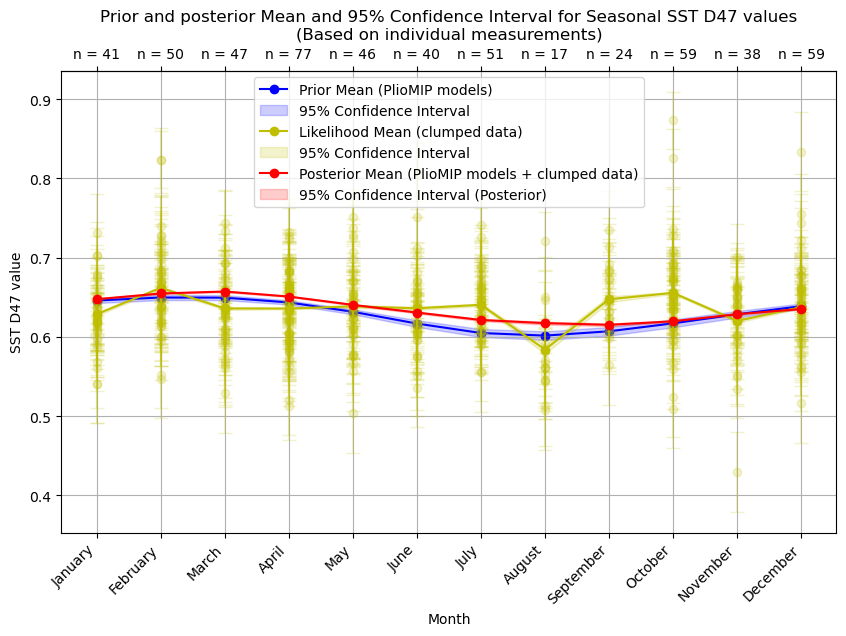

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


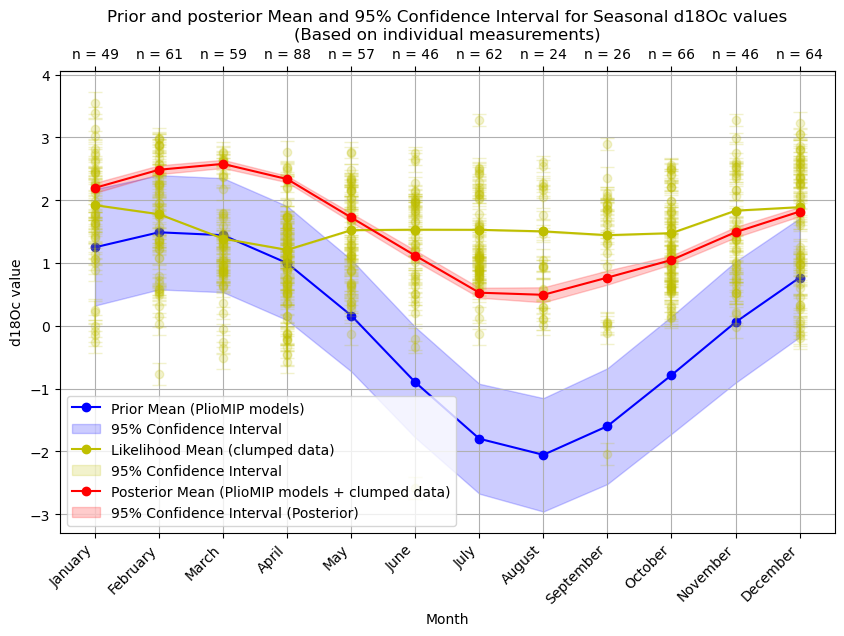

In [37]:
# --- D47 ---

# Plot the updated seasonal posterior for SST_D47
std_post_SST_D47_monthly_aggregated = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated))
std_prior_SST_D47_monthly_original = np.sqrt(np.diag(cov_prior_SST_D47_monthly_original))
var_start_D47_monthly = var_names.index("D47_corrETF_strict") * num_bins_monthly # Determine the start index for the D47 variable
var_end_D47_monthly = var_start_D47_monthly + num_bins_monthly # Determine the end index for the D47 variable
n_update_monthly_aggregated_D47 = n_update_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly]  # Extract the number of updates for D47

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_SST_D47_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_SST_D47_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_SST_D47_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
plt.plot(months_scale, mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47) * std_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_D47),
    mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47) * std_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["month_score2"]) + 1, measurement["D47_corrETF_strict"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score2"]) + 1, measurement["D47_corrETF_strict"], yerr=measurement["D47_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_aggregated_D47])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_SST_D47_monthly_aggregated, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_aggregated + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal SST D47 values\n(Based on individual measurements)')
plt.xlabel('Month')
plt.ylabel('SST D47 value')
plt.legend()
plt.grid(True)
plt.show()

# ---d18Oc---

# Plot the updated seasonal posterior for d18Oc
std_post_d18Oc_monthly_aggregated = np.sqrt(np.diag(cov_post_d18Oc_monthly_aggregated))
std_prior_d18Oc_monthly_original = np.sqrt(np.diag(cov_prior_d18Oc_monthly_original))
var_start_d18Oc_monthly = var_names.index("Final_d18O") * num_bins_monthly # Determine the start index for the d18Oc variable
var_end_d18Oc_monthly = var_start_d18Oc_monthly + num_bins_monthly # Determine the end index for the d18Oc variable
n_update_monthly_aggregated_d18Oc = n_update_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly]  # Extract the number of updates for d18Oc

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_d18Oc_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_d18Oc_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_d18Oc_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable
plt.plot(months_scale, mu_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_d18Oc) * std_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_aggregated_d18Oc),
    mu_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_d18Oc) * std_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_aggregated_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["month_score2"]) + 1, measurement["Final_d18O"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score2"]) + 1, measurement["Final_d18O"], yerr=measurement["d18O_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_aggregated_d18Oc])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_d18Oc_monthly_aggregated, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_d18Oc_monthly_aggregated - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated / np.sqrt(n_update_monthly_aggregated_d18Oc + n_models_monthly),
    mu_post_d18Oc_monthly_aggregated + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated / np.sqrt(n_update_monthly_aggregated_d18Oc + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal d18Oc values\n(Based on individual measurements)')
plt.xlabel('Month')
plt.ylabel('d18Oc value')
plt.legend()
plt.grid(True)
plt.show()

# PLOT PRIOR AND LIKELIHOOD FOR MANUSCRIPT

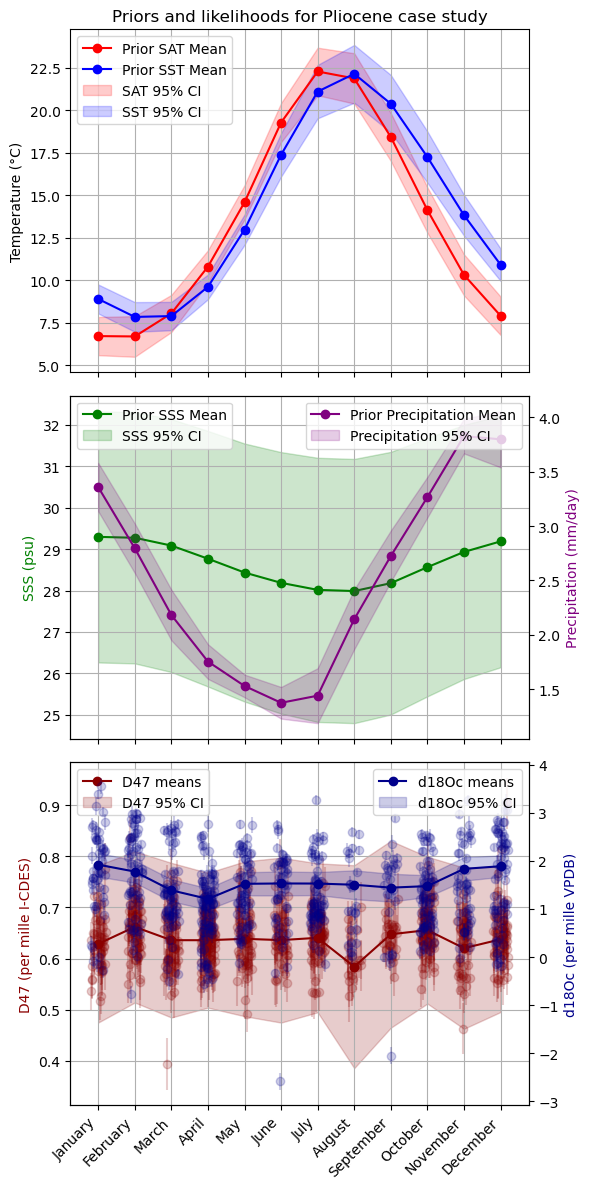

In [38]:
# Set dimensions of data
n_models_monthly = len(PlioMIP["modelname"])  # Find the total number of models

# Create list of month names
months = ['ja', 'fb', 'mr', 'ar', 'my', 'jn', 'jl', 'ag', 'sp', 'ot', 'nv', 'dc']

# Create a monthly scale for the x-axis
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']  # List full month names
months_scale = np.arange(len(months)) + 1  # Create monthly scale

# Create the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(6, 12), sharex=True)

# Panel 1: Plot the prior distribution for SST and SAT
axes[0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o', color='r')
axes[0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o', color='b')

# Add 95% confidence intervals for SAT
axes[0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    mu_prior_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='r', label='SAT 95% CI'
)

# Add 95% confidence intervals for SST
axes[0].fill_between(
    months_scale,
    mu_prior_SST_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    mu_prior_SST_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='b', label='SST 95% CI'
)

# axes[0].set_title('Prior Mean and 95% Confidence Interval for Monthly SST & SAT Values')
axes[0].set_title('Priors and likelihoods for Pliocene case study')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()
axes[0].grid(True)

# Panel 2: Plot the prior distribution for SSS and precipitation
axes[1].plot(months_scale, mu_prior_SSS_monthly, label='Prior SSS Mean', marker='o', color='g')
ax2 = axes[1].twinx()  # Create a secondary y-axis for precipitation
ax2.plot(months_scale, mu_prior_precip_monthly, label='Prior Precipitation Mean', marker='o', color='purple')

# Add 95% confidence intervals for SSS
axes[1].fill_between(
    months_scale,
    mu_prior_SSS_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_monthly / np.sqrt(n_models_monthly),
    mu_prior_SSS_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='g', label='SSS 95% CI'
)

# Add 95% confidence intervals for precipitation
ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    mu_prior_precip_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='purple', label='Precipitation 95% CI'
)

axes[1].set_ylabel('SSS (psu)', color='g')
ax2.set_ylabel('Precipitation (mm/day)', color='purple')
# axes[1].set_title('Prior Mean and 95% Confidence Interval for Monthly SSS & Precipitation Values')
axes[1].legend(loc='upper left')
ax2.legend(loc='upper right')
axes[1].grid(True)

# Panel 3: Plot the likelihood distribution for D47 and d18Oc measurements
# Plot individual (non-aggregated) measurements with uncertainties
ax3 = axes[2].twinx()  # secondary y-axis for d18Oc

# Plot D47 likelihood
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
axes[2].plot(months_scale, mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly], marker='o', label='D47 means', color='darkred')
axes[2].fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly] - 1.96 * np.sqrt(std_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly]),
    mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly] + 1.96 * np.sqrt(std_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly]),
    color='darkred',
    alpha=0.2,
    label='D47 95% CI'
)
for measurement in PWP_data_dict:
    x_jitter = measurement["month_score"] + np.random.uniform(-0.2, 0.2)
    axes[2].plot(x_jitter, measurement["D47_final"], color="darkred", marker="o", alpha=0.2)
    axes[2].errorbar(x_jitter, measurement["D47_final"], yerr=measurement["D47_sd_ext"], color="darkred", alpha=0.2)

# Plot d18Oc likelihood
# Determine the start and end indices for the selected variable
ax3.plot(months_scale, mu_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly], marker='o', label='d18Oc means', color='darkblue')
ax3.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - 1.96 * np.sqrt(std_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly]),
    mu_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + 1.96 * np.sqrt(std_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly]),
    color='darkblue',
    alpha=0.2,
    label='d18Oc 95% CI'
)
for measurement in PWP_data_dict:
    x_jitter = measurement["month_score"] + np.random.uniform(-0.2, 0.2)
    ax3.plot(x_jitter, measurement["Final_d18O"], color="darkblue", marker="o", alpha=0.2)
    ax3.errorbar(x_jitter, measurement["Final_d18O"], yerr=measurement["d18O_sd_ext"], color="darkblue", alpha=0.2)

axes[2].set_ylabel('D47 (per mille I-CDES)', color='darkred')
ax3.set_ylabel('d18Oc (per mille VPDB)', color='darkblue')
axes[2].legend(loc='upper left')
ax3.legend(loc='upper right')
axes[2].grid(True)

# # Update the x-axis with month names
axes[0].set_xticks(months_scale)
axes[0].set_xticklabels(month_names, rotation=45, ha="right")
axes[1].set_xticklabels(month_names, rotation=45, ha="right")
axes[2].set_xticklabels(month_names, rotation=45, ha="right")

# Set tight layout
plt.tight_layout()

# POSTERIOR - SEASONAL

## Seasonal posterior in temperature and salinity domains with aggregated data
* Assemble data and model outcomes in 4 seasonal bins
* Ignore sclero-dating uncertainty
* Aggregate each D47 datapoint into a seasonal bin prior to assembly

### Convert seasonal prior, likelihood and posterior to temperature and salinity and plot

To calculate the covariance matrices for d18Ow based on covariance between d18Oc values for the equations of Grossman and Ku and Lecuyer et al. the following approach is followed:
* Original formula: T = B - A * (d18Oc - d18Ow) (+ 0.27 for Grossman and Ku, but this term is irrelavant for covariance; A and B different per calibration equation)
First solve for d18Ow:
* d18Ow (in VSMOW) = d18Oc - (B - T) / A (+ 0.27)
* Partial derivative 1: d(d18Ow)/d(d18Oc) = 1
* Partial derivative 2: d(d18Ow)/d(T) = 1 / A
* cov(d18Ow) = d(d18Ow)/d(d18Oc) ^ 2 * cov(d18Oc) + d(d18Ow)/d(d18Oc) * d(d18Ow)/d(T) * crosscov(d18Oc, T) * transpose(crosscov(d18Oc, T)) + d(d18Ow)/d(T) ^ 2 * cov(T)

In [39]:
# Function to propagate covariance on d18Ow in case of linear d18Oc-d18Ow-T equation
def propagate_cov_d18Ow_linear(cov_c, cov_T, cov_cT, A):
    """
    Propagate covariance for:
        w = c - (B - T)/A (+ 0.27)
    where A and B are scalars and the term 0.27 is used to convert between SMOW and VSMOW, but only A is relevant for covariance

    Inputs:
        cov_c  : (n,n) covariance matrix of d18Oc
        cov_T  : (n,n) covariance matrix of T
        cov_cT : (n,n) cross-covariance matrix Cov(c,T)
        A      : scalar (slope)

    Returns:
        cov_w : (n,n) covariance matrix of d18Ow
    """

    dwdc = 1.0
    dwdT = 1.0 / A

    cov_w = (
        dwdc**2 * cov_c
        + dwdc * dwdT * (cov_cT + cov_cT.T)
        + dwdT**2 * cov_T
    )

    return cov_w

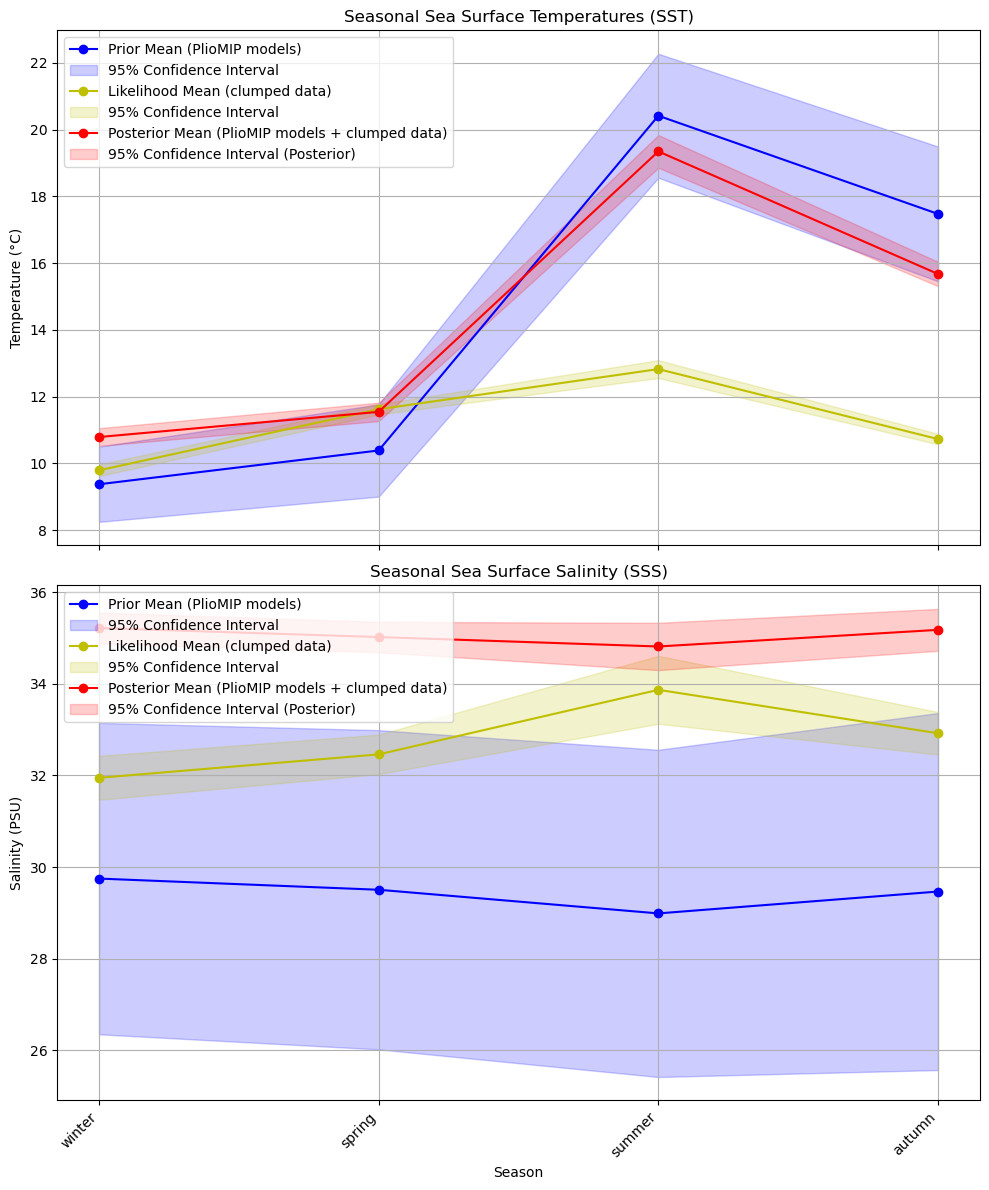

In [40]:
# Convert prior D47 to temp
mu_prior_SST_D47_seasonal_T = D47c.OGLS23.T47(D47 = mu_prior_SST_D47_seasonal_original, sD47 = cov_prior_SST_D47_seasonal_original, return_covar = True)[0]
cov_prior_SST_D47_seasonal_T = D47c.OGLS23.T47(D47 = mu_prior_SST_D47_seasonal_original, sD47 = cov_prior_SST_D47_seasonal_original, return_covar = True)[1]

# Convert prior d18Oc and temperature to d18Ow
mu_prior_d18Ow_seasonal_T = mu_prior_d18Oc_seasonal_original - (20.6 - mu_prior_SST_D47_seasonal_T) / 4.34 + 0.27
# Calculate cross-covariance between d18Oc and temperature (currently assumed zero)
cross_cov_prior_d18Oc_T_seasonal = np.cov(PlioMIP_seasonal[SST_D47_columns_seasonal + d18Oc_columns_seasonal].dropna(), rowvar=False)[:len(d18Oc_columns_seasonal), len(d18Oc_columns_seasonal):]
cov_prior_d18Ow_seasonal_T = propagate_cov_d18Ow_linear(
    cov_prior_d18Oc_seasonal_original,
    cov_prior_SST_D47_seasonal_T,
    cross_cov_prior_d18Oc_T_seasonal,
    4.34
)

# Convert prior d18Ow to SSS
mu_prior_SSS_d18Ow_seasonal_T = (mu_prior_d18Ow_seasonal_T + 9.300) / 0.274
cov_prior_SSS_d18Ow_seasonal_T = cov_prior_d18Ow_seasonal_T / (0.274 ** 2)

# Convert likelihood D47 to temp
mu_likelihood_seasonal_aggregated_T = D47c.OGLS23.T47(D47 = mu_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal], sD47 = std_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal], return_covar = True)[0]
cov_likelihood_seasonal_aggregated_T = D47c.OGLS23.T47(D47 = mu_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal], sD47 = std_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal], return_covar = True)[1]

# Convert likelihood d18Oc and temperature to d18Ow (curently not implemented in data tracking function)
mu_likelihood_d18Ow_seasonal_aggregated_T = mu_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] - (20.6 - mu_likelihood_seasonal_aggregated_T) / 4.34 + 0.27
std_likelihood_d18Ow_seasonal_aggregated_T = np.sqrt(
    np.diag(
        propagate_cov_d18Ow_linear(
            np.diag(std_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal]**2),
            cov_likelihood_seasonal_aggregated_T,
            cross_cov_prior_d18Oc_T_seasonal,
            4.34
        )
    )
)

# Convert likelihood d18Ow to SSS (currently not implemented in data tracking function)
mu_likelihood_SSS_d18Ow_seasonal_aggregated_T = (mu_likelihood_d18Ow_seasonal_aggregated_T + 9.300) / 0.274
std_likelihood_SSS_d18Ow_seasonal_aggregated_T = std_likelihood_d18Ow_seasonal_aggregated_T / (0.274 ** 2)

# Convert posterior D47 to temp
mu_post_SST_D47_seasonal_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_seasonal_aggregated, sD47 = cov_post_SST_D47_seasonal_aggregated, return_covar = True)[0]
cov_post_SST_D47_seasonal_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_seasonal_aggregated, sD47 = cov_post_SST_D47_seasonal_aggregated, return_covar = True)[1]

# Convert posterior d18Oc and temperature to d18Ow
mu_post_d18Ow_seasonal_aggregated_T = mu_post_d18Oc_seasonal_aggregated - (20.6 - mu_post_SST_D47_seasonal_aggregated_T) / 4.34 + 0.27
cov_post_d18Ow_seasonal_aggregated_T = propagate_cov_d18Ow_linear(
    cov_post_d18Oc_seasonal_aggregated,
    cov_post_SST_D47_seasonal_aggregated_T,
    cross_cov_prior_d18Oc_T_seasonal,
    4.34
)

# Convert posterior d18Ow to SSS
mu_post_SSS_d18Ow_seasonal_aggregated_T = (mu_post_d18Ow_seasonal_aggregated_T + 9.300) / 0.274
cov_post_SSS_d18Ow_seasonal_aggregated_T = cov_post_d18Ow_seasonal_aggregated_T / (0.274 ** 2)

# Plot in temperature domain
std_prior_SST_D47_seasonal_T = np.sqrt(np.diag(cov_prior_SST_D47_seasonal_T))
std_prior_SSS_d18Ow_seasonal_T = np.sqrt(np.diag(cov_prior_SSS_d18Ow_seasonal_T))
std_likelihood_seasonal_aggregated_T = np.sqrt(np.diag(cov_likelihood_seasonal_aggregated_T))
std_post_SST_D47_seasonal_aggregated_T = np.sqrt(np.diag(cov_post_SST_D47_seasonal_aggregated_T))
std_post_SSS_d18Ow_seasonal_aggregated_T = np.sqrt(np.diag(cov_post_SSS_d18Ow_seasonal_aggregated_T))
# Initiate plot
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# FIRST PANEL: SST Results
# PRIOR
axs[0].plot(seasons_scale, mu_prior_SST_D47_seasonal_T, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[0].fill_between(seasons_scale,
    mu_prior_SST_D47_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_T / np.sqrt(n_models_seasonal),
    mu_prior_SST_D47_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_T / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[0].plot(seasons_scale, mu_likelihood_seasonal_aggregated_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[0].fill_between(seasons_scale,
    mu_likelihood_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47) * std_likelihood_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47),
    mu_likelihood_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47) * std_likelihood_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[0].plot(seasons_scale, mu_post_SST_D47_seasonal_aggregated_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[0].fill_between(seasons_scale,
    mu_post_SST_D47_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SST_D47_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SST panel
axs[0].set_title('Seasonal Sea Surface Temperatures (SST)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# SECOND PANEL: SSS Results
# PRIOR
axs[1].plot(seasons_scale, mu_prior_SSS_d18Ow_seasonal_T, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[1].fill_between(seasons_scale,
    mu_prior_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    mu_prior_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[1].plot(seasons_scale, mu_likelihood_SSS_d18Ow_seasonal_aggregated_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[1].fill_between(seasons_scale,
    mu_likelihood_SSS_d18Ow_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_d18Oc) * std_likelihood_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_d18Oc),
    mu_likelihood_SSS_d18Ow_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_d18Oc) * std_likelihood_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_d18Oc),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[1].plot(seasons_scale, mu_post_SSS_d18Ow_seasonal_aggregated_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[1].fill_between(seasons_scale,
    mu_post_SSS_d18Ow_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_d18Oc + n_models_seasonal)) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_d18Oc + n_models_seasonal),
    mu_post_SSS_d18Ow_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_d18Oc + n_models_seasonal)) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_d18Oc + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SSS panel
axs[1].set_title('Seasonal Sea Surface Salinity (SSS)')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Salinity (PSU)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

# Shared x-axis labels
plt.xticks(seasons_scale, seasons, rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Plot SAT and precipitation prior and posterior

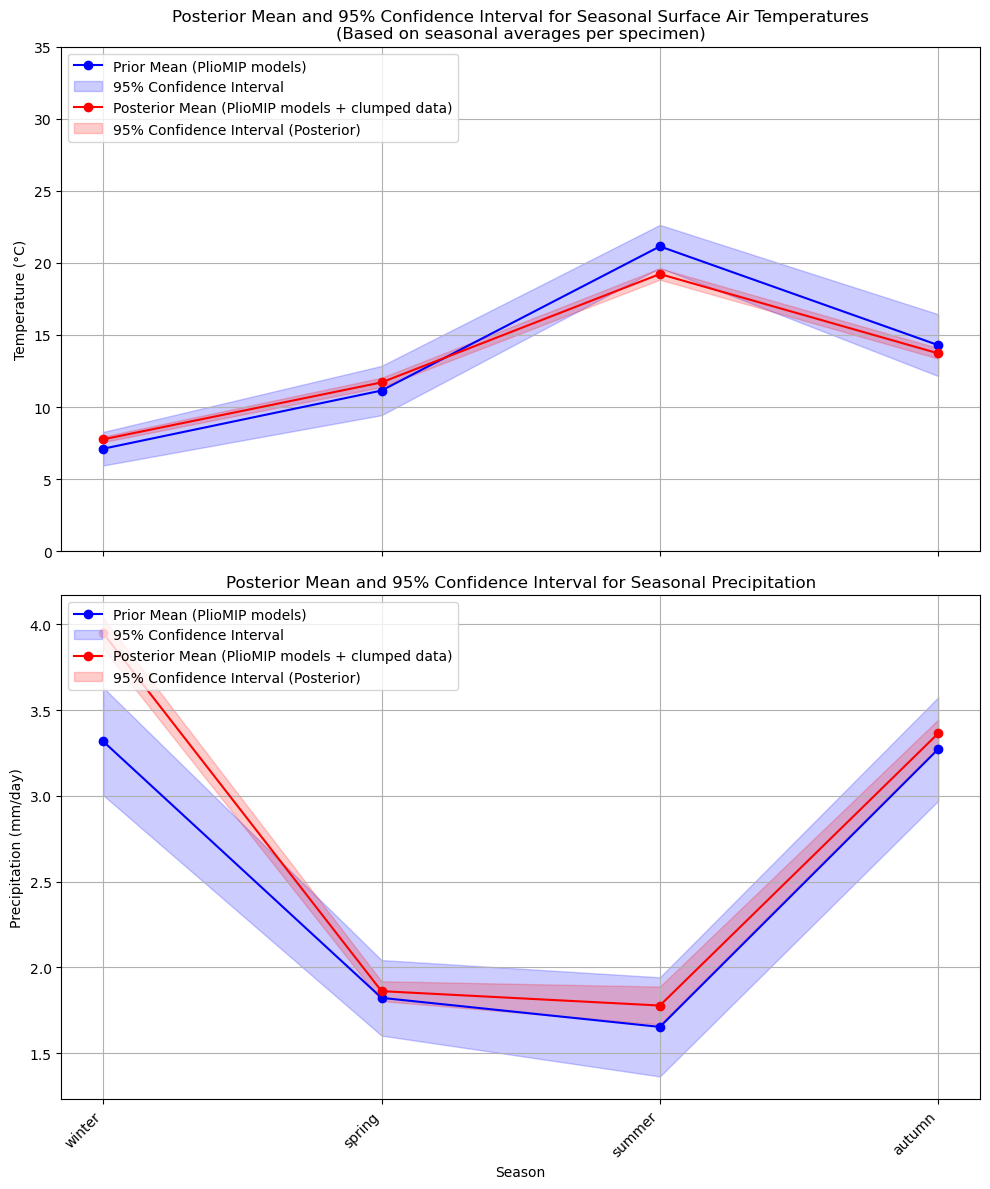

In [41]:
# Convert posterior D47 to temp
mu_post_SAT_D47_seasonal_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_seasonal_aggregated, sD47 = cov_post_SAT_D47_seasonal_aggregated, return_covar = True)[0]
cov_post_SAT_D47_seasonal_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_seasonal_aggregated, sD47 = cov_post_SAT_D47_seasonal_aggregated, return_covar = True)[1]

# Convert posterior SAT-D47 back to temperature
std_post_SAT_D47_seasonal_aggregated_T = np.nan_to_num(np.sqrt(np.diag(cov_post_SAT_D47_seasonal_aggregated_T)))

fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# --- SAT prior and posterior ---
# PRIOR
axs[0].plot(seasons_scale, mu_prior_SAT_seasonal_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[0].fill_between(
    seasons_scale,
    mu_prior_SAT_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SAT_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[0].plot(seasons_scale, mu_post_SAT_D47_seasonal_aggregated_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[0].fill_between(
    seasons_scale,
    mu_post_SAT_D47_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SAT_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SAT_D47_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SAT_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[0].set_title('Posterior Mean and 95% Confidence Interval for Seasonal Surface Air Temperatures\n(Based on seasonal averages per specimen)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_ylim(0, 35)
axs[0].legend(loc='upper left')
axs[0].grid(True)

# --- Precipitation prior and posterior ---
# PRIOR
axs[1].plot(seasons_scale, mu_prior_precip_seasonal_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[1].fill_between(
    seasons_scale,
    mu_prior_precip_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_precip_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[1].plot(seasons_scale, mu_post_precip_seasonal_aggregated, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[1].fill_between(
    seasons_scale,
    mu_post_precip_seasonal_aggregated - stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_precip_seasonal_aggregated + stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[1].set_title('Posterior Mean and 95% Confidence Interval for Seasonal Precipitation')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Precipitation (mm/day)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

plt.xticks(seasons_scale, seasons, rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior

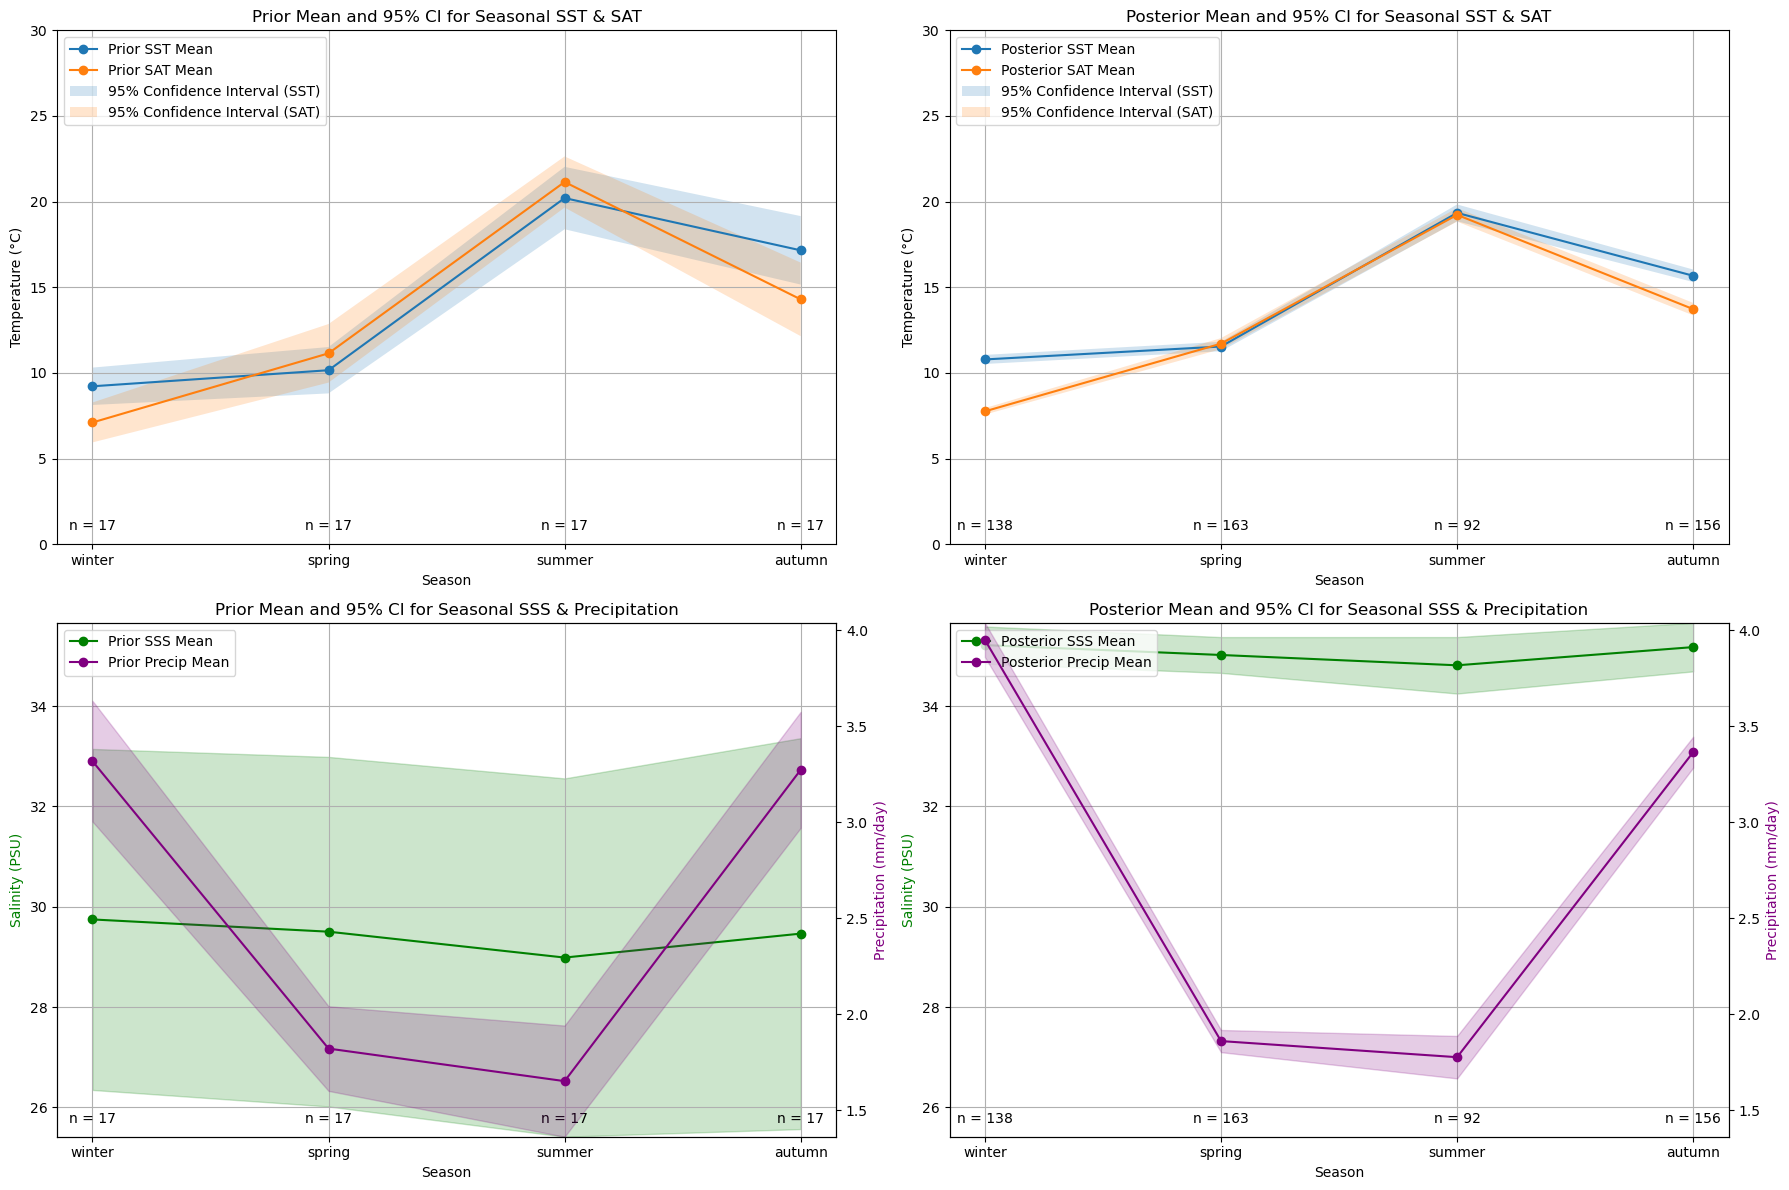

In [42]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(seasons_scale, mu_prior_SST_seasonal, label='Prior SST Mean', marker='o')
axes[0, 0].plot(seasons_scale, mu_prior_SAT_seasonal, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    seasons_scale,
    mu_prior_SST_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SST_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 0].fill_between(
    seasons_scale,
    mu_prior_SAT_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SAT_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 0].set_xticks(seasons_scale)
axes[0, 0].set_xticklabels(seasons)
axes[0, 0].set_title('Prior Mean and 95% CI for Seasonal SST & SAT')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(seasons_scale, mu_post_SST_D47_seasonal_aggregated_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(seasons_scale, mu_post_SAT_D47_seasonal_aggregated_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    seasons_scale,
    mu_post_SST_D47_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SST_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SST_D47_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SST_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 1].fill_between(
    seasons_scale,
    mu_post_SAT_D47_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SAT_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SAT_D47_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SAT_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 1].set_xticks(seasons_scale)
axes[0, 1].set_xticklabels(seasons)
axes[0, 1].set_title('Posterior Mean and 95% CI for Seasonal SST & SAT')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal)),
              np.min(mu_post_SSS_d18Ow_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal)))
sss_max = max(np.max(mu_prior_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal)),
              np.max(mu_post_SSS_d18Ow_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal)))
precip_min = min(np.min(mu_prior_precip_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal)),
                 np.min(mu_post_precip_seasonal_aggregated - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal)))
precip_max = max(np.max(mu_prior_precip_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal)),
                 np.max(mu_post_precip_seasonal_aggregated + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal)))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(seasons_scale, mu_prior_SSS_d18Ow_seasonal_T, label='Prior SSS Mean', marker='o', color="green")
ax1.fill_between(
    seasons_scale,
    mu_prior_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    mu_prior_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(seasons_scale, mu_prior_precip_seasonal_original, label='Prior Precip Mean', marker='o', color="purple")
ax2.fill_between(
    seasons_scale,
    mu_prior_precip_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_precip_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(seasons_scale)
ax1.set_xticklabels(seasons)
ax1.set_title('Prior Mean and 95% CI for Seasonal SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + lns2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(seasons_scale, mu_post_SSS_d18Ow_seasonal_aggregated_T, label='Posterior SSS Mean', marker='o', color="green")
ax1.fill_between(
    seasons_scale,
    mu_post_SSS_d18Ow_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SSS_d18Ow_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(seasons_scale, mu_post_precip_seasonal_aggregated, label='Posterior Precip Mean', marker='o', color="purple")
ax2.fill_between(
    seasons_scale,
    mu_post_precip_seasonal_aggregated - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_precip_seasonal_aggregated + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(seasons_scale)
ax1.set_xticklabels(seasons)
ax1.set_title('Posterior Mean and 95% CI for Seasonal SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + lns2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# Add "n = x" labels below each x-tick for each subplot to show the number of model values or updates
# Prior SST & SAT
for i, season in enumerate(seasons):
    axes[0, 0].text(
        seasons_scale[i], axes[0, 0].get_ylim()[0] + 1.5, # adjust location as needed
        f"n = {n_models_seasonal[i] if hasattr(n_models_seasonal, '__getitem__') else n_models_seasonal}",
        ha='center', va='top', fontsize=10
    )

# Posterior SST & SAT
for i, season in enumerate(seasons):
    axes[0, 1].text(
        seasons_scale[i], axes[0, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_seasonal_aggregated_D47[i]) if hasattr(n_update_seasonal_aggregated_D47, '__getitem__') else n_update_seasonal_aggregated_D47}",
        ha='center', va='top', fontsize=10
    )

# Prior SSS & Precipitation
for i, season in enumerate(seasons):
    axes[1, 0].text(
        seasons_scale[i], axes[1, 0].get_ylim()[0] + 0.5,
        f"n = {n_models_seasonal[i] if hasattr(n_models_seasonal, '__getitem__') else n_models_seasonal}",
        ha='center', va='top', fontsize=10
    )

# Posterior SSS & Precipitation
for i, season in enumerate(seasons):
    axes[1, 1].text(
        seasons_scale[i], axes[1, 1].get_ylim()[0] + 0.5,
        f"n = {int(n_update_seasonal_aggregated_D47[i]) if hasattr(n_update_seasonal_aggregated_D47, '__getitem__') else n_update_seasonal_aggregated_D47}",
        ha='center', va='top', fontsize=10
    )

plt.tight_layout()
plt.show()


### Plot SAT, SST, SSS and precipitation posterior with uncertainties as 2 SD

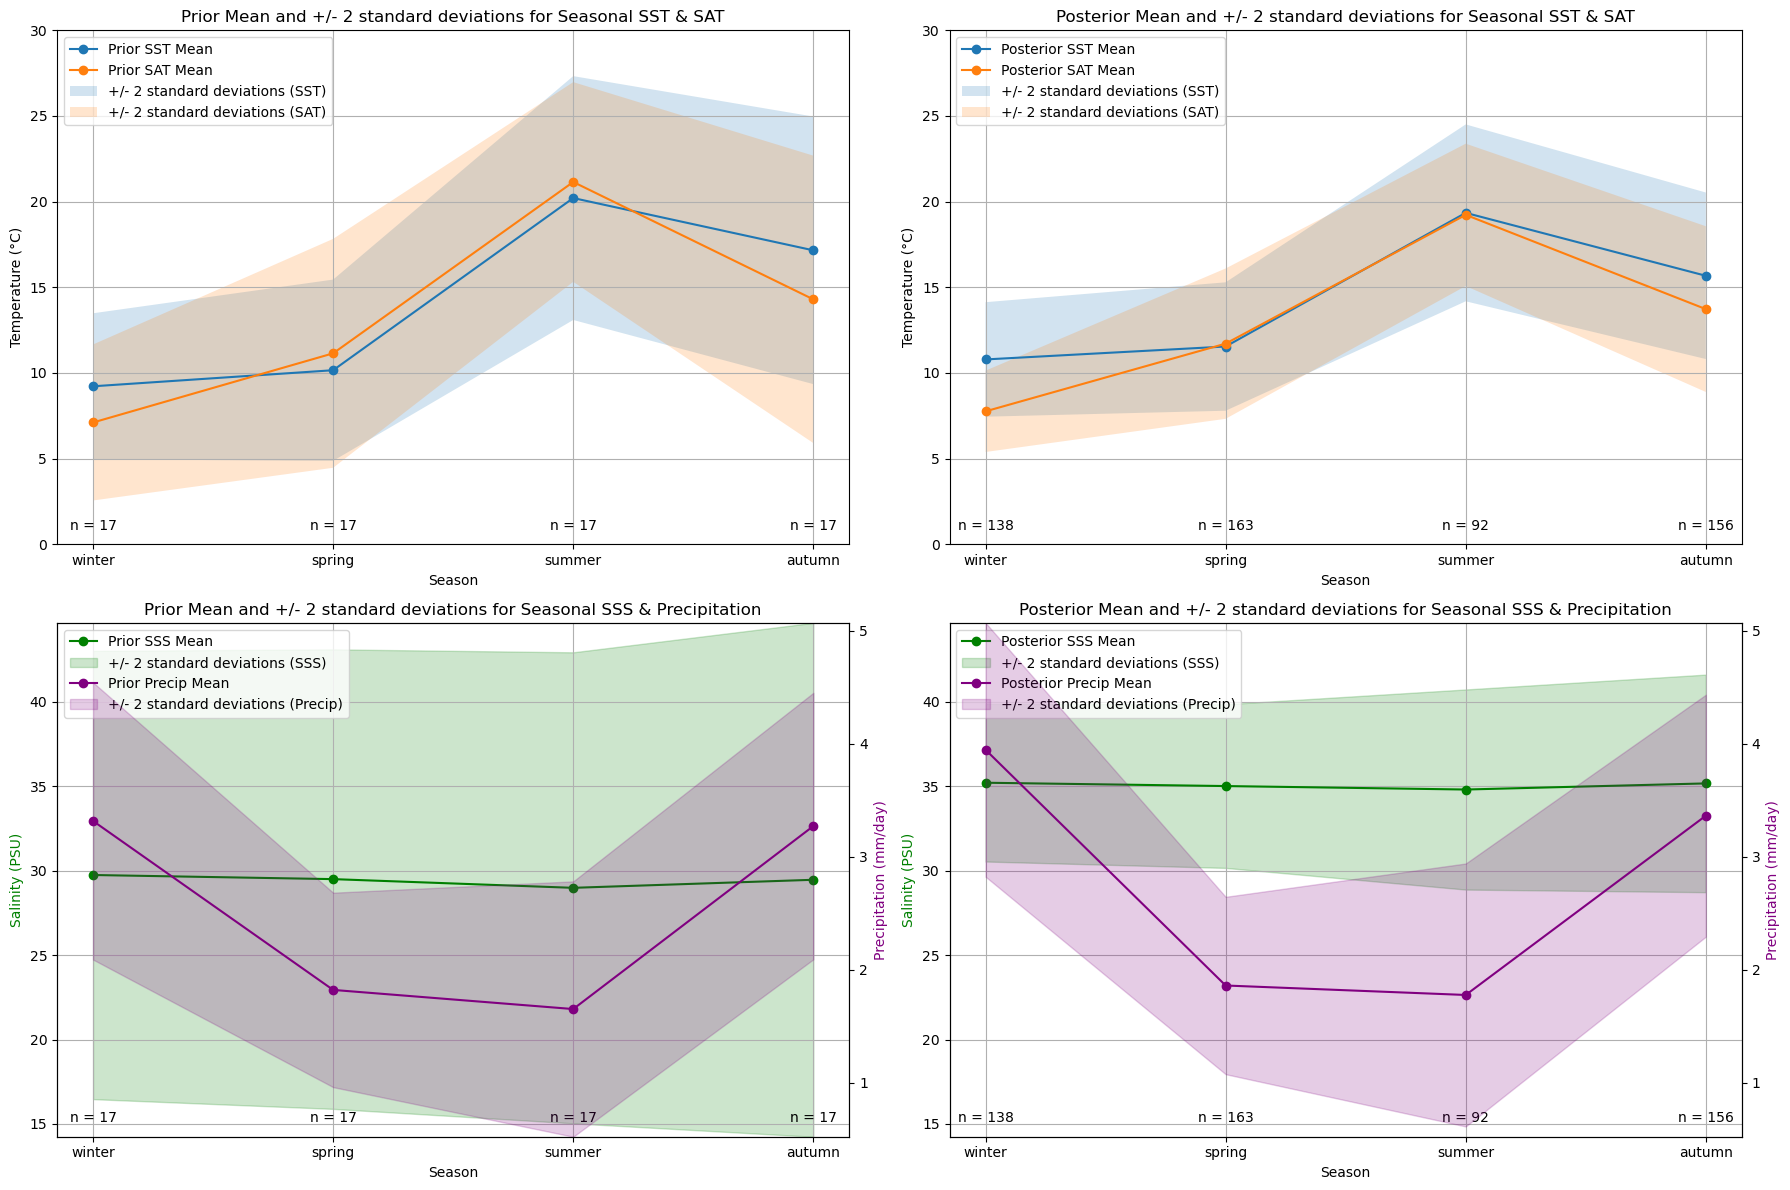

In [43]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(seasons_scale, mu_prior_SST_seasonal, label='Prior SST Mean', marker='o')
axes[0, 0].plot(seasons_scale, mu_prior_SAT_seasonal, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    seasons_scale,
    mu_prior_SST_seasonal - 2 * std_prior_SST_seasonal,
    mu_prior_SST_seasonal + 2 * std_prior_SST_seasonal,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 0].fill_between(
    seasons_scale,
    mu_prior_SAT_seasonal - 2 * std_prior_SAT_seasonal,
    mu_prior_SAT_seasonal + 2 * std_prior_SAT_seasonal,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 0].set_xticks(seasons_scale)
axes[0, 0].set_xticklabels(seasons)
axes[0, 0].set_title('Prior Mean and +/- 2 standard deviations for Seasonal SST & SAT')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(seasons_scale, mu_post_SST_D47_seasonal_aggregated_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(seasons_scale, mu_post_SAT_D47_seasonal_aggregated_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    seasons_scale,
    mu_post_SST_D47_seasonal_aggregated_T - 2 * std_post_SST_D47_seasonal_aggregated_T,
    mu_post_SST_D47_seasonal_aggregated_T + 2 * std_post_SST_D47_seasonal_aggregated_T,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 1].fill_between(
    seasons_scale,
    mu_post_SAT_D47_seasonal_aggregated_T - 2 * std_post_SAT_D47_seasonal_aggregated_T,
    mu_post_SAT_D47_seasonal_aggregated_T + 2 * std_post_SAT_D47_seasonal_aggregated_T,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 1].set_xticks(seasons_scale)
axes[0, 1].set_xticklabels(seasons)
axes[0, 1].set_title('Posterior Mean and +/- 2 standard deviations for Seasonal SST & SAT')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_seasonal_T - 2 * std_prior_SSS_d18Ow_seasonal_T),
              np.min(mu_post_SSS_d18Ow_seasonal_aggregated_T - 2 * std_post_SSS_d18Ow_seasonal_aggregated_T))
sss_max = max(np.max(mu_prior_SSS_d18Ow_seasonal_T + 2 * std_prior_SSS_d18Ow_seasonal_T),
              np.max(mu_post_SSS_d18Ow_seasonal_aggregated_T + 2 * std_post_SSS_d18Ow_seasonal_aggregated_T))
precip_min = min(np.min(mu_prior_precip_seasonal_original - 2 * std_prior_precip_seasonal),
                 np.min(mu_post_precip_seasonal_aggregated - 2 * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated))))
precip_max = max(np.max(mu_prior_precip_seasonal_original + 2 * std_prior_precip_seasonal),
                 np.max(mu_post_precip_seasonal_aggregated + 2 * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated))))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(seasons_scale, mu_prior_SSS_d18Ow_seasonal_T, label='Prior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    seasons_scale,
    mu_prior_SSS_d18Ow_seasonal_T - 2 * std_prior_SSS_d18Ow_seasonal_T,
    mu_prior_SSS_d18Ow_seasonal_T + 2 * std_prior_SSS_d18Ow_seasonal_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(seasons_scale, mu_prior_precip_seasonal_original, label='Prior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    seasons_scale,
    mu_prior_precip_seasonal_original - 2 * std_prior_precip_seasonal,
    mu_prior_precip_seasonal_original + 2 * std_prior_precip_seasonal,
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(seasons_scale)
ax1.set_xticklabels(seasons)
ax1.set_title('Prior Mean and +/- 2 standard deviations for Seasonal SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(seasons_scale, mu_post_SSS_d18Ow_seasonal_aggregated_T, label='Posterior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    seasons_scale,
    mu_post_SSS_d18Ow_seasonal_aggregated_T - 2 * std_post_SSS_d18Ow_seasonal_aggregated_T,
    mu_post_SSS_d18Ow_seasonal_aggregated_T + 2 * std_post_SSS_d18Ow_seasonal_aggregated_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(seasons_scale, mu_post_precip_seasonal_aggregated, label='Posterior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    seasons_scale,
    mu_post_precip_seasonal_aggregated - 2 * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)),
    mu_post_precip_seasonal_aggregated + 2 * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)),
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(seasons_scale)
ax1.set_xticklabels(seasons)
ax1.set_title('Posterior Mean and +/- 2 standard deviations for Seasonal SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# Add "n = x" labels below each x-tick for each subplot to show the number of model values or updates
# Prior SST & SAT
for i, season in enumerate(seasons):
    axes[0, 0].text(
        seasons_scale[i], axes[0, 0].get_ylim()[0] + 1.5,  # adjust location as needed
        f"n = {n_models_seasonal[i] if hasattr(n_models_seasonal, '__getitem__') else n_models_seasonal}",
        ha='center', va='top', fontsize=10
    )

# Posterior SST & SAT
for i, season in enumerate(seasons):
    axes[0, 1].text(
        seasons_scale[i], axes[0, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_seasonal_aggregated_D47[i]) if hasattr(n_update_seasonal_aggregated_D47, '__getitem__') else n_update_seasonal_aggregated_D47}",
        ha='center', va='top', fontsize=10
    )

# Prior SSS & Precipitation
for i, season in enumerate(seasons):
    axes[1, 0].text(
        seasons_scale[i], axes[1, 0].get_ylim()[0] + 1.5,
        f"n = {n_models_seasonal[i] if hasattr(n_models_seasonal, '__getitem__') else n_models_seasonal}",
        ha='center', va='top', fontsize=10
    )

# Posterior SSS & Precipitation
for i, season in enumerate(seasons):
    axes[1, 1].text(
        seasons_scale[i], axes[1, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_seasonal_aggregated_D47[i]) if hasattr(n_update_seasonal_aggregated_D47, '__getitem__') else n_update_seasonal_aggregated_D47}",
        ha='center', va='top', fontsize=10
    )

plt.tight_layout()
plt.show()

# POSTERIOR - MONTHLY

## Monthly posterior in temperature and salinity domains with aggregated data
* Data and model outcomes assembled per month
* Ignore sclero-dating uncertainty
* D47 data aggregated in monthly bins prior to assembly

### Convert monthly prior, likelihood and posterior to temperature and salinity and plot

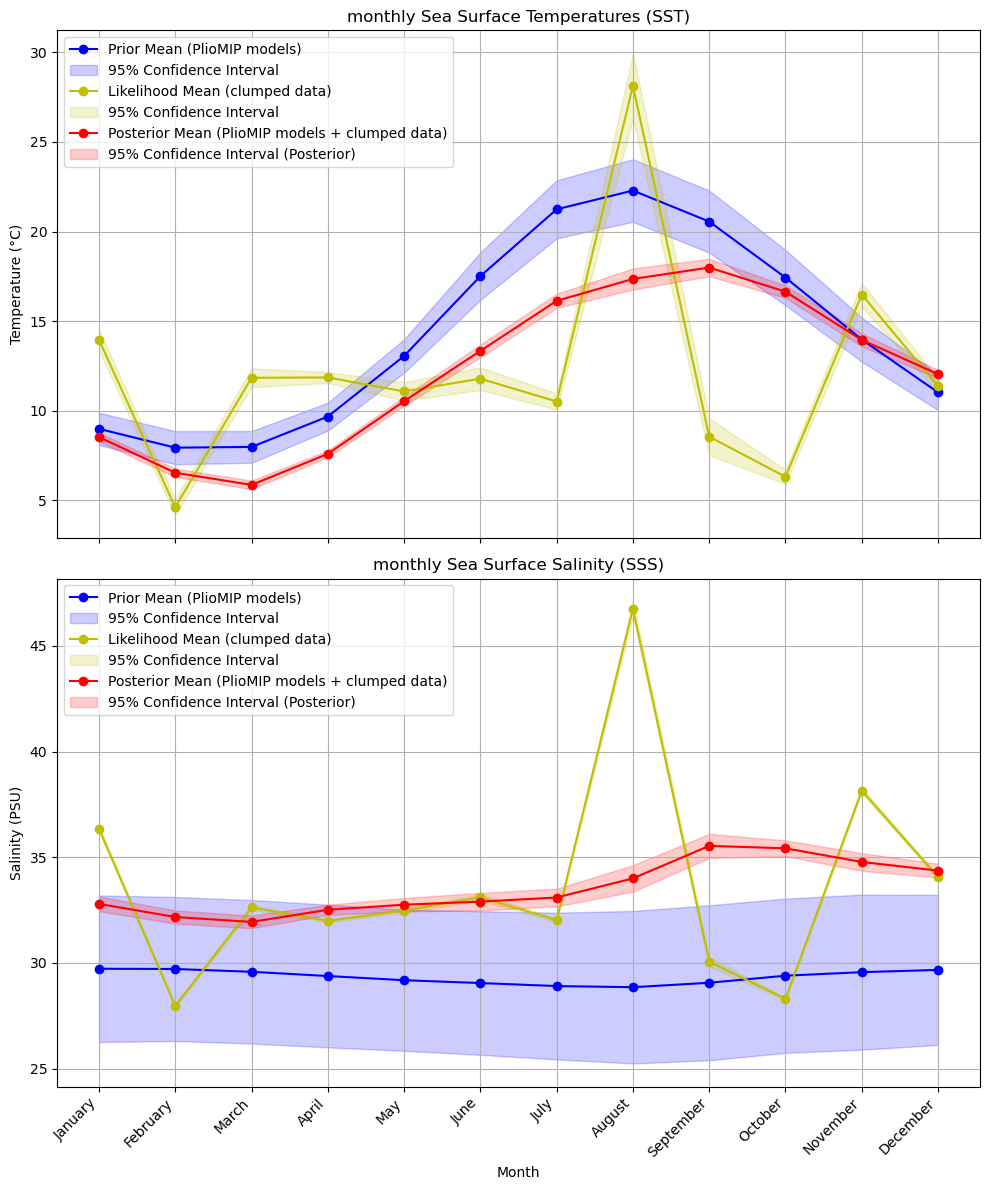

In [45]:
# Convert prior D47 to temp
mu_prior_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_prior_SST_D47_monthly_original, sD47 = cov_prior_SST_D47_monthly_original, return_covar = True)[0]
cov_prior_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_prior_SST_D47_monthly_original, sD47 = cov_prior_SST_D47_monthly_original, return_covar = True)[1]

# Convert prior d18Oc and temperature to d18Ow
mu_prior_d18Ow_monthly_T = mu_prior_d18Oc_monthly_original - (20.6 - mu_prior_SST_D47_monthly_T) / 4.34 + 0.27
# Calculate d18Oc-temperature cross covariance matrix
cross_cov_prior_d18Oc_T_monthly = np.cov(PlioMIP[SST_D47_columns_monthly + d18Oc_columns_monthly].dropna(), rowvar=False)[len(SST_D47_columns_monthly):, :len(SST_D47_columns_monthly)]
# Propagate covariance
cov_prior_d18Ow_monthly_T = propagate_cov_d18Ow_linear(
    cov_prior_d18Oc_monthly_original,
    cov_prior_SST_D47_monthly_T,
    cross_cov_prior_d18Oc_T_monthly,
    4.34
)

# Convert prior d18Ow to SSS
mu_prior_SSS_d18Ow_monthly_T = (mu_prior_d18Ow_monthly_T + 9.300) / 0.274
cov_prior_SSS_d18Ow_monthly_T = cov_prior_d18Ow_monthly_T / (0.274 ** 2)

# Convert likelihood D47 to temp
mu_likelihood_monthly_aggregated_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[0]
cov_likelihood_monthly_aggregated_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[1]

# Convert likelihood d18Oc and temperature to d18Ow (curently not implemented in data tracking function)
mu_likelihood_d18Ow_monthly_aggregated_T = mu_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - (20.6 - mu_likelihood_monthly_aggregated_T) / 4.34 + 0.27
std_likelihood_d18Ow_monthly_aggregated_T = std_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + (1 / 4.34) ** 2 * np.sqrt(np.diag(cov_likelihood_monthly_aggregated_T))

# Convert likelihood d18Ow to SSS (currently not implemented in data tracking function)
mu_likelihood_SSS_d18Ow_monthly_aggregated_T = (mu_likelihood_d18Ow_monthly_aggregated_T + 9.300) / 0.274
std_likelihood_SSS_d18Ow_monthly_aggregated_T = np.sqrt(
    np.diag(
        propagate_cov_d18Ow_linear(
            np.diag(std_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] ** 2),
            cov_likelihood_monthly_aggregated_T,
            cross_cov_prior_d18Oc_T_monthly,
            4.34
        )
    )
)

# Convert posterior D47 to temp
mu_post_SST_D47_monthly_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated, sD47 = cov_post_SST_D47_monthly_aggregated, return_covar = True)[0]
cov_post_SST_D47_monthly_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated, sD47 = cov_post_SST_D47_monthly_aggregated, return_covar = True)[1]

# Convert posterior d18Oc and temperature to d18Ow
mu_post_d18Ow_monthly_aggregated_T = mu_post_d18Oc_monthly_aggregated - (20.6 - mu_post_SST_D47_monthly_aggregated_T) / 4.34 + 0.27
cov_post_d18Ow_monthly_aggregated_T = propagate_cov_d18Ow_linear(
    cov_post_d18Oc_monthly_aggregated,
    cov_post_SST_D47_monthly_aggregated_T,
    cross_cov_prior_d18Oc_T_monthly,
    4.34
)

# Convert posterior d18Ow to SSS
mu_post_SSS_d18Ow_monthly_aggregated_T = (mu_post_d18Ow_monthly_aggregated_T + 9.300) / 0.274
cov_post_SSS_d18Ow_monthly_aggregated_T = cov_post_d18Ow_monthly_aggregated_T / (0.274 ** 2)

# Plot in temperature domain
std_prior_SST_D47_monthly_T = np.sqrt(np.diag(cov_prior_SST_D47_monthly_T))
std_prior_SSS_d18Ow_monthly_T = np.sqrt(np.diag(cov_prior_SSS_d18Ow_monthly_T))
std_likelihood_monthly_aggregated_T = np.sqrt(np.diag(cov_likelihood_monthly_aggregated_T))
std_post_SST_D47_monthly_aggregated_T = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_T))
std_post_SSS_d18Ow_monthly_aggregated_T = np.sqrt(np.diag(cov_post_SSS_d18Ow_monthly_aggregated_T))

# Initiate plot
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# FIRST PANEL: SST Results
# PRIOR
axs[0].plot(months_scale, mu_prior_SST_D47_monthly_T, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[0].fill_between(months_scale,
    mu_prior_SST_D47_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_T / np.sqrt(n_models_monthly),
    mu_prior_SST_D47_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_T / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[0].plot(months_scale, mu_likelihood_monthly_aggregated_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[0].fill_between(months_scale,
    mu_likelihood_monthly_aggregated_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47) * std_likelihood_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47),
    mu_likelihood_monthly_aggregated_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47) * std_likelihood_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[0].plot(months_scale, mu_post_SST_D47_monthly_aggregated_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[0].fill_between(months_scale,
    mu_post_SST_D47_monthly_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SST panel
axs[0].set_title('monthly Sea Surface Temperatures (SST)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# SECOND PANEL: SSS Results
# PRIOR
axs[1].plot(months_scale, mu_prior_SSS_d18Ow_monthly_T, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[1].fill_between(months_scale,
    mu_prior_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    mu_prior_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[1].plot(months_scale, mu_likelihood_SSS_d18Ow_monthly_aggregated_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[1].fill_between(months_scale,
    mu_likelihood_SSS_d18Ow_monthly_aggregated_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_d18Oc) * std_likelihood_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_d18Oc),
    mu_likelihood_SSS_d18Ow_monthly_aggregated_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_d18Oc) * std_likelihood_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_d18Oc),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[1].plot(months_scale, mu_post_SSS_d18Ow_monthly_aggregated_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[1].fill_between(months_scale,
    mu_post_SSS_d18Ow_monthly_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_d18Oc + n_models_monthly)) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_d18Oc + n_models_monthly),
    mu_post_SSS_d18Ow_monthly_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_d18Oc + n_models_monthly)) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_d18Oc + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SSS panel
axs[1].set_title('monthly Sea Surface Salinity (SSS)')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Salinity (PSU)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

# Shared x-axis labels
plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Plot SAT and precipitation prior and posterior

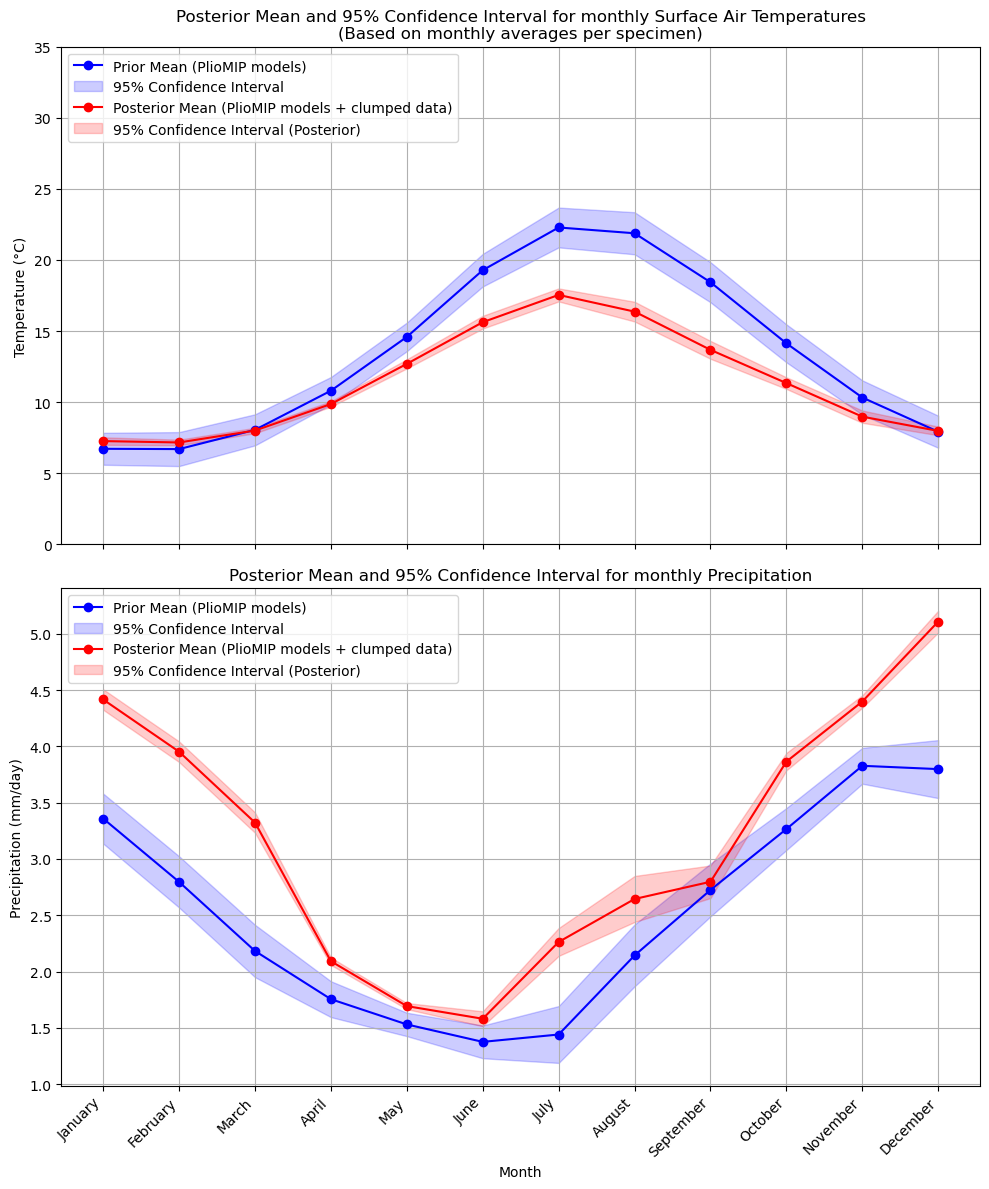

In [46]:
# Convert posterior D47 to temp
mu_post_SAT_D47_monthly_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated, sD47 = cov_post_SAT_D47_monthly_aggregated, return_covar = True)[0]
cov_post_SAT_D47_monthly_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated, sD47 = cov_post_SAT_D47_monthly_aggregated, return_covar = True)[1]

# Convert posterior SAT-D47 back to temperature
std_post_SAT_D47_monthly_aggregated_T = np.nan_to_num(np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated_T)))

fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# --- SAT prior and posterior ---
# PRIOR
axs[0].plot(months_scale, mu_prior_SAT_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[0].fill_between(
    months_scale,
    mu_prior_SAT_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    mu_prior_SAT_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[0].plot(months_scale, mu_post_SAT_D47_monthly_aggregated_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[0].fill_between(
    months_scale,
    mu_post_SAT_D47_monthly_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SAT_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SAT_D47_monthly_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SAT_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[0].set_title('Posterior Mean and 95% Confidence Interval for monthly Surface Air Temperatures\n(Based on monthly averages per specimen)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_ylim(0, 35)
axs[0].legend(loc='upper left')
axs[0].grid(True)

# --- Precipitation prior and posterior ---
# PRIOR
axs[1].plot(months_scale, mu_prior_precip_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
axs[1].fill_between(
    months_scale,
    mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[1].plot(months_scale, mu_post_precip_monthly_aggregated, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
axs[1].fill_between(
    months_scale,
    mu_post_precip_monthly_aggregated - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_precip_monthly_aggregated + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[1].set_title('Posterior Mean and 95% Confidence Interval for monthly Precipitation')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Precipitation (mm/day)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior

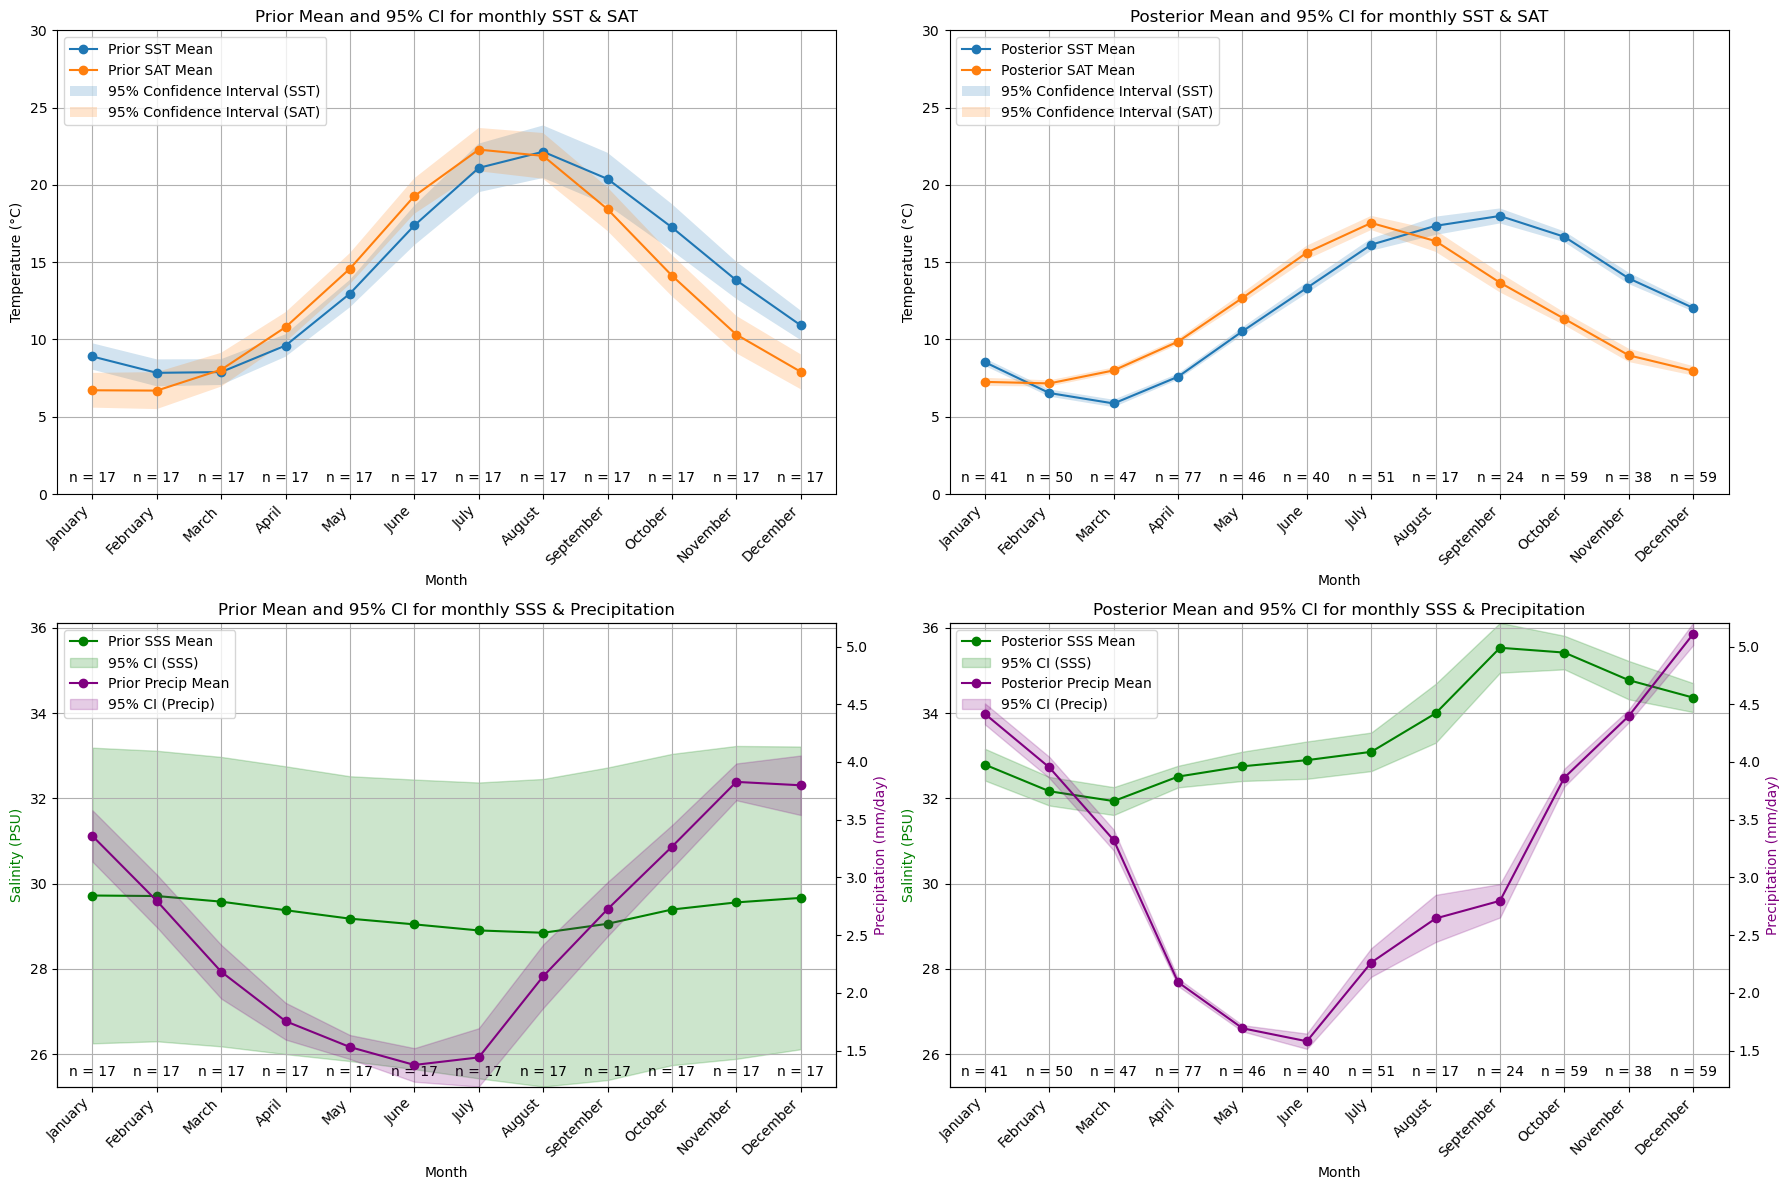

In [47]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o')
axes[0, 0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SST_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    mu_prior_SST_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    mu_prior_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and 95% CI for monthly SST & SAT')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(months_scale, mu_post_SST_D47_monthly_aggregated_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(months_scale, mu_post_SAT_D47_monthly_aggregated_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SST_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_aggregated_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SST_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 1].fill_between(
    months_scale,
    mu_post_SAT_D47_monthly_aggregated_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SAT_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SAT_D47_monthly_aggregated_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SAT_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Posterior Mean and 95% CI for monthly SST & SAT')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly)),
              np.min(mu_post_SSS_d18Ow_monthly_aggregated_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly)))
sss_max = max(np.max(mu_prior_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly)),
              np.max(mu_post_SSS_d18Ow_monthly_aggregated_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly)))
precip_min = min(np.min(mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly)),
                 np.min(mu_post_precip_monthly_aggregated - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly)))
precip_max = max(np.max(mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly)),
                 np.max(mu_post_precip_monthly_aggregated + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly)))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_prior_SSS_d18Ow_monthly_T, label='Prior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_prior_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    mu_prior_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(months_scale, mu_prior_precip_monthly_original, label='Prior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Prior Mean and 95% CI for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_post_SSS_d18Ow_monthly_aggregated_T, label='Posterior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_post_SSS_d18Ow_monthly_aggregated_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SSS_d18Ow_monthly_aggregated_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(months_scale, mu_post_precip_monthly_aggregated, label='Posterior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_post_precip_monthly_aggregated - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_precip_monthly_aggregated + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Posterior Mean and 95% CI for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# Add "n = x" labels below each x-tick for each subplot to show the number of model values or updates
# Prior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 0].text(
        months_scale[i], axes[0, 0].get_ylim()[0] + 1.5,  # adjust location as needed
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 1].text(
        months_scale[i], axes[0, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly_aggregated_D47[i]) if hasattr(n_update_monthly_aggregated_D47, '__getitem__') else n_update_monthly_aggregated_D47}",
        ha='center', va='top', fontsize=10
    )

# Prior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 0].text(
        months_scale[i], axes[1, 0].get_ylim()[0] + 0.5,
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 1].text(
        months_scale[i], axes[1, 1].get_ylim()[0] + 0.5,
        f"n = {int(n_update_monthly_aggregated_D47[i]) if hasattr(n_update_monthly_aggregated_D47, '__getitem__') else n_update_monthly_aggregated_D47}",
        ha='center', va='top', fontsize=10
    )

plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior with SDs instead of 95% confidence levels

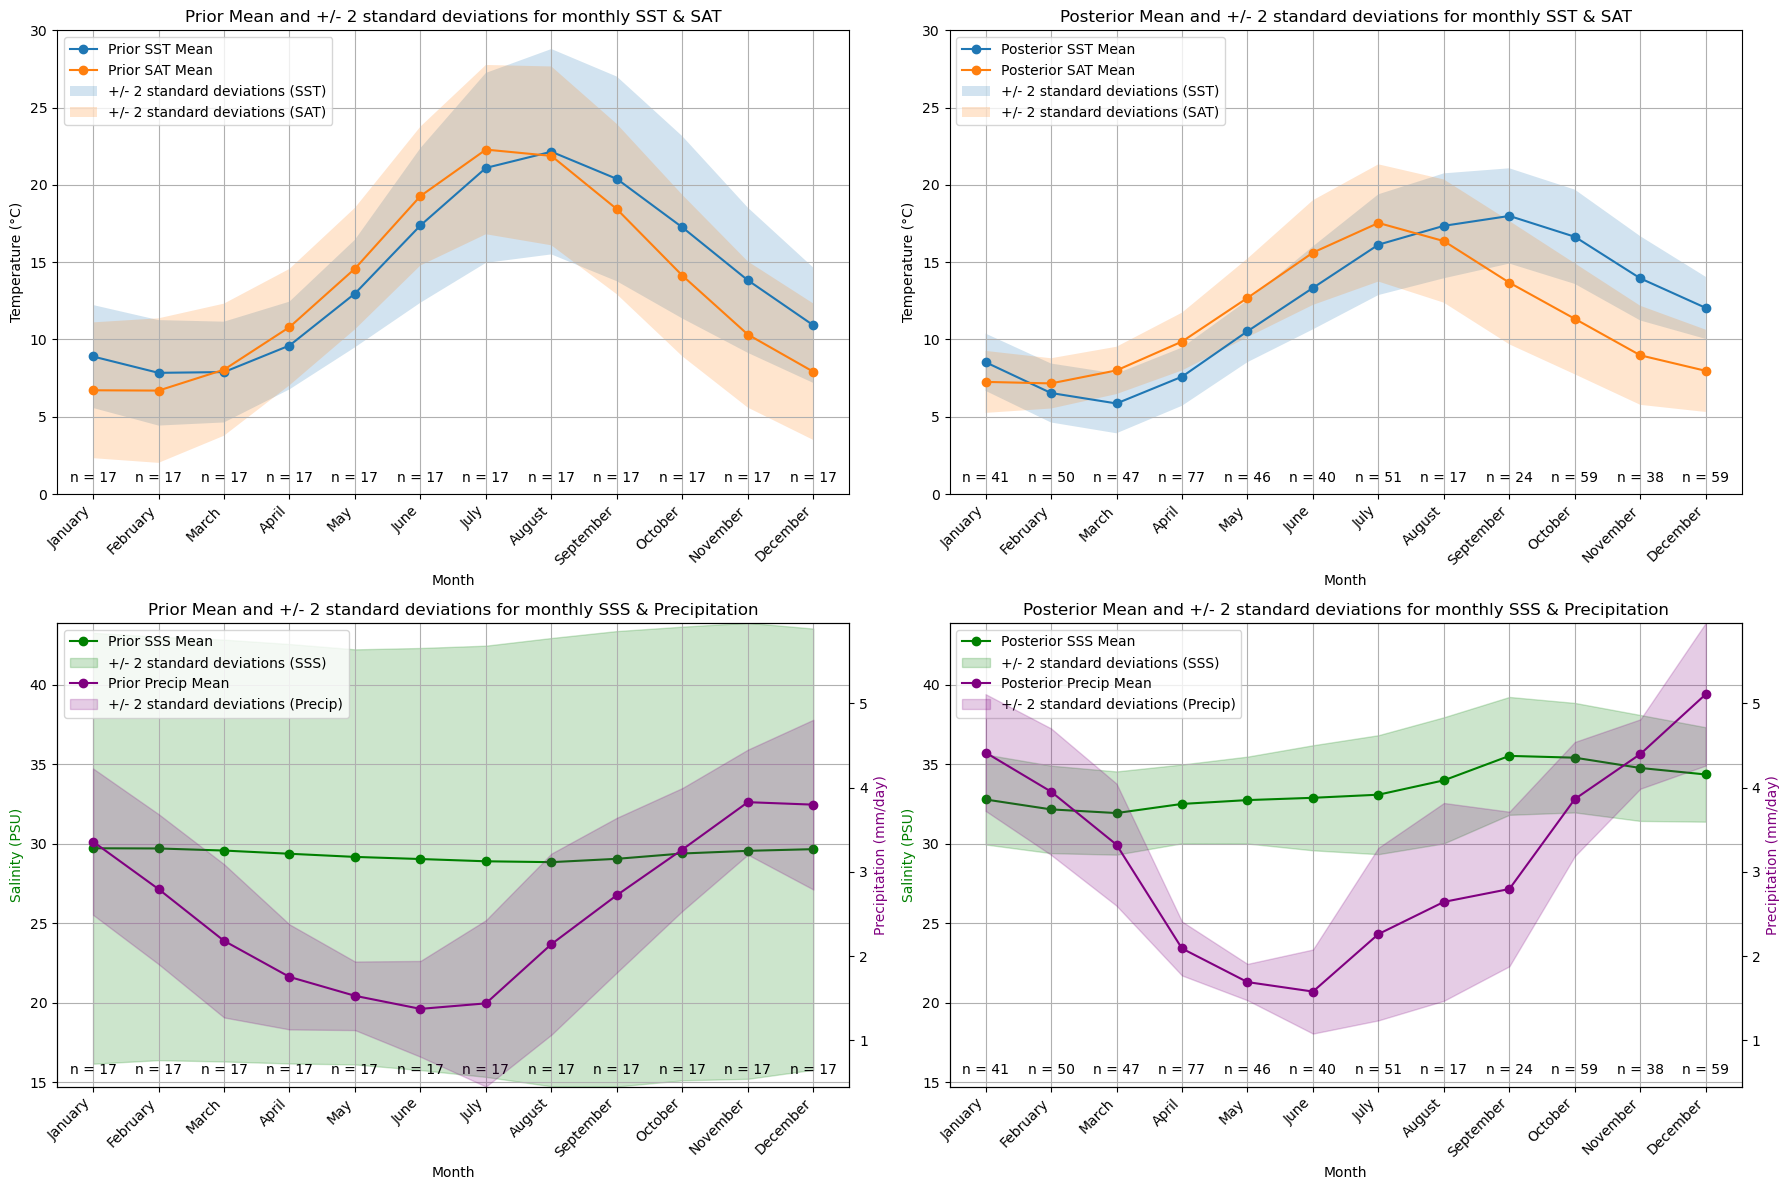

In [48]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o')
axes[0, 0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SST_monthly - 2 * std_prior_SST_monthly,
    mu_prior_SST_monthly + 2 * std_prior_SST_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - 2 * std_prior_SAT_monthly,
    mu_prior_SAT_monthly + 2 * std_prior_SAT_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and +/- 2 standard deviations for monthly SST & SAT')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(months_scale, mu_post_SST_D47_monthly_aggregated_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(months_scale, mu_post_SAT_D47_monthly_aggregated_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated_T - 2 * std_post_SST_D47_monthly_aggregated_T,
    mu_post_SST_D47_monthly_aggregated_T + 2 * std_post_SST_D47_monthly_aggregated_T,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 1].fill_between(
    months_scale,
    mu_post_SAT_D47_monthly_aggregated_T - 2 * std_post_SAT_D47_monthly_aggregated_T,
    mu_post_SAT_D47_monthly_aggregated_T + 2 * std_post_SAT_D47_monthly_aggregated_T,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Posterior Mean and +/- 2 standard deviations for monthly SST & SAT')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_monthly_T - 2 * std_prior_SSS_d18Ow_monthly_T),
              np.min(mu_post_SSS_d18Ow_monthly_aggregated_T - 2 * std_post_SSS_d18Ow_monthly_aggregated_T))
sss_max = max(np.max(mu_prior_SSS_d18Ow_monthly_T + 2 * std_prior_SSS_d18Ow_monthly_T),
              np.max(mu_post_SSS_d18Ow_monthly_aggregated_T + 2 * std_post_SSS_d18Ow_monthly_aggregated_T))
precip_min = min(np.min(mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly),
                 np.min(mu_post_precip_monthly_aggregated - 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated))))
precip_max = max(np.max(mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly),
                 np.max(mu_post_precip_monthly_aggregated + 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated))))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_prior_SSS_d18Ow_monthly_T, label='Prior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_prior_SSS_d18Ow_monthly_T - 2 * std_prior_SSS_d18Ow_monthly_T,
    mu_prior_SSS_d18Ow_monthly_T + 2 * std_prior_SSS_d18Ow_monthly_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_prior_precip_monthly_original, label='Prior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly,
    mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly,
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Prior Mean and +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_post_SSS_d18Ow_monthly_aggregated_T, label='Posterior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_post_SSS_d18Ow_monthly_aggregated_T - 2 * std_post_SSS_d18Ow_monthly_aggregated_T,
    mu_post_SSS_d18Ow_monthly_aggregated_T + 2 * std_post_SSS_d18Ow_monthly_aggregated_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_post_precip_monthly_aggregated, label='Posterior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_post_precip_monthly_aggregated - 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)),
    mu_post_precip_monthly_aggregated + 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)),
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Posterior Mean and +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# Add "n = x" labels below each x-tick for each subplot to show the number of model values or updates
# Prior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 0].text(
        months_scale[i], axes[0, 0].get_ylim()[0] + 1.5,  # adjust location as needed
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 1].text(
        months_scale[i], axes[0, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly_aggregated_D47[i]) if hasattr(n_update_monthly_aggregated_D47, '__getitem__') else n_update_monthly_aggregated_D47}",
        ha='center', va='top', fontsize=10
    )

# Prior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 0].text(
        months_scale[i], axes[1, 0].get_ylim()[0] + 1.5,
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 1].text(
        months_scale[i], axes[1, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly_aggregated_D47[i]) if hasattr(n_update_monthly_aggregated_D47, '__getitem__') else n_update_monthly_aggregated_D47}",
        ha='center', va='top', fontsize=10
    )

plt.tight_layout()
plt.show()